# **임대주택 단지 내 적정 주차수요 예측 대회**

2021년 7월 13일, 다시 하나둘 제대로 데이터를 살펴보겠습니다. 추가변수도 필요해보입니다.

In [1]:
PATH = r'C:\Users\Wyatt\wyatt37\data\parking'

In [2]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LassoLars, HuberRegressor

In [4]:
from pycaret.regression import *

In [12]:
age_gender = pd.read_csv(PATH + '\\new_age_gender_info.csv')
train = pd.read_csv(PATH + '\\new_train.csv')
test = pd.read_csv(PATH + '\\new_test.csv')
sub = pd.read_csv(PATH + '\\new_sample_submission.csv')

# PREPROCESSING

In [13]:
# 컬럼명이 너무 긴 지하철과 버스만 바꿔주겠습니다.
train.rename({'도보 10분거리 내 지하철역 수(환승노선 수 반영)': '지하철',
             '도보 10분거리 내 버스정류장 수': '버스'}, axis=1, inplace=True)
test.rename({'도보 10분거리 내 지하철역 수(환승노선 수 반영)': '지하철',
             '도보 10분거리 내 버스정류장 수': '버스'}, axis=1, inplace=True)

## FILLNA

### Subway

In [14]:
train.loc[(train['지하철'].isnull()) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분     지역       공급유형   전용면적  전용면적별세대수   공가수 자격유형  \
94    C1312   518    아파트   충청남도       국민임대  39.72        60  12.0    A   
95    C1312   518    아파트   충청남도       국민임대  39.98        89  12.0    A   
96    C1312   518    아파트   충청남도       국민임대  41.55       225  12.0    A   
97    C1312   518    아파트   충청남도       국민임대  46.90       143  12.0    A   
98    C1874   619    아파트   충청남도       영구임대  26.37       294   2.0    C   
99    C1874   619    아파트   충청남도       영구임대  26.37       149   2.0    C   
100   C1874   619    아파트   충청남도       영구임대  31.32       149   2.0    C   
144   C1424   625    아파트  대전광역시  공공임대(50년)  39.99       268   2.0    A   
145   C1424   625    아파트  대전광역시  공공임대(50년)  49.95       119   2.0    A   
146   C1424   625    아파트  대전광역시  공공임대(50년)  49.95       237   2.0    A   
147   C2100   880    아파트  대전광역시       국민임대  51.51        46   4.0    A   
148   C2100   880    아파트  대전광역시       국민임대  51.59        35   4.0    A   
149   C2100   880    아파트  대전광역시       국민임대  51.90       589   4.0    A   
150   C2100   880    아파트  대전광역시       국민임대  59.91       118   4.0    A   
151   C2100   880    아파트  대전광역시       국민임대  59.94        46   4.0    A   
152   C2100   880    아파트  대전광역시       국민임대  59.99        46   4.0    A   
171   C2520   970    아파트  대전광역시  공공임대(50년)  39.69       960   2.0    A   
176   C1616  1507    아파트  대전광역시       영구임대  26.37       588   1.0    C   
177   C1616  1507    아파트  대전광역시       영구임대  31.32       450   1.0    C   
178   C1616  1507    아파트  대전광역시       영구임대  40.32       450   1.0    E   
198   C1704   639    아파트  대전광역시       영구임대  39.30       204  34.0    C   
199   C1704   639    아파트  대전광역시       영구임대  39.69       420  34.0    C   
215   C2258   965    아파트  대전광역시       영구임대  26.37       588  13.0    C   
216   C2258   965    아파트  대전광역시       영구임대  31.32       180  13.0    C   
217   C2258   965    아파트  대전광역시       영구임대  40.32       180  13.0    C   
347   C1068   806    아파트   충청남도       국민임대  36.65       200  11.0    A   
348   C1068   806    아파트   충청남도       국민임대  36.98       130  11.0    A   
349   C1068   806    아파트   충청남도       국민임대  41.55       252  11.0    A   
350   C1068   806    아파트   충청남도       국민임대  46.86        44  11.0    A   
351   C1068   806    아파트   충청남도       국민임대  46.98        88  11.0    A   
352   C1068   806    아파트   충청남도       국민임대  51.93        91  11.0    A   
353   C1983   903    아파트   충청남도  공공임대(50년)  36.00        40   3.0    A   
354   C1983   903    아파트   충청남도  공공임대(50년)  35.28       198   3.0    A   
355   C1983   903    아파트   충청남도  공공임대(50년)  35.28        78   3.0    A   
356   C1983   903    아파트   충청남도       영구임대  26.37       478   3.0    C   
357   C1983   903    아파트   충청남도       영구임대  31.32        99   3.0    C   
620   C2216   390    아파트   충청남도  공공임대(50년)  39.00       210   2.0    A   
621   C2216   390    아파트   충청남도  공공임대(50년)  39.39       180   2.0    A   
640   C2644   779    아파트   충청남도  공공임대(50년)  37.67        89   7.0    A   
641   C2644   779    아파트   충청남도  공공임대(50년)  37.67       298   7.0    A   
642   C2644   779    아파트   충청남도       영구임대  26.37       239   7.0    C   
643   C2644   779    아파트   충청남도       영구임대  26.37       149   7.0    C   
761   C1005  1144    아파트   충청남도       국민임대  51.49       304  16.0    A   
762   C1005  1144    아파트   충청남도       국민임대  51.95       600  16.0    A   
763   C1005  1144    아파트   충청남도       국민임대  59.64       240  16.0    A   
764   C1004   521    아파트   충청남도       영구임대  39.30       240   3.0    C   
765   C1004   521    아파트   충청남도       영구임대  39.69       264   3.0    C   
783   C1875  1003    아파트   충청남도       영구임대  26.37       596   5.0    C   
784   C1875  1003    아파트   충청남도       영구임대  26.37       239   5.0    C   
785   C1875  1003    아파트   충청남도       영구임대  31.32       149   5.0    C   
805   C2156   306    아파트   충청남도       국민임대  36.55       120   0.0    A   
806   C2156   306    아파트   충청남도       국민임대  39.57       120   0.0    A   
807   C2156   306    아파트   충청남도       국민임대  51.93        65   0.0    A   
839   C1175

In [15]:
# train set에 지하철 정보가 없는 경남, 충남은 0으로 보간
train.loc[(train['지역'].isin(['경상남도', '충청남도'])) & (train['지하철'].isnull()), '지하철'] = 0

In [16]:
# LH청약센터에서 찾은 주소로 확인한 대전의 8개 단지는 지하철이 없음
# 0으로 채워줍시다.

(train.loc[(train['지역'] == '대전광역시') & (train['지하철'].isnull()) , '지하철']) = 0

In [17]:
# test set에 지하철 정보가 없는 충남은 0으로 보간
test.loc[(test['지역'].isin(['충청남도'])) & (test['지하철'].isnull()), '지하철'] = 0

In [18]:
# LH청약센터에서 찾은 주소로 확인한 대전의 2개 단지는 지하철이 없음
# 0으로 채워줍시다.

(test.loc[(test['지역'] == '대전광역시') & (test['지하철'].isnull()), '지하철']) = 0

### Bus

In [19]:
train.loc[(train['버스'].isnull()) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분    지역       공급유형   전용면적  전용면적별세대수   공가수 자격유형  \
2315  C1649   575    아파트  경상남도  공공임대(10년)  74.97        80  15.0    A   
2316  C1649   575    아파트  경상남도  공공임대(10년)  84.95       124  15.0    A   
2317  C1649   575    아파트  경상남도  공공임대(10년)  84.96       289  15.0    A   
2318  C1649   575    아파트  경상남도  공공임대(10년)  84.98        82  15.0    A   

         임대보증금     임대료  지하철  버스  단지내주차면수  등록차량수  
2315  46000000  456000  0.0 NaN   1066.0  855.0  
2316  57000000  462000  0.0 NaN   1066.0  855.0  
2317  57000000  462000  0.0 NaN   1066.0  855.0  
2318  57000000  462000  0.0 NaN   1066.0  855.0

In [20]:
train.loc[(train['단지코드'] == 'C2431') & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
2372  C2431   472    아파트  경상남도  국민임대  36.77       272  16.0    A  11217000   
2373  C2431   472    아파트  경상남도  국민임대  46.78       200  16.0    A  24389000   

         임대료  지하철   버스  단지내주차면수  등록차량수  
2372  233330  0.0  2.0   1066.0  359.0  
2373  303220  0.0  2.0   1066.0  359.0

In [21]:
# 버스정류장 결측치는 train set에 1개 단지에 존재
# 해당 단지는 양산신도시LH아파트 5단지
# 동일 단지인 C2431에서 2로 되어 있음.

train.loc[train['버스'].isnull(), '버스'] = 2

In [22]:
train.loc[(train['단지코드'] == 'C1649') & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분    지역       공급유형   전용면적  전용면적별세대수   공가수 자격유형  \
2315  C1649   575    아파트  경상남도  공공임대(10년)  74.97        80  15.0    A   
2316  C1649   575    아파트  경상남도  공공임대(10년)  84.95       124  15.0    A   
2317  C1649   575    아파트  경상남도  공공임대(10년)  84.96       289  15.0    A   
2318  C1649   575    아파트  경상남도  공공임대(10년)  84.98        82  15.0    A   

         임대보증금     임대료  지하철   버스  단지내주차면수  등록차량수  
2315  46000000  456000  0.0  2.0   1066.0  855.0  
2316  57000000  462000  0.0  2.0   1066.0  855.0  
2317  57000000  462000  0.0  2.0   1066.0  855.0  
2318  57000000  462000  0.0  2.0   1066.0  855.0

### Rent

In [23]:
test.loc[(test['임대건물구분'] != '상가') & (test['임대보증금'].isnull())]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형 임대보증금  임대료  \
76  C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D   NaN  NaN   
77  C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D   NaN  NaN   
79  C1006  1505    아파트  대전광역시  영구임대  52.74         6  27.0    D   NaN  NaN   

    지하철   버스  단지내주차면수  
76  2.0  5.0    428.0  
77  2.0  5.0    428.0  
79  2.0  5.0    428.0

In [24]:
test.loc[(test['단지코드'] == 'C1006') & (test['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형    임대보증금  \
73  C1006  1505    아파트  대전광역시  영구임대  26.37       358  27.0    C  5787000   
74  C1006  1505    아파트  대전광역시  영구임대  26.37       229  27.0    C  5787000   
75  C1006  1505    아파트  대전광역시  영구임대  26.37       574  27.0    C  5787000   
76  C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D      NaN   
77  C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D      NaN   
78  C1006  1505    아파트  대전광역시  영구임대  31.32       298  27.0    C  6873000   
79  C1006  1505    아파트  대전광역시  영구임대  52.74         6  27.0    D      NaN   

      임대료  지하철   버스  단지내주차면수  
73  79980  2.0  5.0    428.0  
74  79980  2.0  5.0    428.0  
75  79980  2.0  5.0    428.0  
76    NaN  2.0  5.0    428.0  
77    NaN  2.0  5.0    428.0  
78  94990  2.0  5.0    428.0  
79    NaN  2.0  5.0    428.0

In [25]:
# test set 에 임대보증금과 임대료가 결측치인 1개 단지 존재
# 해당 단지는 대전둔산1단지주공아파트
# 공고문에 의거, 임대보증금과 임대료 아래와 같이 보간

test.loc[(test['임대건물구분'] != '상가') & (test['임대보증금'].isnull()), '임대보증금'] = [5787000, 5787000, 11574000]
test.loc[(test['임대건물구분'] != '상가') & (test['임대료'].isnull()), '임대료'] = [79980, 79980, 159960]

In [26]:
test.loc[(test['단지코드'] == 'C1006') & (test['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
73  C1006  1505    아파트  대전광역시  영구임대  26.37       358  27.0    C   5787000   
74  C1006  1505    아파트  대전광역시  영구임대  26.37       229  27.0    C   5787000   
75  C1006  1505    아파트  대전광역시  영구임대  26.37       574  27.0    C   5787000   
76  C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D   5787000   
77  C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D   5787000   
78  C1006  1505    아파트  대전광역시  영구임대  31.32       298  27.0    C   6873000   
79  C1006  1505    아파트  대전광역시  영구임대  52.74         6  27.0    D  11574000   

       임대료  지하철   버스  단지내주차면수  
73   79980  2.0  5.0    428.0  
74   79980  2.0  5.0    428.0  
75   79980  2.0  5.0    428.0  
76   79980  2.0  5.0    428.0  
77   79980  2.0  5.0    428.0  
78   94990  2.0  5.0    428.0  
79  159960  2.0  5.0    428.0

### Qualification

In [27]:
test.loc[(test['단지코드'] == 'C2411') & (test['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
193  C2411   962    아파트  경상남도  국민임대  39.43        56  25.0    A  11992000   
194  C2411   962    아파트  경상남도  국민임대  39.72       336  25.0    A  11992000   
195  C2411   962    아파트  경상남도  국민임대  39.82       179  25.0    A  11992000   
196  C2411   962    아파트  경상남도  국민임대  46.90       240  25.0  NaN  71950000   
197  C2411   962    아파트  경상남도  국민임대  51.93       150  25.0    A  21586000   

        임대료  지하철   버스  단지내주차면수  
193  100720  0.0  2.0    840.0  
194  100720  0.0  2.0    840.0  
195  100720  0.0  2.0    840.0  
196   37470  0.0  2.0    840.0  
197  171480  0.0  2.0    840.0

In [28]:
# C2411 아파트의 자격유형은 전부 A로 되어 있음.
# 동일하게 A로 보간

test.loc[(test['단지코드'] == 'C2411') & (test['자격유형'].isnull()), '자격유형'] = 'A'

In [29]:
test.loc[(test['단지코드'] == 'C2253') & (test['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분   지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형    임대보증금    임대료  \
258  C2253  1161    아파트  강원도  영구임대  26.37       745  0.0  NaN  2249000  44770   
259  C2253  1161    아파트  강원도  영구임대  31.32       239  0.0    C  3731000  83020   
260  C2253  1161    아파트  강원도  영구임대  31.32       149  0.0    C  3731000  83020   

     지하철   버스  단지내주차면수  
258  0.0  2.0    173.0  
259  0.0  2.0    173.0  
260  0.0  2.0    173.0

In [30]:
# C2253 아파트의 자격유형은 전부 C로 되어 있음.
# 동일하게 C로 보간

test.loc[(test['단지코드'] == 'C2253') & (test['자격유형'].isnull()), '자격유형'] = 'C'

## REPLACING

https://www.dacon.io/competitions/official/235745/talkboard/403708?page=1&dtype=recent

### ※ 동일한 단지에 코드가 2개로 부여된 단지 코드 (3쌍) : ['C2085', 'C1397'], ['C2431', 'C1649'], ['C1036', 'C2675'] 
 - C2675 단지는 테스트셋, 나머지는 트레인셋 입니다.

In [31]:
train.loc[(train['단지코드'].isin(['C2085', 'C1397'])) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분     지역       공급유형   전용면적  전용면적별세대수  공가수 자격유형  \
2043  C1397   370    아파트  서울특별시       장기전세  23.32        51  9.0    A   
2044  C1397   370    아파트  서울특별시       장기전세  46.79         4  9.0    A   
2045  C1397   370    아파트  서울특별시       장기전세  46.91        69  9.0    A   
2046  C1397   370    아파트  서울특별시       장기전세  51.96        24  9.0    A   
2047  C1397   370    아파트  서울특별시       장기전세  51.99        80  9.0    A   
2048  C1397   370    아파트  서울특별시       장기전세  59.93       142  9.0    A   
2186  C2085   969    아파트  서울특별시  공공임대(10년)  51.96        63  0.0    A   
2187  C2085   969    아파트  서울특별시  공공임대(10년)  51.99        41  0.0    A   
2188  C2085   969    아파트  서울특별시  공공임대(10년)  59.93       315  0.0    A   
2189  C2085   969    아파트  서울특별시   공공임대(분납)  74.80       208  0.0    A   
2190  C2085   969    아파트  서울특별시   공공임대(분납)  84.05        20  0.0    A   
2191  C2085   969    아파트  서울특별시   공공임대(분납)  84.05         4  0.0    A   
2192  C2085   969    아파트  서울특별시   공공임대(분납)  84.39       314  0.0    A   
2193  C2085   969    아파트  서울특별시   공공임대(분납)  84.39         4  0.0    A   

          임대보증금     임대료  지하철   버스  단지내주차면수   등록차량수  
2043   87444000       -  0.0  3.0   1590.0  1595.0  
2044  174888000       -  0.0  3.0   1590.0  1595.0  
2045  174888000       -  0.0  3.0   1590.0  1595.0  
2046  194562000       -  0.0  3.0   1590.0  1595.0  
2047  194562000       -  0.0  3.0   1590.0  1595.0  
2048  216423000       -  0.0  3.0   1590.0  1595.0  
2186   47001000  602270  0.0  3.0   1590.0  1595.0  
2187   47001000  602270  0.0  3.0   1590.0  1595.0  
2188   61210000  695170  0.0  3.0   1590.0  1595.0  
2189  120611000  293490  0.0  3.0   1590.0  1595.0  
2190  135521000  329770  0.0  3.0   1590.0  1595.0  
2191  135531000  329790  0.0  3.0   1590.0  1595.0  
2192  136646000  332510  0.0  3.0   1590.0  1595.0  
2193  136628000  332460  0.0  3.0   1590.0  1595.0

In [32]:
# ['C2085', 'C1397'] 을 C1397로 합병
train.loc[train['단지코드'] == 'C2085', '단지코드'] = 'C1397'
train.loc[train['단지코드'] == 'C1397', '총세대수'] = (
    train.loc[train['단지코드'] == 'C1397'].groupby(['단지코드'])['전용면적별세대수'].sum()[0]
)
train.loc[train['단지코드'] == 'C1397', '공가수'] = 9

In [33]:
train.loc[(train['단지코드'].isin(['C1397'])) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분     지역       공급유형   전용면적  전용면적별세대수  공가수 자격유형  \
2043  C1397  1339    아파트  서울특별시       장기전세  23.32        51  9.0    A   
2044  C1397  1339    아파트  서울특별시       장기전세  46.79         4  9.0    A   
2045  C1397  1339    아파트  서울특별시       장기전세  46.91        69  9.0    A   
2046  C1397  1339    아파트  서울특별시       장기전세  51.96        24  9.0    A   
2047  C1397  1339    아파트  서울특별시       장기전세  51.99        80  9.0    A   
2048  C1397  1339    아파트  서울특별시       장기전세  59.93       142  9.0    A   
2186  C1397  1339    아파트  서울특별시  공공임대(10년)  51.96        63  9.0    A   
2187  C1397  1339    아파트  서울특별시  공공임대(10년)  51.99        41  9.0    A   
2188  C1397  1339    아파트  서울특별시  공공임대(10년)  59.93       315  9.0    A   
2189  C1397  1339    아파트  서울특별시   공공임대(분납)  74.80       208  9.0    A   
2190  C1397  1339    아파트  서울특별시   공공임대(분납)  84.05        20  9.0    A   
2191  C1397  1339    아파트  서울특별시   공공임대(분납)  84.05         4  9.0    A   
2192  C1397  1339    아파트  서울특별시   공공임대(분납)  84.39       314  9.0    A   
2193  C1397  1339    아파트  서울특별시   공공임대(분납)  84.39         4  9.0    A   

          임대보증금     임대료  지하철   버스  단지내주차면수   등록차량수  
2043   87444000       -  0.0  3.0   1590.0  1595.0  
2044  174888000       -  0.0  3.0   1590.0  1595.0  
2045  174888000       -  0.0  3.0   1590.0  1595.0  
2046  194562000       -  0.0  3.0   1590.0  1595.0  
2047  194562000       -  0.0  3.0   1590.0  1595.0  
2048  216423000       -  0.0  3.0   1590.0  1595.0  
2186   47001000  602270  0.0  3.0   1590.0  1595.0  
2187   47001000  602270  0.0  3.0   1590.0  1595.0  
2188   61210000  695170  0.0  3.0   1590.0  1595.0  
2189  120611000  293490  0.0  3.0   1590.0  1595.0  
2190  135521000  329770  0.0  3.0   1590.0  1595.0  
2191  135531000  329790  0.0  3.0   1590.0  1595.0  
2192  136646000  332510  0.0  3.0   1590.0  1595.0  
2193  136628000  332460  0.0  3.0   1590.0  1595.0

In [34]:
train.loc[(train['단지코드'].isin(['C2431', 'C1649'])) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분    지역       공급유형   전용면적  전용면적별세대수   공가수 자격유형  \
2315  C1649   575    아파트  경상남도  공공임대(10년)  74.97        80  15.0    A   
2316  C1649   575    아파트  경상남도  공공임대(10년)  84.95       124  15.0    A   
2317  C1649   575    아파트  경상남도  공공임대(10년)  84.96       289  15.0    A   
2318  C1649   575    아파트  경상남도  공공임대(10년)  84.98        82  15.0    A   
2372  C2431   472    아파트  경상남도       국민임대  36.77       272  16.0    A   
2373  C2431   472    아파트  경상남도       국민임대  46.78       200  16.0    A   

         임대보증금     임대료  지하철   버스  단지내주차면수  등록차량수  
2315  46000000  456000  0.0  2.0   1066.0  855.0  
2316  57000000  462000  0.0  2.0   1066.0  855.0  
2317  57000000  462000  0.0  2.0   1066.0  855.0  
2318  57000000  462000  0.0  2.0   1066.0  855.0  
2372  11217000  233330  0.0  2.0   1066.0  359.0  
2373  24389000  303220  0.0  2.0   1066.0  359.0

In [35]:
# ['C2431', 'C1649'] 을 C1649로 합병
train.loc[train['단지코드'] == 'C2431', '단지코드'] = 'C1649'
train.loc[train['단지코드'] == 'C1649', '총세대수'] = (
    train.loc[train['단지코드'] == 'C1649'].groupby(['단지코드'])['전용면적별세대수'].sum()[0]
)
train.loc[train['단지코드'] == 'C1649', '공가수'] = 31
train.loc[train['단지코드'] == 'C1649', '등록차량수'] = 1214

In [36]:
train.loc[(train['단지코드'].isin(['C1649'])) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분    지역       공급유형   전용면적  전용면적별세대수   공가수 자격유형  \
2315  C1649  1047    아파트  경상남도  공공임대(10년)  74.97        80  31.0    A   
2316  C1649  1047    아파트  경상남도  공공임대(10년)  84.95       124  31.0    A   
2317  C1649  1047    아파트  경상남도  공공임대(10년)  84.96       289  31.0    A   
2318  C1649  1047    아파트  경상남도  공공임대(10년)  84.98        82  31.0    A   
2372  C1649  1047    아파트  경상남도       국민임대  36.77       272  31.0    A   
2373  C1649  1047    아파트  경상남도       국민임대  46.78       200  31.0    A   

         임대보증금     임대료  지하철   버스  단지내주차면수   등록차량수  
2315  46000000  456000  0.0  2.0   1066.0  1214.0  
2316  57000000  462000  0.0  2.0   1066.0  1214.0  
2317  57000000  462000  0.0  2.0   1066.0  1214.0  
2318  57000000  462000  0.0  2.0   1066.0  1214.0  
2372  11217000  233330  0.0  2.0   1066.0  1214.0  
2373  24389000  303220  0.0  2.0   1066.0  1214.0

In [37]:
# ['C1036', 'C2675'] 은 train과 test로 나누어져 있으니 drop
train.drop(train.loc[train['단지코드'] == 'C1036'].index, axis=0, inplace=True)
test.drop(test.loc[test['단지코드'] == 'C2675'].index, axis=0, inplace=True)

### ※ 차이가 94~452세대인 10개 단지(크기순) : ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

In [ ]:
# 경북혁신도시천년나무3단지
test.loc[test['단지코드'] == 'C2497', '전용면적별세대수'] = [114, 60, 275, 39]

# 충무공동혁신도시LH아파트5단지
train.loc[train['단지코드'] == 'C2405', '전용면적별세대수'] = [100, 100, 400]
# 경북혁신LH천년나무2단지
train.loc[train['단지코드'] == 'C1740', '전용면적별세대수'] = [305, 126, 184, 168]
# LH강남아이파크
train.loc[train['단지코드'] == 'C1024', '전용면적별세대수'] = [195, 60, 15, 154, 99, 48, 42, 53, 29, 23]
# 서울서초A4BL
train.loc[train['단지코드'] == 'C1344', '전용면적별세대수'] = [106, 96, 41, 39, 42, 100]
# 진천군 연미로 131 천년나무7단지
train.loc[train['단지코드'] == 'C1490', '전용면적별세대수'] = [105, 84, 472, 88]
# 나주빛가람LH3단지
train.loc[train['단지코드'] == 'C2620', '전용면적별세대수'] = [60, 227, 316, 160, 266]
# 남양주별내A1-3블록
train.loc[train['단지코드'] == 'C1804', '전용면적별세대수'] = [76, 82, 279, 28]

In [38]:
train.loc[(train['단지코드'].isin(['C1804'])) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분   지역       공급유형   전용면적  전용면적별세대수  공가수 자격유형     임대보증금  \
2039  C1804   478    아파트  경기도  공공임대(10년)  75.56         6  3.0    A  78957000   
2040  C1804   478    아파트  경기도  공공임대(10년)  84.64         4  3.0    A  90237000   
2041  C1804   478    아파트  경기도  공공임대(10년)  84.97        13  3.0    A  90237000   
2042  C1804   478    아파트  경기도  공공임대(10년)  84.98         3  3.0    A  90237000   

         임대료  지하철   버스  단지내주차면수  등록차량수  
2039  530130  0.0  3.0    629.0  951.0  
2040  597820  0.0  3.0    629.0  951.0  
2041  597820  0.0  3.0    629.0  951.0  
2042  597820  0.0  3.0    629.0  951.0

In [39]:
train.loc[(train['단지코드'].isin(['C2470'])) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분     지역      공급유형   전용면적  전용면적별세대수  공가수 자격유형  \
2580  C2470   636    아파트  대전광역시  공공임대(5년)  39.90        96  1.0    A   
2581  C2470   636    아파트  대전광역시  공공임대(5년)  46.81       264  1.0    A   
2582  C2470   636    아파트  대전광역시  공공임대(5년)  59.95        46  1.0    A   

         임대보증금     임대료  지하철   버스  단지내주차면수  등록차량수  
2580  23000000  340000  1.0  2.0    772.0  887.0  
2581  26000000  380000  1.0  2.0    772.0  887.0  
2582  32000000  480000  1.0  2.0    772.0  887.0

In [40]:
train.loc[(train['단지코드'].isin(['C1206'])) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분   지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형    임대보증금    임대료  \
647  C1206   755    아파트  강원도  영구임대  26.37       239  1.0    C  3141000  69900   
648  C1206   755    아파트  강원도  영구임대  31.32       239  1.0    C  3731000  83020   

     지하철   버스  단지내주차면수  등록차량수  
647  0.0  4.0     88.0   90.0  
648  0.0  4.0     88.0   90.0

In [512]:
# 남양주별내A1-3블록
train = train.append({'단지코드': 'C1804',
                      '총세대수': 478,
                      '임대건물구분': '아파트',
                      '지역': '경기도',
                      '공급유형': '공공임대(10년)',
                      '전용면적': 75.78,
                      '전용면적별세대수': 13,
                      '공가수': 3.0,
                      '자격유형': 'A',
                      '임대보증금': 78957000,
                      '임대료': 530130,
                      '지하철': 0.0,
                      '버스': 3.0,
                      '단지내주차면수': 629.0,
                      '등록차량수': 951.0}, ignore_index=True)
# 대전대신2구역2단지
train = train.append({'단지코드': 'C2470',
                      '총세대수': 636,
                      '임대건물구분': '아파트',
                      '지역': '대전광역시',
                      '공급유형': '공공분양',
                      '전용면적': 74.99,
                      '전용면적별세대수': 72,
                      '공가수': 1.0,
                      '자격유형': 'A',
                      '임대보증금': 225013300,
                      '지하철': 1.0,
                      '버스': 2.0,
                      '단지내주차면수': 772.0,
                      '등록차량수': 887.0}, ignore_index=True)
train = train.append({'단지코드': 'C2470',
                      '총세대수': 636,
                      '임대건물구분': '아파트',
                      '지역': '대전광역시',
                      '공급유형': '공공분양',
                      '전용면적': 74.95,
                      '전용면적별세대수': 66,
                      '공가수': 1.0,
                      '자격유형': 'A',
                      '임대보증금': 226278000,
                      '지하철': 1.0,
                      '버스': 2.0,
                      '단지내주차면수': 772.0,
                      '등록차량수': 887.0}, ignore_index=True)
train = train.append({'단지코드': 'C2470',
                      '총세대수': 636,
                      '임대건물구분': '아파트',
                      '지역': '대전광역시',
                      '공급유형': '공공분양',
                      '전용면적': 74.99,
                      '전용면적별세대수': 92,
                      '공가수': 1.0,
                      '자격유형': 'A',
                      '임대보증금': 230417000,
                      '지하철': 1.0,
                      '버스': 2.0,
                      '단지내주차면수': 772.0,
                      '등록차량수': 887.0}, ignore_index=True)
# 속초청초아파트
train = train.append({'단지코드': 'C1206',
                      '총세대수': 755,
                      '임대건물구분': '아파트',
                      '지역': '강원도',
                      '공급유형': '공공분양',
                      '전용면적': 41.85,
                      '전용면적별세대수': 177,
                      '공가수': 1.0,
                      '자격유형': 'A',
                      '임대보증금': 50000000,
                      '지하철': 0.0,
                      '버스': 4.0,
                      '단지내주차면수': 88.0,
                      '등록차량수': 90.0}, ignore_index=True)
train = train.append({'단지코드': 'C1206',
                      '총세대수': 755,
                      '임대건물구분': '아파트',
                      '지역': '강원도',
                      '공급유형': '공공분양',
                      '전용면적': 51.66,
                      '전용면적별세대수': 90,
                      '공가수': 1.0,
                      '자격유형': 'A',
                      '임대보증금': 65000000,
                      '지하철': 0.0,
                      '버스': 4.0,
                      '단지내주차면수': 88.0,
                      '등록차량수': 90.0}, ignore_index=True)

In [513]:
# train의 C1024는 다른 단지와 다르게 총세대수보다 전용면적별세대수합이 더 큽니다.
train.loc[train['단지코드'] == 'C1024', '총세대수'] = (
    train.loc[train['단지코드'] == 'C1024'].groupby(['단지코드'])['전용면적별세대수'].sum()[0]
)

### ※ 실수가 발생한 단지 코드 (9개 단지) : ['C2335', 'C1327', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']
 - C2335, C1327 단지는 테스트셋, 나머지는 트레인셋 입니다.

In [400]:
# train.loc[(train['단지코드'].isin(['C2335', 'C1327', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']))
#          & (train['임대건물구분'] == '아파트')]

In [514]:
# # 노이즈로 판결났으므로 부득이하게 레코드 드랍
train.drop(train.loc[train['단지코드'].isin(['C2335', 'C1327', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988'])].index, axis=0, inplace=True)
test.drop(test.loc[test['단지코드'].isin(['C2335', 'C1327'])].index, axis=0, inplace=True)

### Qualification

'D' 는 상가에서 보여지는 자격유형입니다. 그러나 train, test 셋에 각각 존재합니다.

In [518]:
train.loc[(train['공급유형'] == '공공분양')]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형      임대보증금  \
2324  C1350  1401    아파트  대전광역시  공공분양  74.94       317  2.0    D        NaN   
2325  C1350  1401    아파트  대전광역시  공공분양  74.94       137  2.0    D        NaN   
2326  C1350  1401    아파트  대전광역시  공공분양  74.94        22  2.0    D        NaN   
2327  C1350  1401    아파트  대전광역시  공공분양  84.94       164  2.0    D        NaN   
2328  C1350  1401    아파트  대전광역시  공공분양  84.94        19  2.0    D        NaN   
2329  C1350  1401    아파트  대전광역시  공공분양  84.96        26  2.0    D        NaN   
2330  C1350  1401    아파트  대전광역시  공공분양  84.97        26  2.0    D        NaN   
2946  C2470   636    아파트  대전광역시  공공분양  74.99        72  1.0    A  225013300   
2947  C2470   636    아파트  대전광역시  공공분양  74.95        66  1.0    A  226278000   
2948  C2470   636    아파트  대전광역시  공공분양  74.99        92  1.0    A  230417000   
2949  C1206   755    아파트    강원도  공공분양  41.85       177  1.0    A   50000000   
2950  C1206   755    아파트    강원도  공공분양  51.66        90  1.0    A   65000000   

      임대료  지하철   버스  단지내주차면수   등록차량수  
2324  NaN  0.0  6.0   1636.0  2315.0  
2325  NaN  0.0  6.0   1636.0  2315.0  
2326  NaN  0.0  6.0   1636.0  2315.0  
2327  NaN  0.0  6.0   1636.0  2315.0  
2328  NaN  0.0  6.0   1636.0  2315.0  
2329  NaN  0.0  6.0   1636.0  2315.0  
2330  NaN  0.0  6.0   1636.0  2315.0  
2946  NaN  1.0  2.0    772.0   887.0  
2947  NaN  1.0  2.0    772.0   887.0  
2948  NaN  1.0  2.0    772.0   887.0  
2949  NaN  0.0  4.0     88.0    90.0  
2950  NaN  0.0  4.0     88.0    90.0

In [519]:
test.loc[(test['공급유형'] == '공공분양')]

Empty DataFrame
Columns: [단지코드, 총세대수, 임대건물구분, 지역, 공급유형, 전용면적, 전용면적별세대수, 공가수, 자격유형, 임대보증금, 임대료, 지하철, 버스, 단지내주차면수]
Index: []

In [515]:
train.loc[(train['단지코드'].isin(['C1350'])) & (train['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분     지역       공급유형   전용면적  전용면적별세대수  공가수 자격유형  \
2324  C1350  1401    아파트  대전광역시       공공분양  74.94       317  2.0    D   
2325  C1350  1401    아파트  대전광역시       공공분양  74.94       137  2.0    D   
2326  C1350  1401    아파트  대전광역시       공공분양  74.94        22  2.0    D   
2327  C1350  1401    아파트  대전광역시       공공분양  84.94       164  2.0    D   
2328  C1350  1401    아파트  대전광역시       공공분양  84.94        19  2.0    D   
2329  C1350  1401    아파트  대전광역시       공공분양  84.96        26  2.0    D   
2330  C1350  1401    아파트  대전광역시       공공분양  84.97        26  2.0    D   
2331  C1350  1401    아파트  대전광역시  공공임대(10년)  51.99       106  2.0    A   
2332  C1350  1401    아파트  대전광역시  공공임대(10년)  59.91        13  2.0    A   
2333  C1350  1401    아파트  대전광역시  공공임대(10년)  59.92       223  2.0    A   
2334  C1350  1401    아파트  대전광역시   공공임대(분납)  51.99       146  2.0    A   
2335  C1350  1401    아파트  대전광역시   공공임대(분납)  59.91        32  2.0    A   
2336  C1350  1401    아파트  대전광역시   공공임대(분납)  59.92       170  2.0    A   

         임대보증금     임대료  지하철   버스  단지내주차면수   등록차량수  
2324       NaN     NaN  0.0  6.0   1636.0  2315.0  
2325       NaN     NaN  0.0  6.0   1636.0  2315.0  
2326       NaN     NaN  0.0  6.0   1636.0  2315.0  
2327       NaN     NaN  0.0  6.0   1636.0  2315.0  
2328       NaN     NaN  0.0  6.0   1636.0  2315.0  
2329       NaN     NaN  0.0  6.0   1636.0  2315.0  
2330       NaN     NaN  0.0  6.0   1636.0  2315.0  
2331  28013000  408600  0.0  6.0   1636.0  2315.0  
2332  37474000  519350  0.0  6.0   1636.0  2315.0  
2333  37385000  516130  0.0  6.0   1636.0  2315.0  
2334  54612000  131130  0.0  6.0   1636.0  2315.0  
2335  63585000  152680  0.0  6.0   1636.0  2315.0  
2336  63501000  152480  0.0  6.0   1636.0  2315.0

In [402]:
# train의 C1350의 D는 최빈값 A로 넣겠습니다.
train.loc[(train['자격유형'] == 'D') & (train['임대건물구분'] == '아파트'), '자격유형'] = (
    train.loc[(train['단지코드'] == 'C1350') & (~train['임대료'].isnull()), '자격유형'].mode()[0]
)

In [517]:
test.loc[(test['단지코드'].isin(['C1006'])) & (test['임대건물구분'] == '아파트')]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형     임대보증금  \
73  C1006  1505    아파트  대전광역시  영구임대  26.37       358  27.0    C   5787000   
74  C1006  1505    아파트  대전광역시  영구임대  26.37       229  27.0    C   5787000   
75  C1006  1505    아파트  대전광역시  영구임대  26.37       574  27.0    C   5787000   
76  C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D   5787000   
77  C1006  1505    아파트  대전광역시  영구임대  26.37        10  27.0    D   5787000   
78  C1006  1505    아파트  대전광역시  영구임대  31.32       298  27.0    C   6873000   
79  C1006  1505    아파트  대전광역시  영구임대  52.74         6  27.0    D  11574000   

       임대료  지하철   버스  단지내주차면수  
73   79980  2.0  5.0    428.0  
74   79980  2.0  5.0    428.0  
75   79980  2.0  5.0    428.0  
76   79980  2.0  5.0    428.0  
77   79980  2.0  5.0    428.0  
78   94990  2.0  5.0    428.0  
79  159960  2.0  5.0    428.0

In [403]:
# test의 C1006의 D값은 최빈값인 C로 대체하겠습니다.
test.loc[(test['단지코드'] == 'C1006') & (test['임대건물구분'] == '아파트'), '자격유형'] = (
    test.loc[(test['단지코드'] == 'C1006') & (test['임대건물구분'] == '아파트'), '자격유형'].mode()[0]
)

### Deposit / Rent Preprocessing

임대료가 없는 단지를 비교하기 위해서 임대료를 만들어주겠습니다.

In [404]:
# '-' 값을 0으로 만들어줍니다.
train.loc[train['임대보증금'] == '-', '임대보증금'] = 0
test.loc[test['임대보증금'] == '-', '임대보증금'] = 0

train.loc[train['임대료'] == '-', '임대료'] = 0
test.loc[test['임대료'] == '-', '임대료'] = 0

In [405]:
# nan 값 때문에 object로 되어 있습니다. 일단 0으로 채워 줍니다.
train['임대보증금'] = train['임대보증금'].fillna(0)
test['임대보증금'] = test['임대보증금'].fillna(0)

train['임대료'] = train['임대료'].fillna(0)
test['임대료'] = test['임대료'].fillna(0)

In [406]:
# 계산을 위해서 int로 바꿔줍니다.
train['임대보증금'] = train['임대보증금'].astype(int)
test['임대보증금'] = test['임대보증금'].astype(int)

train['임대료'] = train['임대료'].astype(int)
test['임대료'] = test['임대료'].astype(int)

In [407]:
# 면적당으로 보증금과 임대료를 산출해서 역으로 채워넣겠습니다.
train['면적당보증금'] = train['임대보증금'] / train['전용면적']
train['면적당임대료'] = train['임대료'] / train['전용면적']

test['면적당보증금'] = test['임대보증금'] / test['전용면적']
test['면적당임대료'] = test['임대료'] / test['전용면적']

In [408]:
# 0 값을 다시 NULL 값으로 바꿉니다.
train.loc[(train['면적당보증금'] == 0), ['임대보증금', '면적당보증금']] = np.nan
train.loc[(train['면적당임대료'] == 0), ['임대료', '면적당임대료']] = np.nan

test.loc[(test['면적당보증금'] == 0), ['임대보증금', '면적당보증금']] = np.nan
test.loc[(test['면적당임대료'] == 0), ['임대료', '면적당임대료']] = np.nan

train에서 공공분양, 장기전세가 아니면서 보증금과 임대료가 비어있는 곳은 C1350, C1786, C2186, C1326 입니다.

In [409]:
# C1350은 공공분양이기 때문에 임대료가 없고 보증금이 매우 큽니다.
# 이 경우는 비슷한 공급유형의 면적당보증금을 가져오겠습니다.
# 임대료는 추후 작업하겠습니다.

# 같은 유형의 공공분양 단지의 면적당 보증금의 평균으로 채워줍니다.
train.loc[(train['단지코드'] == 'C1350') & (train['임대보증금'].isnull()), '면적당보증금'] = (
    train.loc[(train['공급유형'] == '공공분양') & (~train['임대보증금'].isnull()), '면적당보증금'].mean()
)

# 면적당보증금과 전용면적을 곱해서 임대보증금을 만들어줍니다.
train.loc[(train['단지코드'] == 'C1350') & (train['임대보증금'].isnull()), '임대보증금'] = (
    train.loc[(train['단지코드'] == 'C1350') & (train['임대보증금'].isnull()), '전용면적']
    * train.loc[(train['단지코드'] == 'C1350') & (train['임대보증금'].isnull()), '면적당보증금']
)

In [410]:
# C1786 은 행복주택, K 유형의 아파트입니다.
# 동일한 공급유형, 자격유형의 값을 가져오겠습니다.
train.loc[(train['단지코드'] == 'C1786') & (train['자격유형'] == 'K'), '면적당보증금'] = (
    train.loc[(train['공급유형'] == '행복주택') & (train['자격유형'] == 'K'), '면적당보증금'].mean()
)
train.loc[(train['단지코드'] == 'C1786') & (train['자격유형'] == 'K'), '면적당임대료'] = (
    train.loc[(train['공급유형'] == '행복주택') & (train['자격유형'] == 'K'), '면적당임대료'].mean()
)

# 면적당보증금과 전용면적을 곱해서 임대보증금을 만들어줍니다.
train.loc[(train['단지코드'] == 'C1786') & (train['자격유형'] == 'K'), '임대보증금'] = (
    train.loc[(train['단지코드'] == 'C1786') & (train['자격유형'] == 'K'), '전용면적']
    * train.loc[(train['단지코드'] == 'C1786') & (train['자격유형'] == 'K'), '면적당보증금']
)
train.loc[(train['단지코드'] == 'C1786') & (train['자격유형'] == 'K'), '임대료'] = (
    train.loc[(train['단지코드'] == 'C1786') & (train['자격유형'] == 'K'), '전용면적']
    * train.loc[(train['단지코드'] == 'C1786') & (train['자격유형'] == 'K'), '면적당임대료']
)

In [411]:
# C2186 단지는 같은 단지에 동일한 공급유형, 동일한 자격유형의 값이 있습니다.
# 해당 값으로 넣어주겠습니다.
train.loc[(train['단지코드'] == 'C2186') & (train['임대료'].isnull()), '면적당임대료'] = (
    train.loc[(train['단지코드'] == 'C2186') & (train['자격유형'] == 'H') & (~train['임대료'].isnull()), '면적당임대료'].mean()
)
train.loc[(train['단지코드'] == 'C2186') & (train['임대보증금'].isnull()), '면적당보증금'] = (
    train.loc[(train['단지코드'] == 'C2186') & (train['자격유형'] == 'H') & (~train['임대보증금'].isnull()), '면적당보증금'].mean()
)

# 면적당보증금과 전용면적을 곱해서 임대보증금을 만들어줍니다.
train.loc[(train['단지코드'] == 'C2186') & (train['임대료'].isnull()), '임대료'] = (
    train.loc[(train['단지코드'] == 'C2186') & (train['임대료'].isnull()), '전용면적']
    * train.loc[(train['단지코드'] == 'C2186') & (train['임대료'].isnull()), '면적당임대료']
)
train.loc[(train['단지코드'] == 'C2186') & (train['임대보증금'].isnull()), '임대보증금'] = (
    train.loc[(train['단지코드'] == 'C2186') & (train['임대보증금'].isnull()), '전용면적']
    * train.loc[(train['단지코드'] == 'C2186') & (train['임대보증금'].isnull()), '면적당보증금']
)

In [412]:
# C1326 단지는 동일 지역에 H국민임대 단지가 없습니다. 전국적으로 4000~6500원 선이니 평균으로 넣어주겠습니다.
train.loc[train['단지코드'] == 'C1326', '면적당보증금'] = (
    train.loc[(train['공급유형'] == '국민임대') & (train['자격유형'] == 'H'), '면적당보증금'].mean()
)
train.loc[train['단지코드'] == 'C1326', '면적당임대료'] = (
    train.loc[(train['공급유형'] == '국민임대') & (train['자격유형'] == 'H'), '면적당임대료'].mean()
)

# 면적당보증금과 전용면적을 곱해서 임대보증금을 만들어줍니다.
train.loc[train['단지코드'] == 'C1326', '임대보증금'] = (
    train.loc[train['단지코드'] == 'C1326', '면적당보증금']
    * train.loc[train['단지코드'] == 'C1326', '전용면적']
)
train.loc[train['단지코드'] == 'C1326', '임대료'] = (
    train.loc[train['단지코드'] == 'C1326', '면적당임대료']
    * train.loc[train['단지코드'] == 'C1326', '전용면적']
)

test의 보증금과 임대료가 비어 있는 곳은 C1267, C2152 입니다.

In [413]:
# C1267 단지는 train의 동일공급유형, 동일자격유형, 거기에 경기도를 뺀 지역의 평균을 넣겠습니다.
test.loc[(test['단지코드'] == 'C1267') & (test['임대보증금'].isnull()), '면적당보증금'] = (
    train.loc[(train['공급유형'] == '행복주택') & (train['자격유형'] == 'L') & (train['지역'] != '경기도'), '면적당보증금'].mean()
)
test.loc[(test['단지코드'] == 'C1267') & (test['임대료'].isnull()), '면적당임대료'] = (
    train.loc[(train['공급유형'] == '행복주택') & (train['자격유형'] == 'L') & (train['지역'] != '경기도'), '면적당임대료'].mean()
)

# 면적당보증금과 전용면적을 곱해서 임대보증금을 만들어줍니다.
test.loc[(test['단지코드'] == 'C1267') & (test['임대보증금'].isnull()), '임대보증금'] = (
    test.loc[(test['단지코드'] == 'C1267') & (test['임대보증금'].isnull()), '전용면적']
    * test.loc[(test['단지코드'] == 'C1267') & (test['임대보증금'].isnull()), '면적당보증금']
)
test.loc[(test['단지코드'] == 'C1267') & (test['임대료'].isnull()), '임대료'] = (
    test.loc[(test['단지코드'] == 'C1267') & (test['임대료'].isnull()), '전용면적']
    * test.loc[(test['단지코드'] == 'C1267') & (test['임대료'].isnull()), '면적당임대료']
)

In [414]:
# C2152 단지는 train의 동일 공급유형, 자격유형의 전국 평균 값으로 넣겠습니다.
test.loc[test['단지코드'] == 'C2152', '면적당보증금'] = (
    train.loc[(train['공급유형'] == '영구임대') & (train['자격유형'] == 'C'), '면적당보증금'].mean()
)
test.loc[test['단지코드'] == 'C2152', '면적당임대료'] = (
    train.loc[(train['공급유형'] == '영구임대') & (train['자격유형'] == 'C'), '면적당임대료'].mean()
)

# 면적당보증금과 전용면적을 곱해서 임대보증금을 만들어줍니다.
test.loc[test['단지코드'] == 'C2152', '임대보증금'] = (
    test.loc[test['단지코드'] == 'C2152', '전용면적']
    * test.loc[test['단지코드'] == 'C2152', '면적당보증금']
)
test.loc[test['단지코드'] == 'C2152', '임대료'] = (
    test.loc[test['단지코드'] == 'C2152', '전용면적']
    * test.loc[test['단지코드'] == 'C2152', '면적당임대료']
)

장기전세와 공공분양 ['C1397', 'C1039', 'C1350', 'C2470', 'C1206']

In [415]:
train['임대료'] = train['임대료'].fillna(0)

In [416]:
train['환산보증금'] = train['임대료'] * 354 + train['임대보증금']
test['환산보증금'] = test['임대료'] * 354 + test['임대보증금']

In [417]:
train['면적당환산보증금'] = train['환산보증금'] / train['전용면적']
test['면적당환산보증금'] = test['환산보증금'] / test['전용면적']

# INVESTIGATION

In [418]:
train['건축연면적'] = train['전용면적'] * train['전용면적별세대수']
test['건축연면적'] = test['전용면적'] * test['전용면적별세대수']

In [419]:
train['세대수X환산보증금'] = train['전용면적별세대수'] * train['환산보증금']
test['세대수X환산보증금'] = test['전용면적별세대수'] * test['환산보증금']

In [351]:
train_apart = train[['단지코드', '임대건물구분', '공급유형', '전용면적',
                     '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[train['임대건물구분'] == '아파트']

train_shop = train[['단지코드', '임대건물구분', '공급유형', '전용면적',
                    '전용면적별세대수', '자격유형']].loc[train['임대건물구분'] == '상가']

train_danji = train[['단지코드', '총세대수', '지역', '공가수', '지하철',
                     '버스', '단지내주차면수', '등록차량수']].drop_duplicates().reset_index(drop=True)

test_apart = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형',
                   '임대보증금', '임대료']].loc[test['임대건물구분'] == '아파트']

test_shop = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수',
                  '자격유형']].loc[test['임대건물구분'] == '상가']

test_danji = test[['단지코드', '총세대수', '지역', '공가수', '지하철',
                   '버스', '단지내주차면수']].drop_duplicates().reset_index(drop=True)

### 산점도(등록차량수, 주차면수)

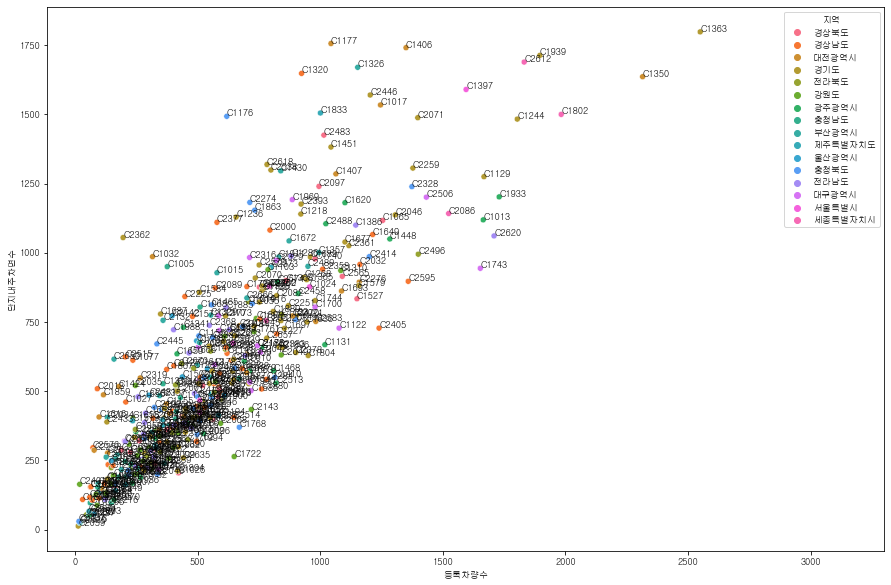

In [352]:
plt.figure(figsize=(15, 10))
plots = sns.scatterplot(data=train_danji, x='등록차량수', y='단지내주차면수', hue='지역')
for i, code in enumerate(train_danji['단지코드']):
    plots.annotate(code, (train_danji['등록차량수'][i], train_danji['단지내주차면수'][i]))
plt.xlim(right=3300)
plt.show()

In [186]:
train_danji.loc[train_danji['단지코드'] == 'C2362']

단지코드  총세대수   지역   공가수  지하철   버스  단지내주차면수  등록차량수
393  C2362  1509  경기도  46.0  0.0  2.0   1055.0  196.0

### 산점도(총세대수, 주차면수)

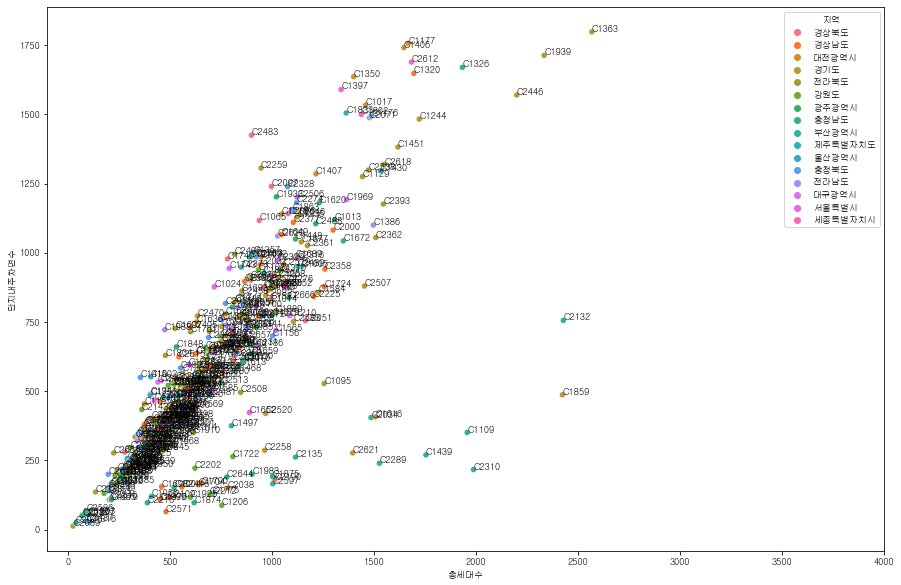

In [187]:
plt.figure(figsize=(15, 10))
plots = sns.scatterplot(data=train_danji, x='총세대수', y='단지내주차면수', hue='지역')
for i, code in enumerate(train_danji['단지코드']):
    plots.annotate(code, (train_danji['총세대수'][i], train_danji['단지내주차면수'][i]))
plt.xlim(right=4000)
plt.show()

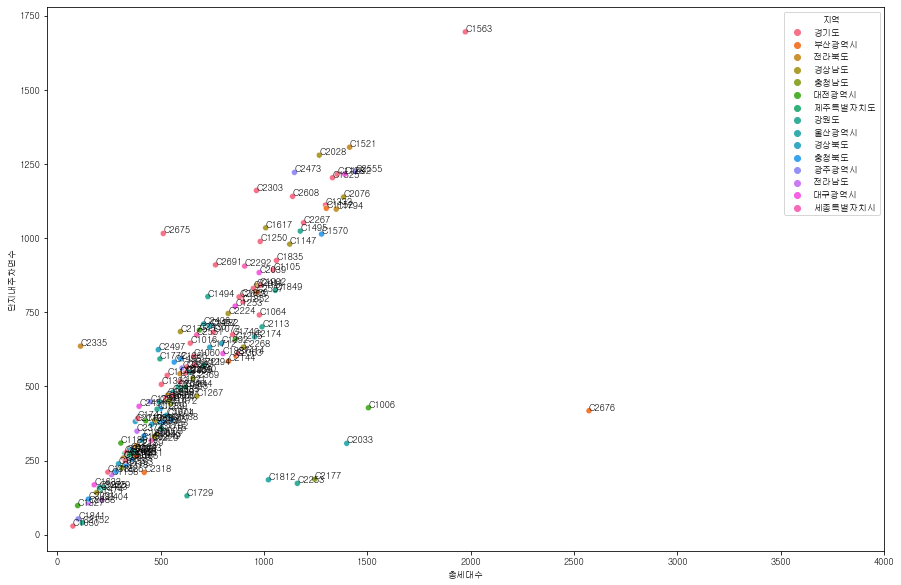

In [188]:
plt.figure(figsize=(15, 10))
plots = sns.scatterplot(data=test_danji, x='총세대수', y='단지내주차면수', hue='지역')
for i, code in enumerate(test_danji['단지코드']):
    plots.annotate(code, (test_danji['총세대수'][i], test_danji['단지내주차면수'][i]))
plt.xlim(right=4000)
plt.show()

### 산점도(건축연면적, 주차면수)

In [353]:
train['건축연면적'] = train['전용면적'] * train['전용면적별세대수']
test['건축연면적'] = test['전용면적'] * test['전용면적별세대수']

In [190]:
temp = train.groupby(['단지코드']).sum().reset_index()
train_size = pd.merge(train_danji, temp[['단지코드', '건축연면적']], how='inner', on='단지코드')

In [191]:
temp = test.groupby(['단지코드']).sum().reset_index()
test_size = pd.merge(test_danji, temp[['단지코드', '건축연면적']], how='inner', on='단지코드')

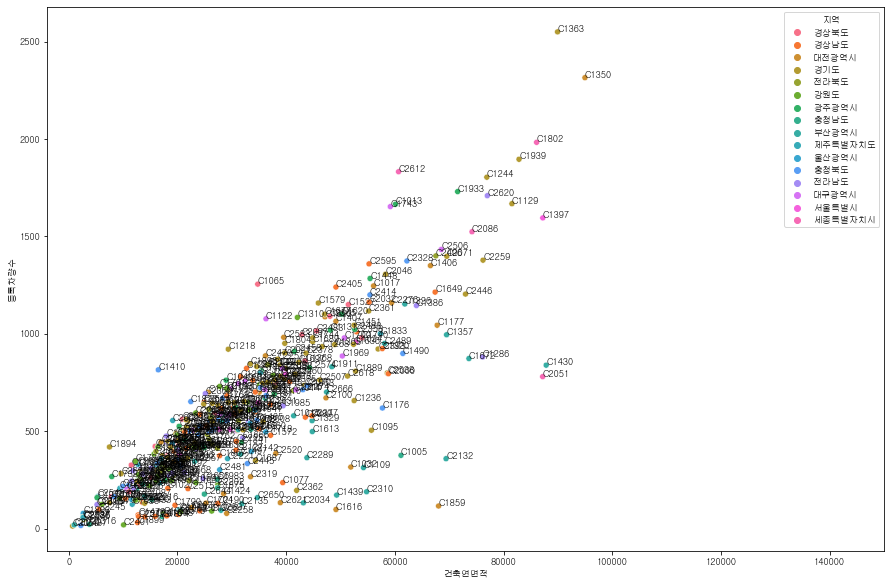

In [192]:
plt.figure(figsize=(15, 10))
plots = sns.scatterplot(data=train_size, x='건축연면적', y='등록차량수', hue='지역')
for i, code in enumerate(train_size['단지코드']):
    plots.annotate(code, (train_size['건축연면적'][i], train_size['등록차량수'][i]))
plt.xlim(right=150000)
plt.show()

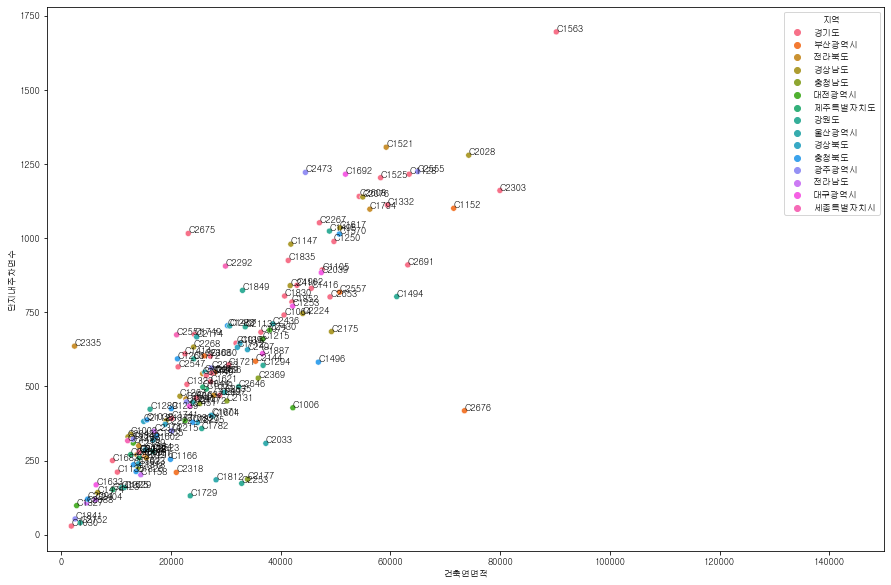

In [193]:
plt.figure(figsize=(15, 10))
plots = sns.scatterplot(data=test_size, x='건축연면적', y='단지내주차면수', hue='지역')
for i, code in enumerate(test_size['단지코드']):
    plots.annotate(code, (test_size['건축연면적'][i], test_size['단지내주차면수'][i]))
plt.xlim(right=150000)
plt.show()

건축연면적으로 따져도 추세선을 벗어나는 단지가 몇 개 있습니다.

### 레그플롯-지역별(총세대수, 등록차량수)

지역별로 살펴봐야겠습니다. 지역별로 법정주차대수가 다르기 때문에 그래프가 다르게 나타날 수 있습니다.

In [194]:
train_danji.head()

단지코드  총세대수     지역   공가수  지하철   버스  단지내주차면수   등록차량수
0  C2483   900   경상북도  38.0  0.0  3.0   1425.0  1015.0
1  C2515   545   경상남도  17.0  0.0  3.0    624.0   205.0
2  C1407  1216  대전광역시  13.0  1.0  1.0   1285.0  1064.0
3  C1945   755    경기도   6.0  1.0  3.0    734.0   730.0
4  C1470   696   전라북도  14.0  0.0  2.0    645.0   553.0

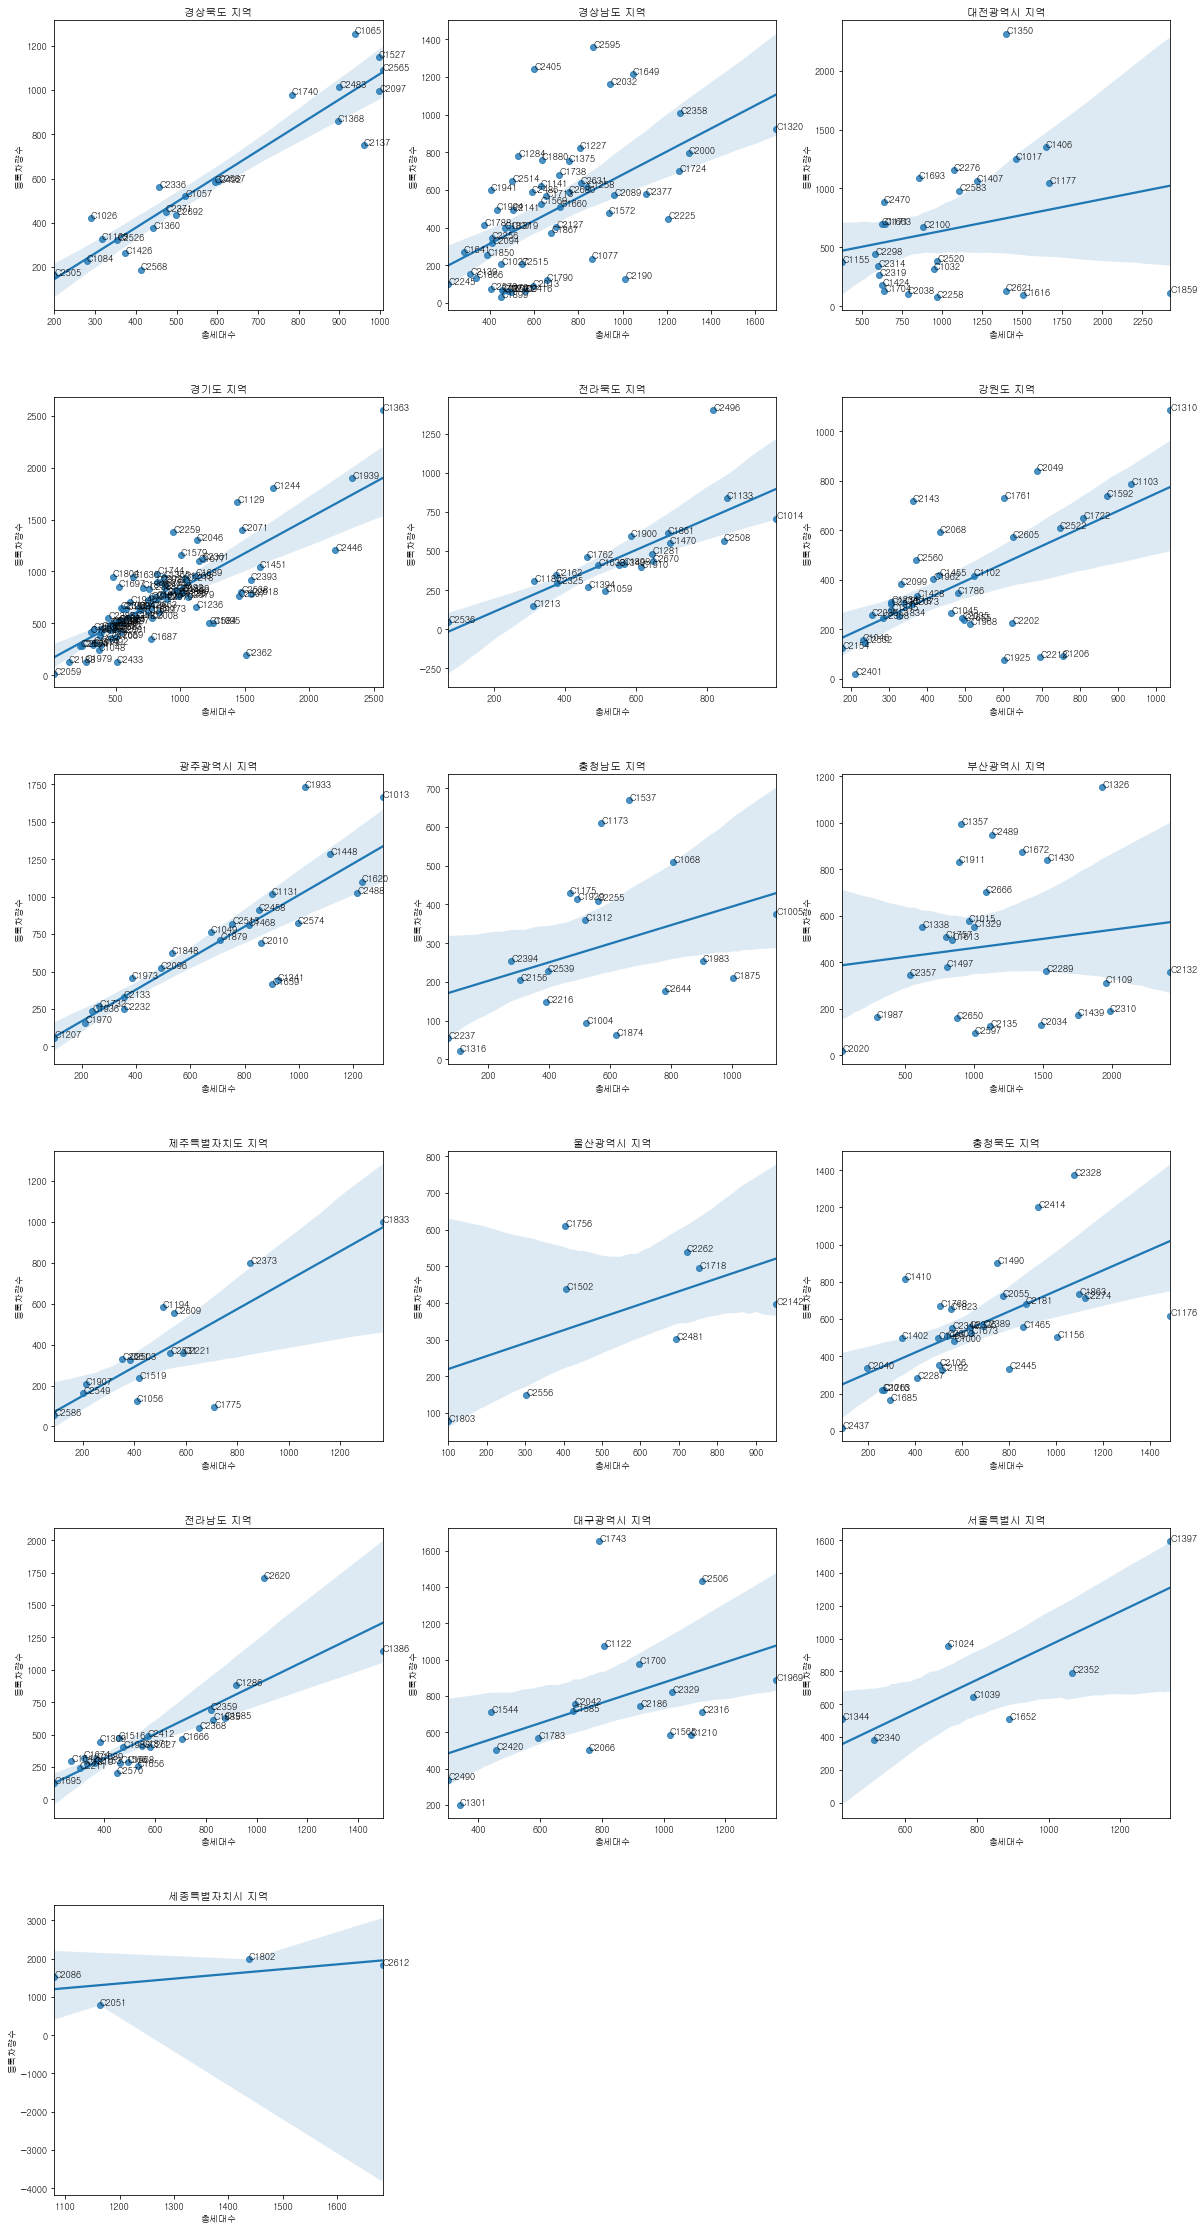

In [195]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(list(train_danji['지역'].unique())):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=train_danji.loc[train_danji['지역'] == n], x='총세대수', y='등록차량수')
    for i, code in enumerate(train_danji.loc[train_danji['지역'] == n].reset_index(drop=True)['단지코드']):
        plots.annotate(code, (train_danji.loc[train_danji['지역'] == n].reset_index(drop=True)['총세대수'][i],
                              train_danji.loc[train_danji['지역'] == n].reset_index(drop=True)['등록차량수'][i]))
    plt.title('{} 지역'.format(n))

- 보통은 법정주차대수 때문에 총세대수와 주차면수는 곧은 선형관계를 띄게 되어 있습니다.
- 그런데 우측 하단에 그 관계를 벗어나는 군집이 나타납니다. 대전, 강원도, 충남, 부산이 특히 그렇습니다.
- 가설은 아주 오래된 아파트이거나, 자차를 소유하지 않은 주민들이 많이 사는 지역일 가능성입니다.

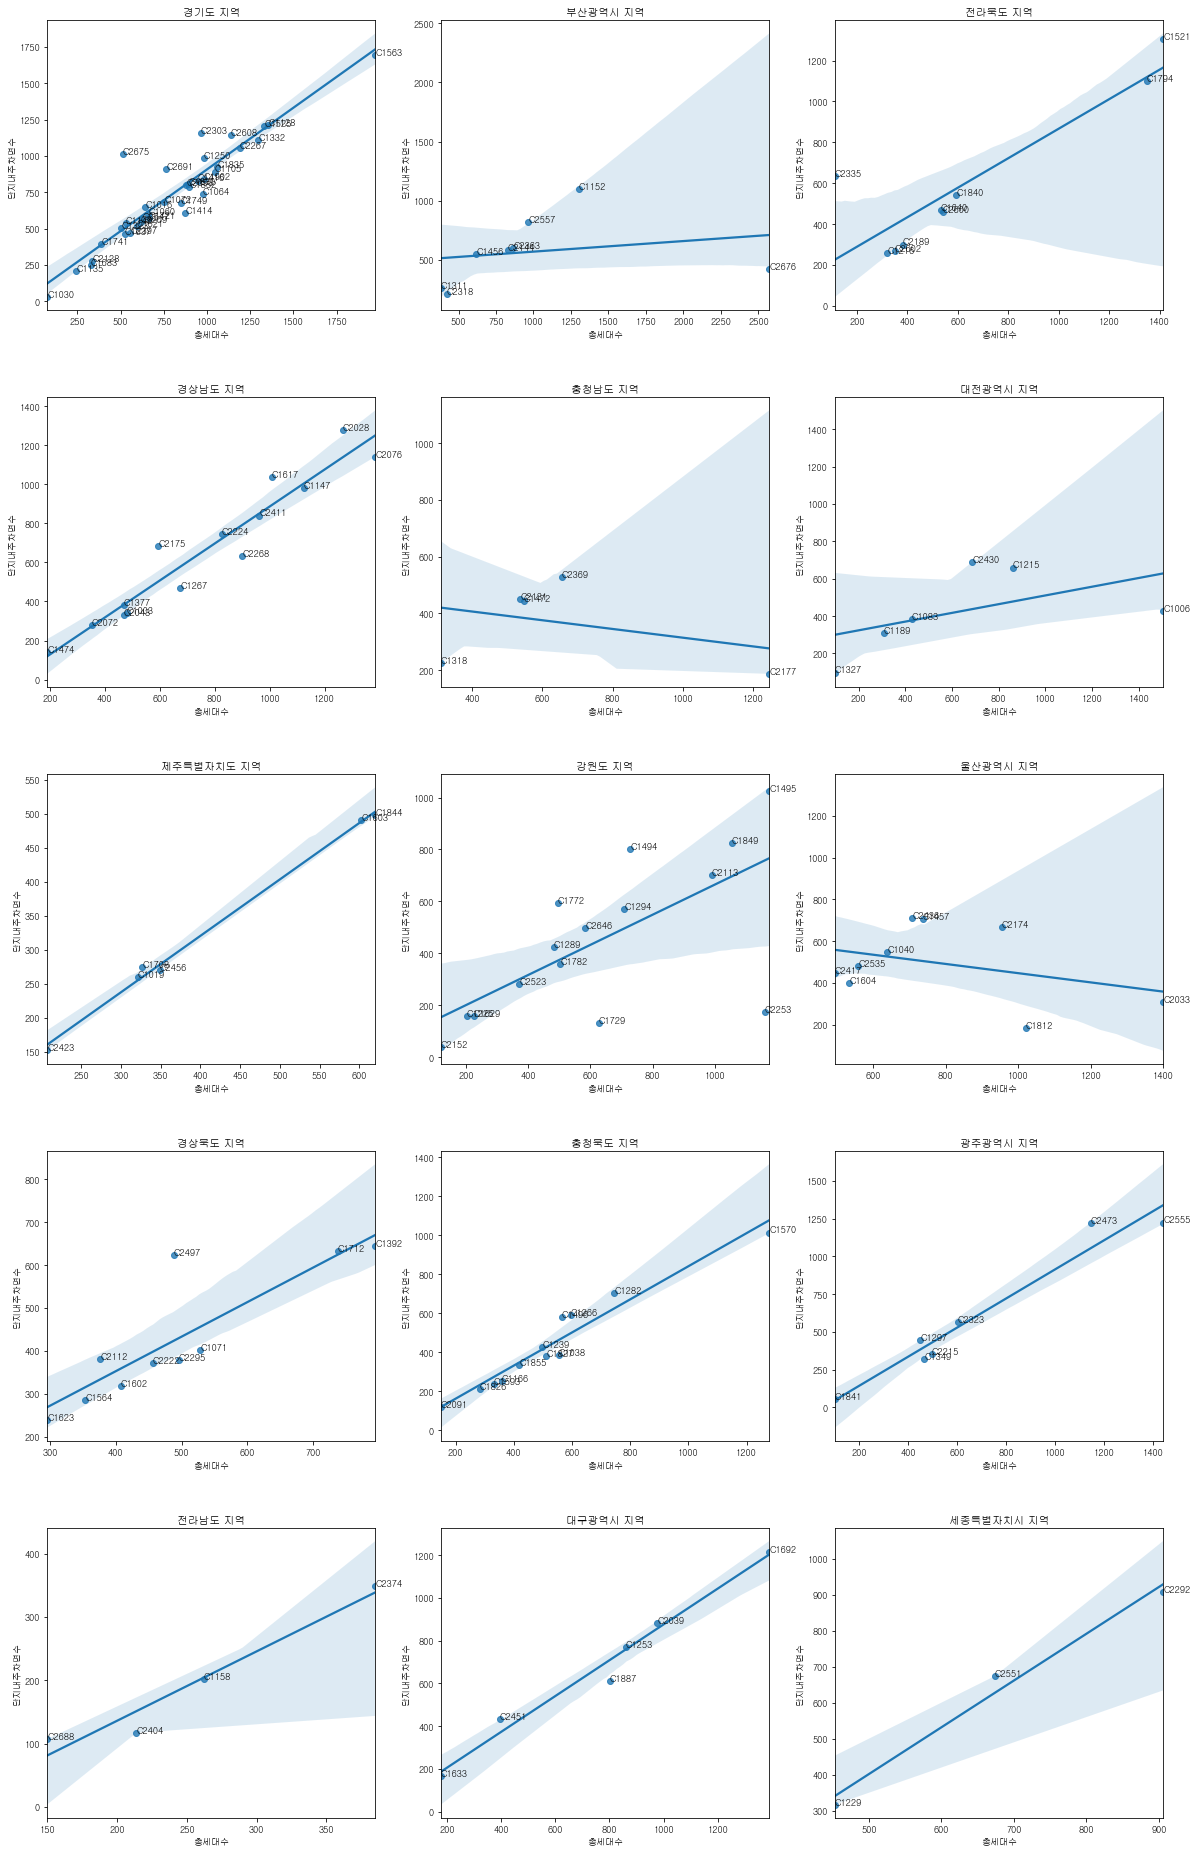

In [196]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(list(test_danji['지역'].unique())):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=test_danji.loc[test_danji['지역'] == n], x='총세대수', y='단지내주차면수')
    for i, code in enumerate(test_danji.loc[test_danji['지역'] == n].reset_index(drop=True)['단지코드']):
        plots.annotate(code, (test_danji.loc[test_danji['지역'] == n].reset_index(drop=True)['총세대수'][i],
                              test_danji.loc[test_danji['지역'] == n].reset_index(drop=True)['단지내주차면수'][i]))
    plt.title('{} 지역'.format(n))

### 산점도-지역별(건축연면적, 주차면수)

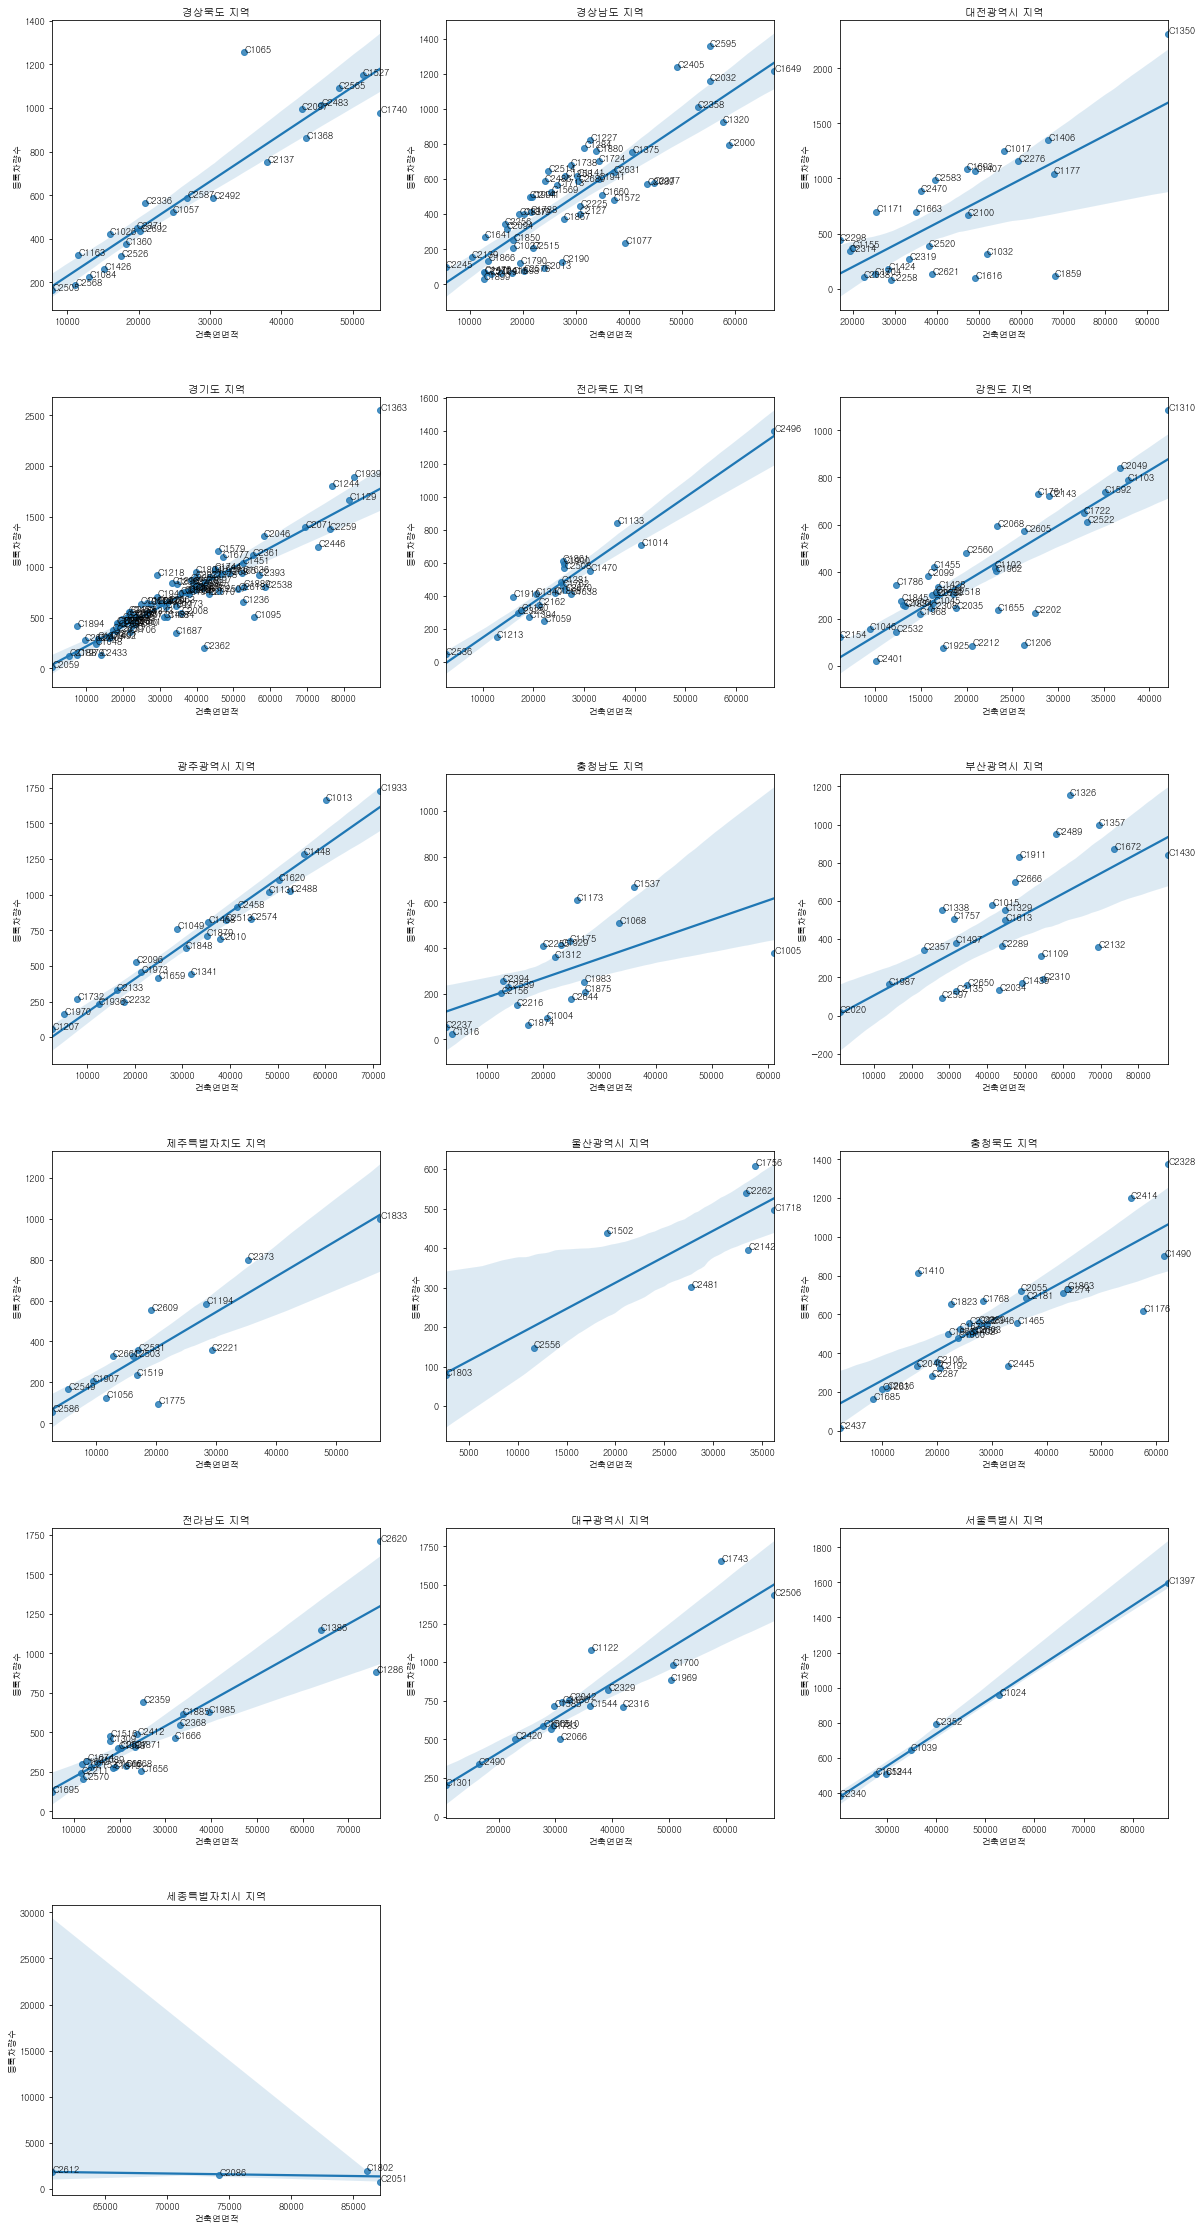

In [197]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(list(train_size['지역'].unique())):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=train_size.loc[train_size['지역'] == n], x='건축연면적', y='등록차량수')
    for i, code in enumerate(train_size.loc[train_size['지역'] == n].reset_index(drop=True)['단지코드']):
        plots.annotate(code, (train_size.loc[train_size['지역'] == n].reset_index(drop=True)['건축연면적'][i],
                              train_size.loc[train_size['지역'] == n].reset_index(drop=True)['등록차량수'][i]))
    plt.title('{} 지역'.format(n))

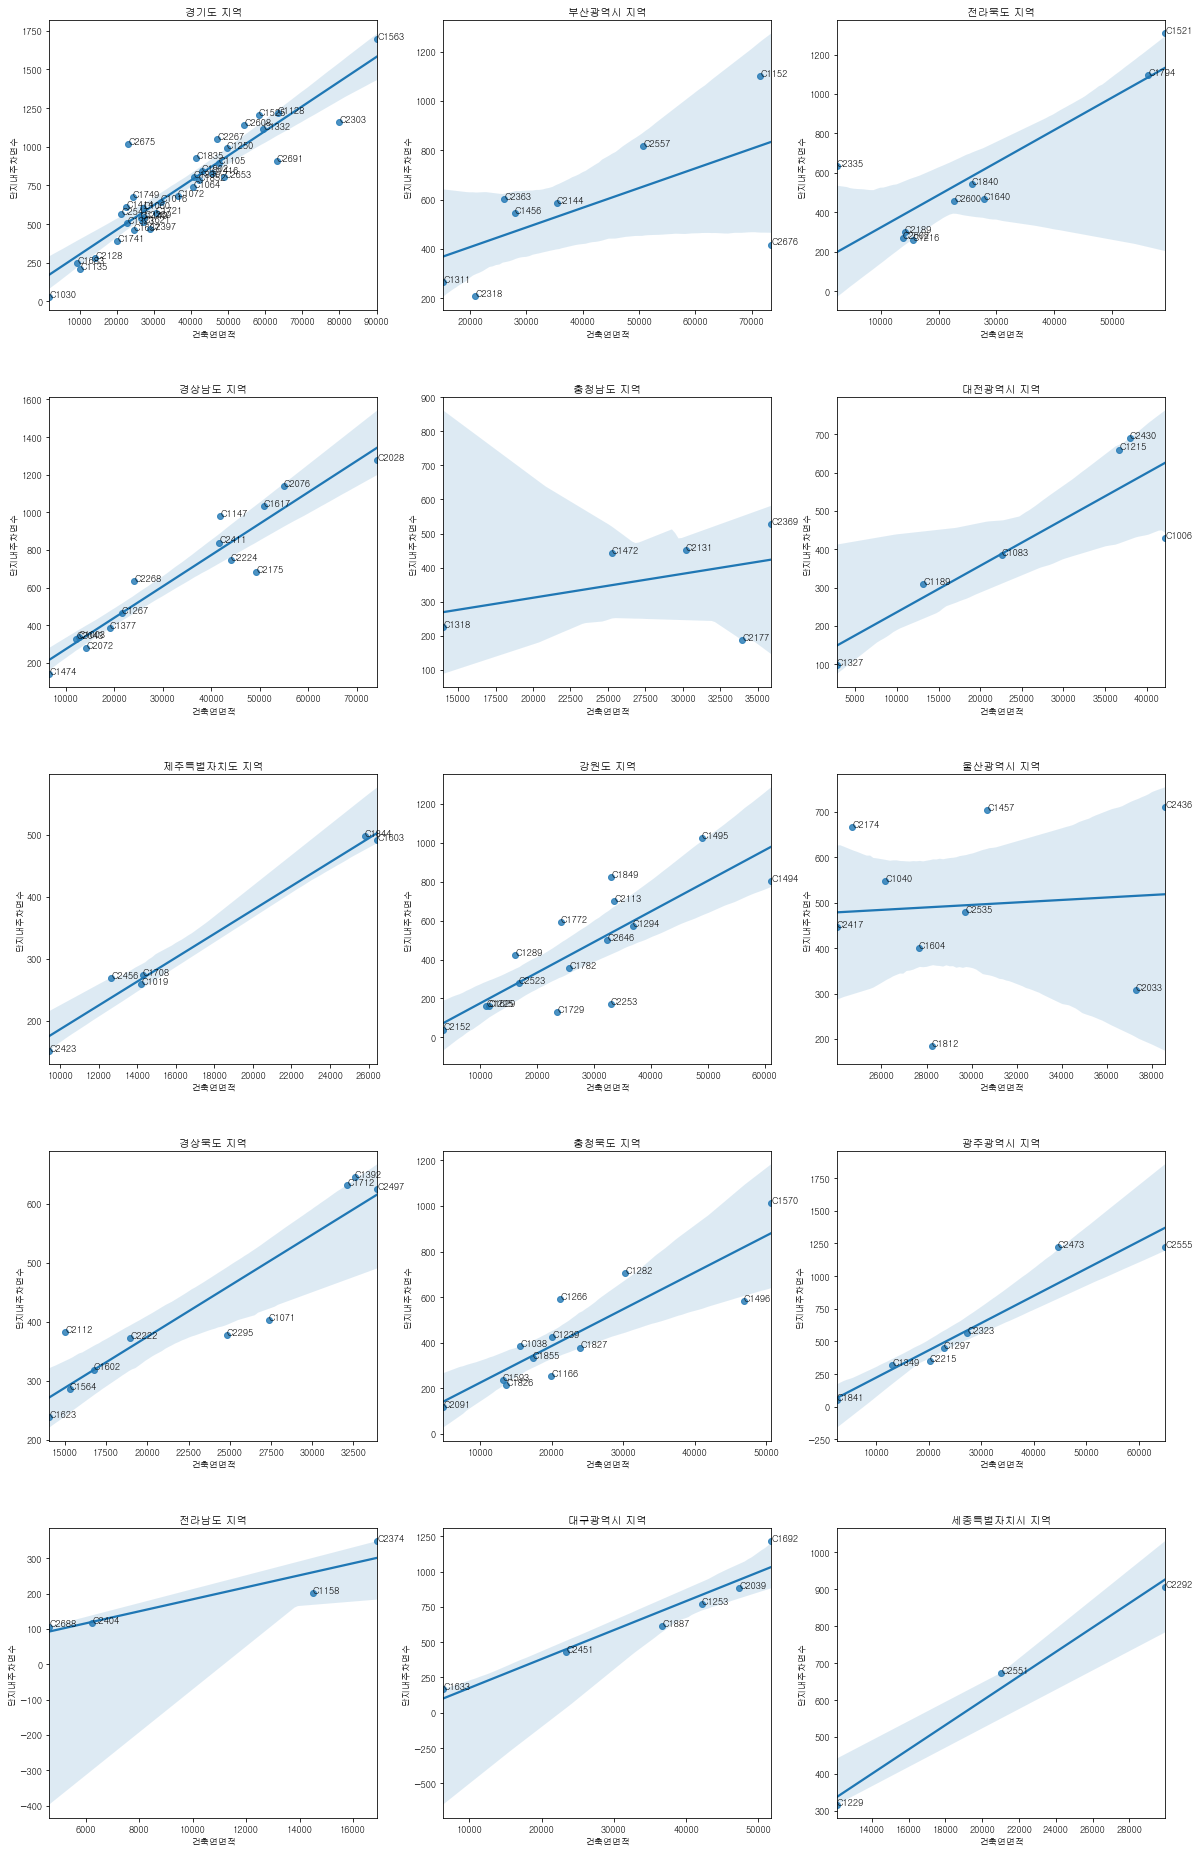

In [198]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(list(test_size['지역'].unique())):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=test_size.loc[test_size['지역'] == n], x='건축연면적', y='단지내주차면수')
    for i, code in enumerate(test_size.loc[test_size['지역'] == n].reset_index(drop=True)['단지코드']):
        plots.annotate(code, (test_size.loc[test_size['지역'] == n].reset_index(drop=True)['건축연면적'][i],
                              test_size.loc[test_size['지역'] == n].reset_index(drop=True)['단지내주차면수'][i]))
    plt.title('{} 지역'.format(n))

근데 또 예측해야 하는 단지에 비율이 맞지 않는 단지들이 존재한다는 것이죠

### 막대차트 (총세대수주차면수비 & 건축연면적주차면수비)

In [199]:
train_size['등록차량수/총세대수'] = train_size['등록차량수'] / train_size['총세대수']
train_size['등록차량수/건축연면적'] = (train_size['등록차량수'] / train_size['건축연면적']) * 100

In [200]:
train_size.nlargest(5, '등록차량수/총세대수')

단지코드  총세대수     지역   공가수  지하철   버스  단지내주차면수   등록차량수     건축연면적  \
196  C1410   356   충청북도  10.0  0.0  3.0    550.0   815.0  16485.44   
318  C1743   791  대구광역시  16.0  1.0  1.0    944.0  1653.0  59167.83   
300  C2405   600   경상남도  22.0  0.0  8.0    728.0  1240.0  49163.00   
272  C1804   478    경기도   3.0  0.0  3.0    629.0   951.0  39754.25   
359  C2143   363    강원도   2.0  0.0  2.0    434.0   719.0  29048.58   

     등록차량수/총세대수  등록차량수/건축연면적  
196    2.289326     4.943756  
318    2.089760     2.793748  
300    2.066667     2.522222  
272    1.989540     2.392197  
359    1.980716     2.475164

In [201]:
train_size.nsmallest(5, '등록차량수/총세대수')

단지코드  총세대수     지역   공가수  지하철   버스  단지내주차면수  등록차량수     건축연면적  등록차량수/총세대수  \
30  C1859  2424  대전광역시   1.0  1.0  4.0    487.0  116.0  68049.09    0.047855   
25  C1616  1507  대전광역시   1.0  0.0  2.0    407.0   98.0  49170.99    0.065030   
50  C1899   451   경상남도   0.0  0.0  4.0    109.0   31.0  12653.34    0.068736   
27  C2258   965  대전광역시  13.0  0.0  3.0    287.0   78.0  29065.37    0.080829   
39  C2034  1486  부산광역시   2.0  1.0  3.0    405.0  132.0  43176.91    0.088829   

    등록차량수/건축연면적  
30     0.170465  
25     0.199305  
50     0.244995  
27     0.268361  
39     0.305719

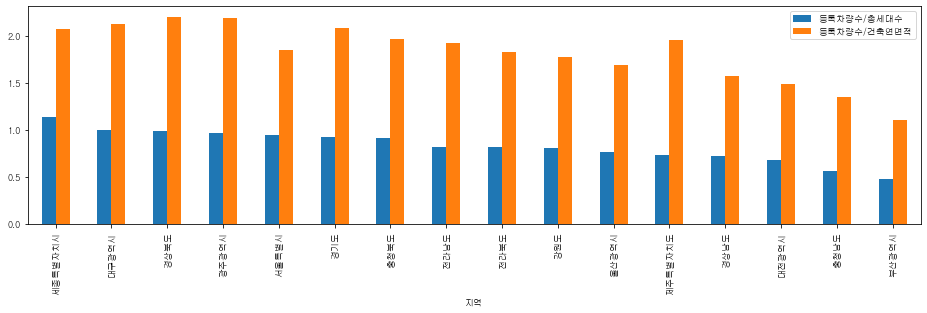

In [202]:
(train_size
 .groupby(['지역'])[['등록차량수/총세대수', '등록차량수/건축연면적']]
 .mean()
 .sort_values(by='등록차량수/총세대수', ascending=False)
 .plot(kind='bar', figsize=(16, 4)))
plt.show()

- 두 비가 다 높은 서울시는 주어진 총세대수와 건축연면적에 비해 주차면수가 높게 형성되어 있다는 뜻입니다.
- 세종은 총세대수에 대한 주차면수는 높지만, 건축연면적에 비해서는 낮습니다.
- 보통 총세대수가 많으면 건축연면적도 높습니다. 그래서 비율이 비슷하게 가는 것이 보통입니다.
- 세종같은 경우는 총세대수에 비해 건축연면적이 높은 편이라는 뜻이고, 이는 대형평형수가 많다는 의미입니다.
- 총세대수주차면수비에 비해 건축연면적주차면수비가 높은 경기도 같은 경우는 반대라는 것입니다.

In [203]:
train_size['등록차량수/총세대수'] = train_size['등록차량수'] / train_size['총세대수']
train_size['등록차량수/건축연면적'] = (train_size['등록차량수'] / train_size['건축연면적']) * 50
train_size['등록차량수/주차면수'] = train_size['등록차량수'] / train_size['단지내주차면수']

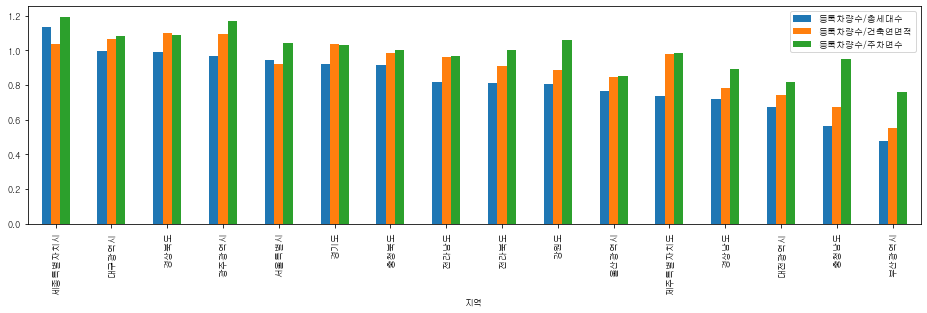

In [204]:
(train_size
 .groupby(['지역'])[['등록차량수/총세대수', '등록차량수/건축연면적', '등록차량수/주차면수']]
 .mean()
 .sort_values(by='등록차량수/총세대수', ascending=False)
 .plot(kind='bar', figsize=(16, 4)))
plt.show()

### 공급유형 바차트

공급유형을 살펴봐야겠습니다.

In [205]:
train_reqruit = pd.pivot_table(train, index='단지코드', columns='공급유형', values='전용면적별세대수', aggfunc=np.sum, fill_value=0)
train_reqruit.head()

공급유형   공공분양  공공임대(10년)  공공임대(50년)  공공임대(5년)  공공임대(분납)  국민임대  영구임대  임대상가  장기전세  \
단지코드                                                                            
C1000     0          0          0         0         0   566     0     0     0   
C1004     0          0          0         0         0     0   504    17     0   
C1005     0          0          0         0         0  1144     0     0     0   
C1013     0          0          0         0         0  1308     0     0     0   
C1014     0          0          0         0         0   996     0     0     0   

공급유형   행복주택  
단지코드         
C1000     0  
C1004     0  
C1005     0  
C1013     0  
C1014     0

In [206]:
train_reqruit2 = pd.merge(train_reqruit.reset_index(), train[['단지코드', '지역', '등록차량수']],
                          how='inner', on='단지코드').drop_duplicates().set_index('단지코드')

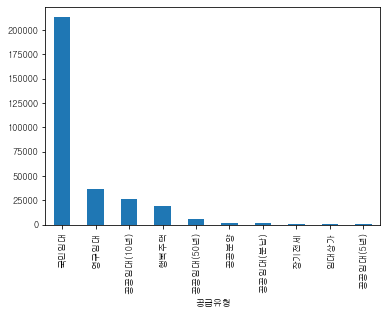

In [207]:
train_reqruit.sum(axis=0).sort_values(ascending=False).plot(kind='bar')
plt.show()

- 국민임대가 20만호가 넘으며 압도적인 비중입니다. 그 뒤로 영구임대, 공공임대, 행복주택 등이 있습니다.

In [208]:
test['공급유형'].unique()

array(['국민임대', '영구임대', '임대상가', '공공임대(50년)', '공공임대(10년)', '공공임대(분납)',
       '행복주택'], dtype=object)

In [209]:
train_reqruit2.nlargest(5, '공공분양')

공공분양  공공임대(10년)  공공임대(50년)  공공임대(5년)  공공임대(분납)  국민임대  영구임대  임대상가  장기전세  \
단지코드                                                                            
C1350   711        342          0         0       348     0     0     0     0   
C1206   267          0          0         0         0     0   478    10     0   
C2470   230          0          0       406         0     0     0     0     0   
C1000     0          0          0         0         0   566     0     0     0   
C1004     0          0          0         0         0     0   504    17     0   

       행복주택     지역   등록차량수  
단지코드                        
C1350     0  대전광역시  2315.0  
C1206     0    강원도    90.0  
C2470     0  대전광역시   887.0  
C1000     0   충청북도   481.0  
C1004     0   충청남도    93.0

In [210]:
train_reqruit2.nlargest(10, '공공임대(10년)')

공공분양  공공임대(10년)  공공임대(50년)  공공임대(5년)  공공임대(분납)  국민임대  영구임대  임대상가  장기전세  \
단지코드                                                                            
C1129     0       1444          0         0         0     0     0     0     0   
C1802     0       1438          0         0         0     0     0     0     0   
C2051     0       1164          0         0         0     0     0     0     0   
C2506     0       1124          0         0         0     0     0     0     0   
C2086     0       1080          0         0         0     0     0     0     0   
C2328     0       1077          0         0         0     0     0     0     0   
C2620     0       1029          0         0         0     0     0     0     0   
C1933     0       1022          0         0         0     0     0     0     0   
C2259     0        947          0         0         0     0     0     0     0   
C2414     0        924          0         0         0     0     0     0     0   

       행복주택       지역   등록차량수  
단지코드                          
C1129     0      경기도  1668.0  
C1802     0  세종특별자치시  1983.0  
C2051     0  세종특별자치시   780.0  
C2506     0    대구광역시  1433.0  
C2086     0  세종특별자치시  1524.0  
C2328     0     충청북도  1374.0  
C2620     0     전라남도  1709.0  
C1933     0    광주광역시  1730.0  
C2259     0      경기도  1378.0  
C2414     0     충청북도  1200.0

In [211]:
train_reqruit2.nlargest(10, '공공임대(5년)')

공공분양  공공임대(10년)  공공임대(50년)  공공임대(5년)  공공임대(분납)  국민임대  영구임대  임대상가  장기전세  \
단지코드                                                                            
C2470   230          0          0       406         0     0     0     0     0   
C1000     0          0          0         0         0   566     0     0     0   
C1004     0          0          0         0         0     0   504    17     0   
C1005     0          0          0         0         0  1144     0     0     0   
C1013     0          0          0         0         0  1308     0     0     0   
C1014     0          0          0         0         0   996     0     0     0   
C1015     0          0          0         0         0   961     0     0     0   
C1017     0          0          0         0         0  1460     0     0     0   
C1022     0          0          0         0         0   389     0     0     0   
C1024     0        718          0         0         0     0     0     0     0   

       행복주택     지역   등록차량수  
단지코드                        
C2470     0  대전광역시   887.0  
C1000     0   충청북도   481.0  
C1004     0   충청남도    93.0  
C1005     0   충청남도   376.0  
C1013     0  광주광역시  1665.0  
C1014     0   전라북도   708.0  
C1015     0  부산광역시   579.0  
C1017     0  대전광역시  1246.0  
C1022     0    경기도   450.0  
C1024     0  서울특별시   957.0

In [212]:
train_reqruit2.nlargest(10, '공공임대(50년)')

공공분양  공공임대(10년)  공공임대(50년)  공공임대(5년)  공공임대(분납)  국민임대  영구임대  임대상가  장기전세  \
단지코드                                                                            
C2520     0          0        960         0         0     0     0     0     0   
C1497     0          0        802         0         0     0     0     0     0   
C1424     0          0        624         0         0     0     0     0     0   
C2202     0          0        623         0         0     0     0     0     0   
C2221     0          0        590         0         0     0     0     0     0   
C2340     0          0        512         0         0     0     0     0     0   
C1722     0          0        505         0         0     0   298     6     0   
C2216     0          0        390         0         0     0     0     0     0   
C2644     0          0        387         0         0     0   388     3     0   
C1850     0          0        385         0         0     0     0     0     0   

       행복주택       지역  등록차량수  
단지코드                         
C2520     0    대전광역시  386.0  
C1497     0    부산광역시  382.0  
C1424     0    대전광역시  179.0  
C2202     0      강원도  226.0  
C2221     0  제주특별자치도  359.0  
C2340     0    서울특별시  382.0  
C1722     0      강원도  649.0  
C2216     0     충청남도  149.0  
C2644     0     충청남도  177.0  
C1850     0     경상남도  254.0

In [213]:
req_cols = ['공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)',
       '영구임대', '임대상가', '장기전세', '행복주택']

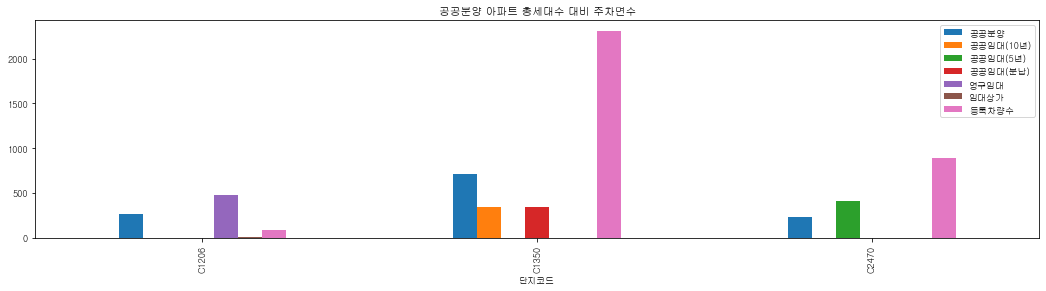

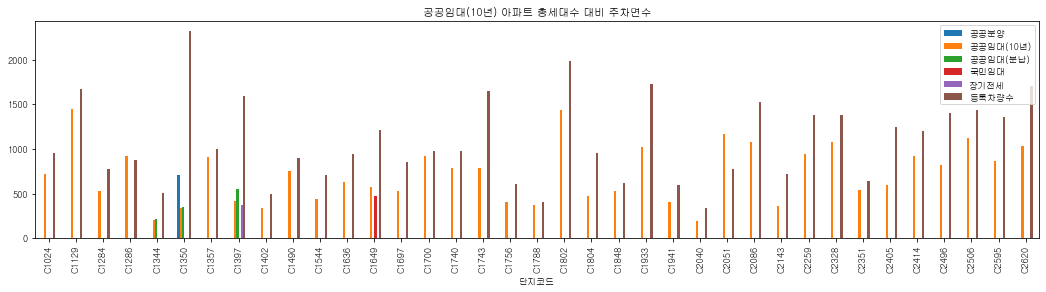

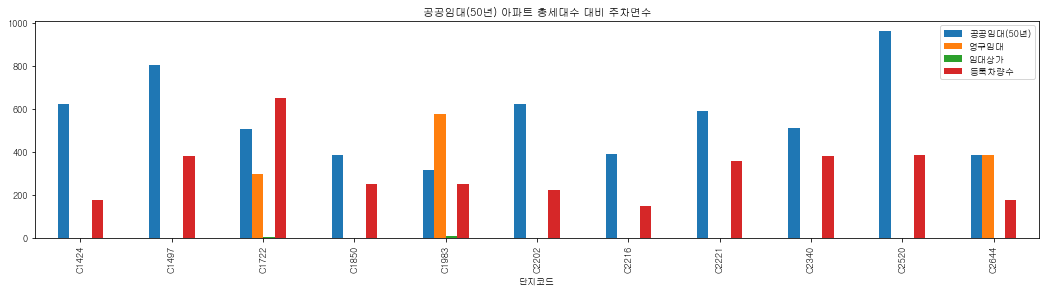

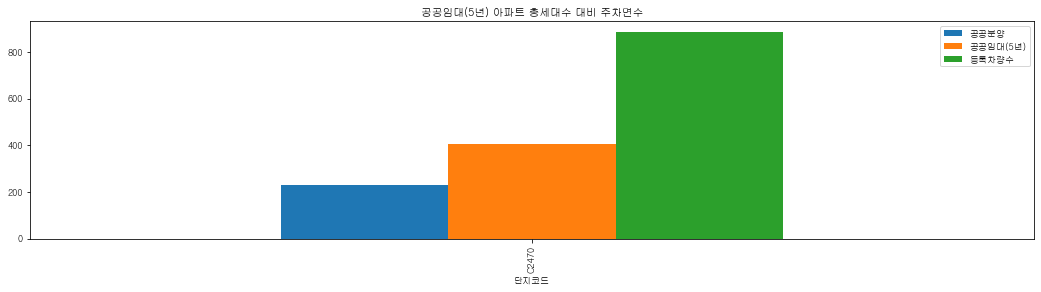

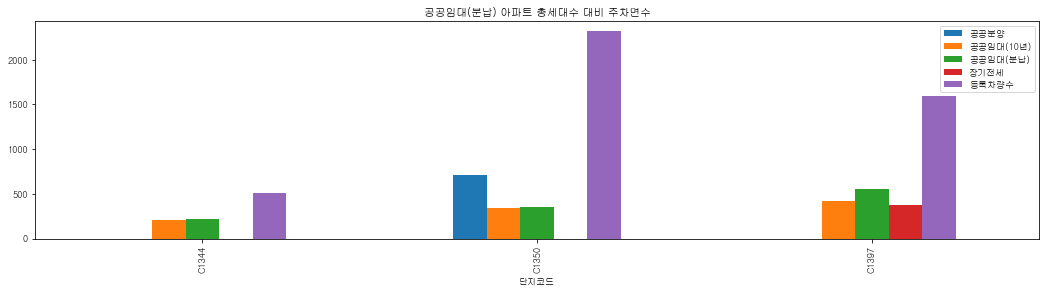

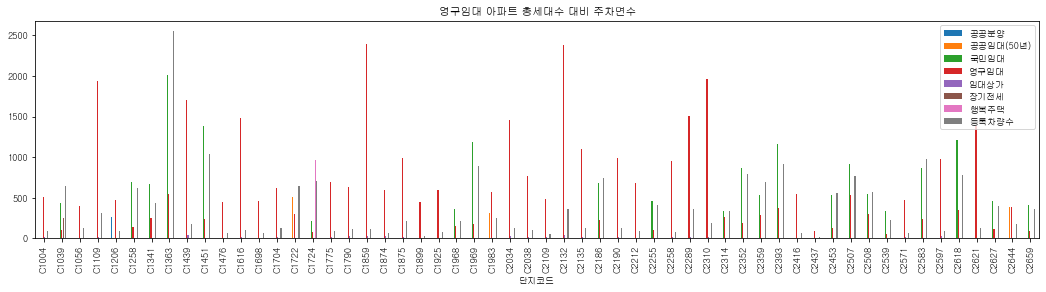

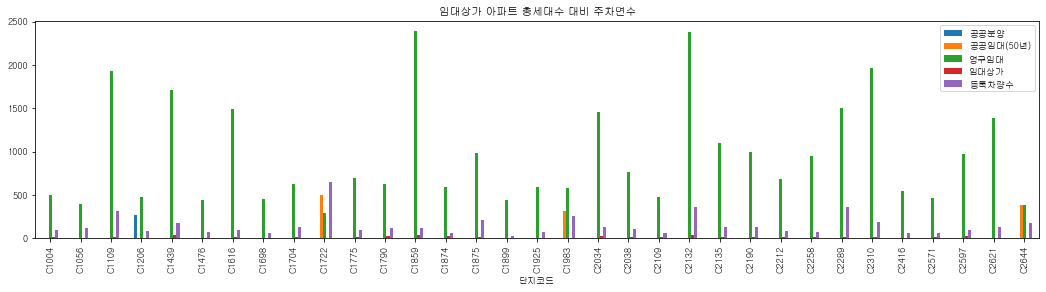

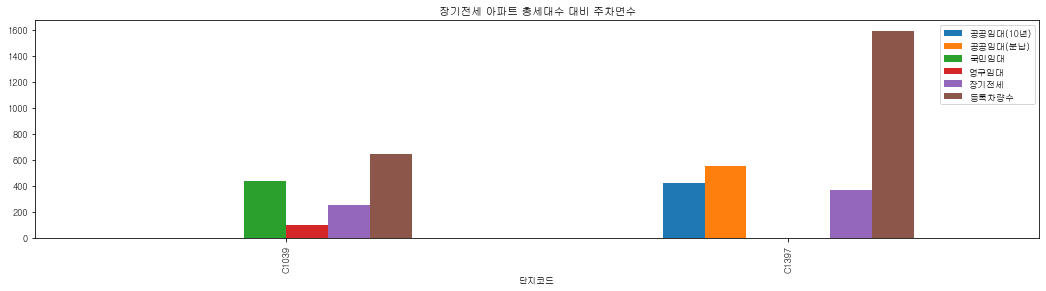

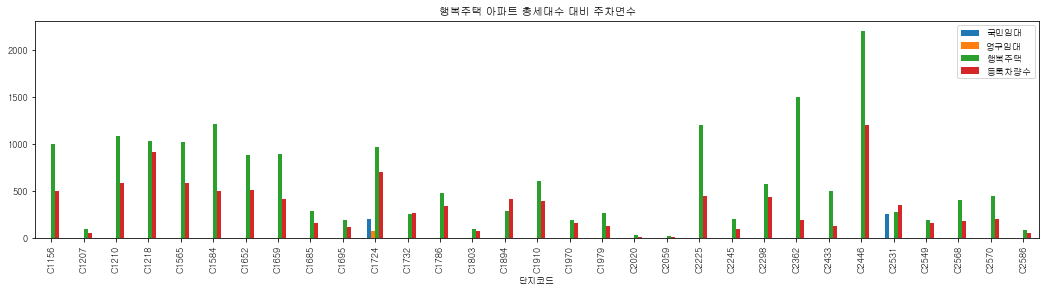

In [214]:
for col in req_cols:
    train_reqruit2.loc[train_reqruit2[col] != 0,
                      [x for x in train_reqruit2.columns if train_reqruit2.loc[train_reqruit2[col] != 0][x].sum() != 0]].plot(kind='bar', figsize=(18, 4))
    plt.title('{} 아파트 총세대수 대비 주차면수'.format(col))
    plt.show()

- 특이한 점이 많습니다.
1. 임대상가가 있는 아파트는 무조건 영구임대단지다. 총세대수에 비해 주차면수도 굉장히 적다.
2. 공공임대(50년)이 있는 단지는 주차면수가 총세대수에 비해 굉장히 적다.
3. 행복주택은 보통 행복주택만 있습니다.
4. 공공분양, 공공임대(5년), 장기전세는 단지가 너무 없습니다.

In [215]:
train_reqruit2.nlargest(10, '임대상가')

공공분양  공공임대(10년)  공공임대(50년)  공공임대(5년)  공공임대(분납)  국민임대  영구임대  임대상가  장기전세  \
단지코드                                                                            
C1439     0          0          0         0         0     0  1710    45     0   
C2132     0          0          0         0         0     0  2385    43     0   
C1859     0          0          0         0         0     0  2389    35     0   
C1790     0          0          0         0         0     0   627    30     0   
C2597     0          0          0         0         0     0   976    29     0   
C1874     0          0          0         0         0     0   592    27     0   
C2034     0          0          0         0         0     0  1460    26     0   
C1109     0          0          0         0         0     0  1937    20     0   
C2289     0          0          0         0         0     0  1507    20     0   
C2310     0          0          0         0         0     0  1968    20     0   

       행복주택     지역  등록차량수  
단지코드                       
C1439     0  부산광역시  172.0  
C2132     0  부산광역시  359.0  
C1859     0  대전광역시  116.0  
C1790     0   경상남도  120.0  
C2597     0  부산광역시   94.0  
C1874     0   충청남도   62.0  
C2034     0  부산광역시  132.0  
C1109     0  부산광역시  313.0  
C2289     0  부산광역시  364.0  
C2310     0  부산광역시  189.0

### 자격유형 바차트

In [216]:
train_qual = pd.pivot_table(train, index='단지코드', columns='자격유형', values='전용면적별세대수', aggfunc=np.sum, fill_value=0)
train_qual.head()

자격유형      A  B    C   D  E  F  G  H  I  J  K  L  M  N  O
단지코드                                                    
C1000   566  0    0   0  0  0  0  0  0  0  0  0  0  0  0
C1004     0  0  504  17  0  0  0  0  0  0  0  0  0  0  0
C1005  1144  0    0   0  0  0  0  0  0  0  0  0  0  0  0
C1013  1308  0    0   0  0  0  0  0  0  0  0  0  0  0  0
C1014   996  0    0   0  0  0  0  0  0  0  0  0  0  0  0

In [217]:
train_qual2 = pd.merge(train_qual.reset_index(),
                       train[['단지코드', '지역', '등록차량수']],
                       how='inner', on='단지코드').drop_duplicates().set_index('단지코드')

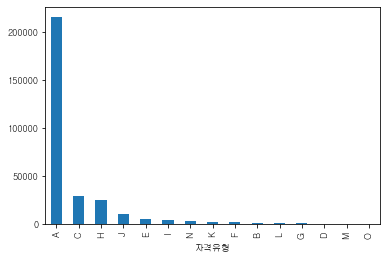

In [218]:
train_qual.sum(axis=0).sort_values(ascending=False).plot(kind='bar')
plt.show()

- A가 압도적으로 많습니다. C, H가 뒤를 잇습니다.

In [219]:
qual_cols = ['C', 'D', 'E', 'H', 'I', 'J', 'K', 'L']
qual_cols2 = ['M', 'N', 'O', 'F', 'B', 'G']

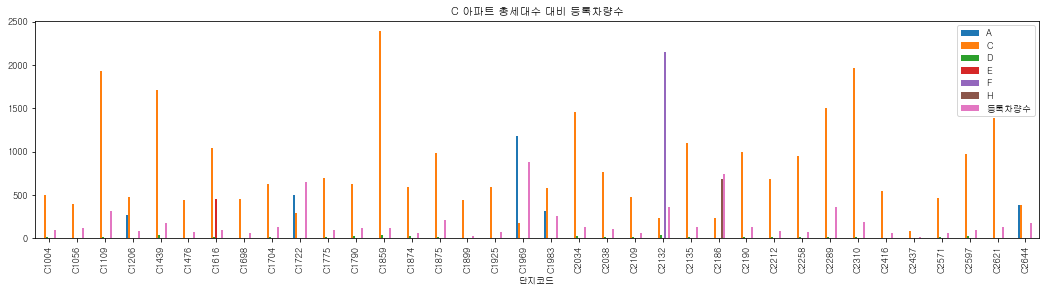

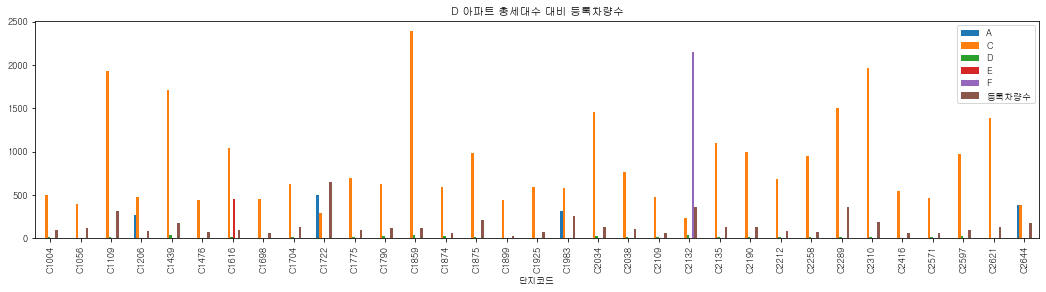

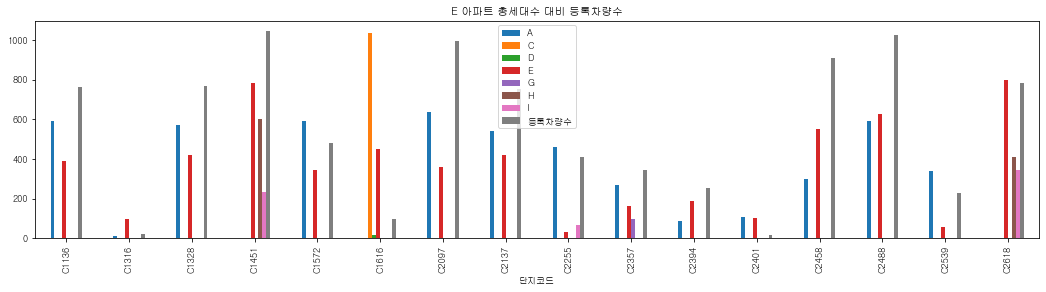

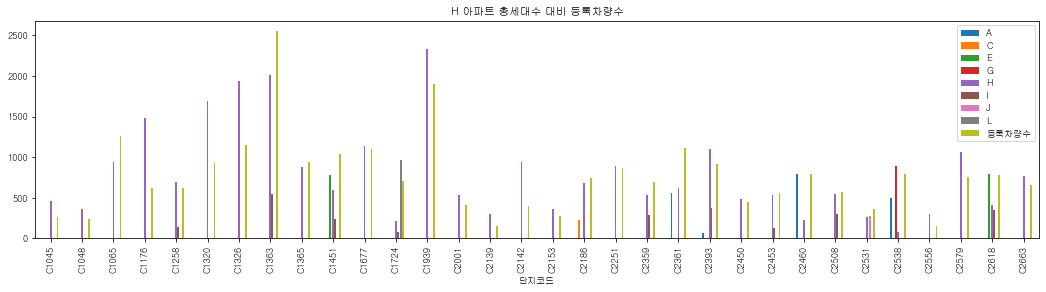

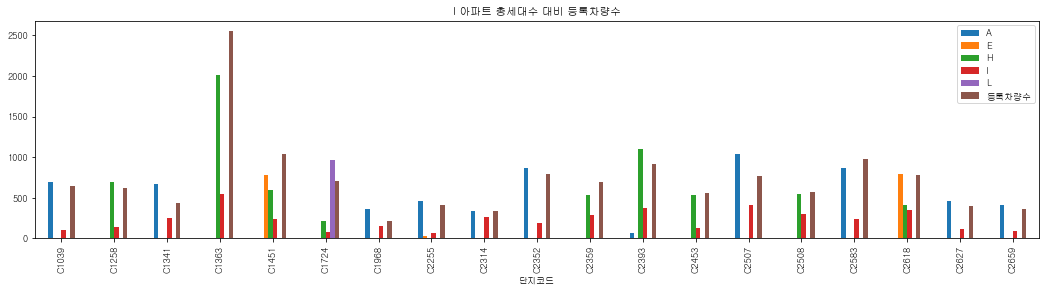

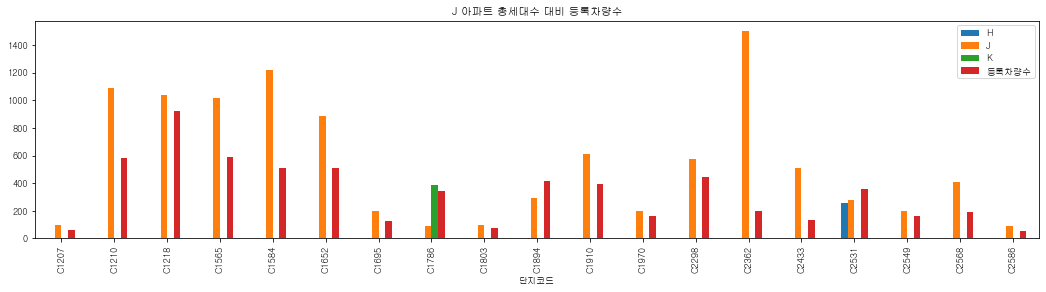

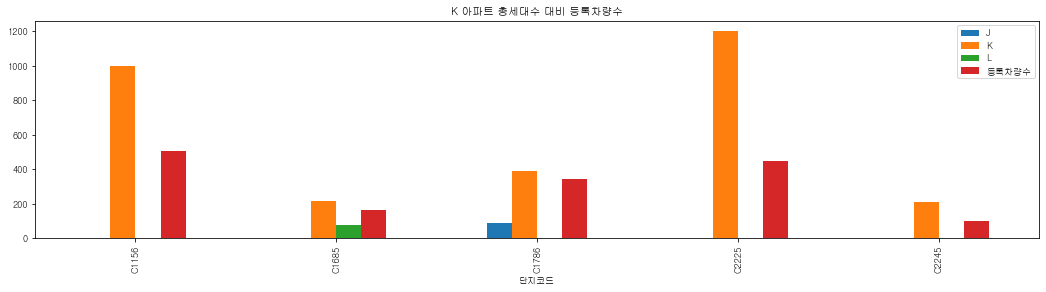

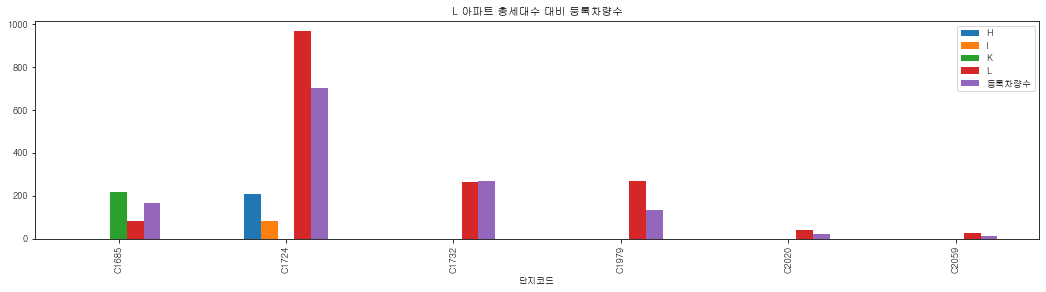

In [220]:
for col in qual_cols:
    train_qual2.loc[train_qual2[col] != 0,
                      [x for x in train_qual2.columns if train_qual2.loc[train_qual2[col] != 0][x].sum() != 0]].plot(kind='bar', figsize=(18, 4))
    plt.title('{} 아파트 총세대수 대비 등록차량수'.format(col))
    plt.show()

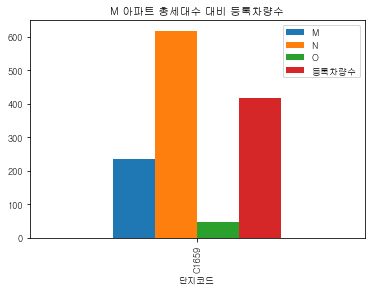

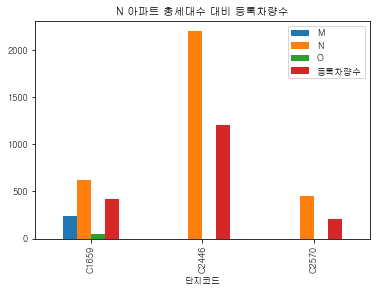

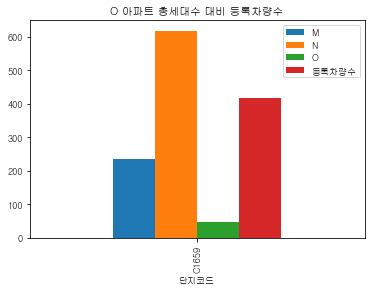

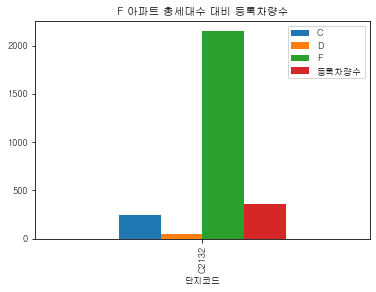

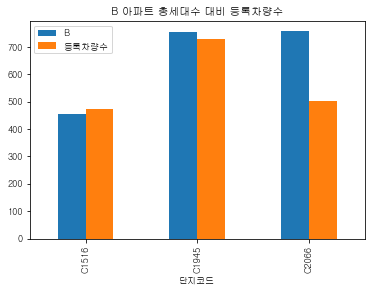

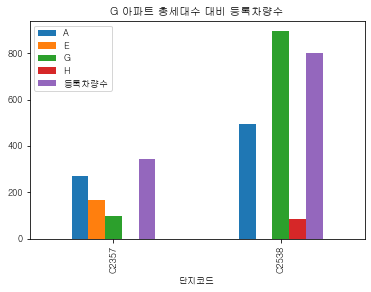

In [221]:
for col in qual_cols2:
    train_qual2.loc[train_qual2[col] != 0,
                      [x for x in train_qual2.columns if train_qual2.loc[train_qual2[col] != 0][x].sum() != 0]].plot(kind='bar', figsize=(6, 4))
    plt.title('{} 아파트 총세대수 대비 등록차량수'.format(col))
    plt.show()

In [222]:
train_req_qual = pd.merge(train_qual, train_reqruit2.reset_index(), how='inner', on='단지코드').drop_duplicates().set_index('단지코드')
train_req_qual.head()

A  B    C   D  E  F  G  H  I  J  K  L  M  N  O  공공분양  공공임대(10년)  \
단지코드                                                                        
C1000   566  0    0   0  0  0  0  0  0  0  0  0  0  0  0     0          0   
C1004     0  0  504  17  0  0  0  0  0  0  0  0  0  0  0     0          0   
C1005  1144  0    0   0  0  0  0  0  0  0  0  0  0  0  0     0          0   
C1013  1308  0    0   0  0  0  0  0  0  0  0  0  0  0  0     0          0   
C1014   996  0    0   0  0  0  0  0  0  0  0  0  0  0  0     0          0   

       공공임대(50년)  공공임대(5년)  공공임대(분납)  국민임대  영구임대  임대상가  장기전세  행복주택     지역  \
단지코드                                                                        
C1000          0         0         0   566     0     0     0     0   충청북도   
C1004          0         0         0     0   504    17     0     0   충청남도   
C1005          0         0         0  1144     0     0     0     0   충청남도   
C1013          0         0         0  1308     0     0     0     0  광주광역시   
C1014          0         0         0   996     0     0     0     0   전라북도   

        등록차량수  
단지코드           
C1000   481.0  
C1004    93.0  
C1005   376.0  
C1013  1665.0  
C1014   708.0

In [223]:
for col in req_cols:
    print(col)
    print(tabulate(train_req_qual.loc[train_req_qual[col] != 0,
                                      [x for x in train_req_qual.columns if train_req_qual.loc[train_req_qual[col] != 0][x].sum() != 0]],
                  headers='keys', tablefmt='psql'))
    print("")

공공분양
+------------+------+-----+-----+------------+------------------+-----------------+------------------+------------+------------+------------+--------------+
| 단지코드   |    A |   C |   D |   공공분양 |   공공임대(10년) |   공공임대(5년) |   공공임대(분납) |   영구임대 |   임대상가 | 지역       |   등록차량수 |
|------------+------+-----+-----+------------+------------------+-----------------+------------------+------------+------------+------------+--------------|
| C1206      |  267 | 478 |  10 |        267 |                0 |               0 |                0 |        478 |         10 | 강원도     |           90 |
| C1350      | 1401 |   0 |   0 |        711 |              342 |               0 |              348 |          0 |          0 | 대전광역시 |         2315 |
| C2470      |  636 |   0 |   0 |        230 |                0 |             406 |                0 |          0 |          0 | 대전광역시 |          887 |
+------------+------+-----+-----+------------+------------------+-----------------+------------------+---

In [224]:
for col in ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']:
    print(col)
    print(tabulate(train_req_qual.loc[train_req_qual[col] != 0,
                                      [x for x in train_req_qual.columns if train_req_qual.loc[train_req_qual[col] != 0][x].sum() != 0]],
                  headers='keys', tablefmt='psql'))
    print("")

B
+------------+-----+------------+------------+--------------+
| 단지코드   |   B |   국민임대 | 지역       |   등록차량수 |
|------------+-----+------------+------------+--------------|
| C1516      | 456 |        456 | 전라남도   |          475 |
| C1945      | 755 |        755 | 경기도     |          730 |
| C2066      | 757 |        757 | 대구광역시 |          503 |
+------------+-----+------------+------------+--------------+

C
+------------+------+------+-----+-----+------+-----+------------+------------------+------------+------------+------------+----------------+--------------+
| 단지코드   |    A |    C |   D |   E |    F |   H |   공공분양 |   공공임대(50년) |   국민임대 |   영구임대 |   임대상가 | 지역           |   등록차량수 |
|------------+------+------+-----+-----+------+-----+------------+------------------+------------+------------+------------+----------------+--------------|
| C1004      |    0 |  504 |  17 |   0 |    0 |   0 |          0 |                0 |          0 |        504 |         17 | 충청남도       |           9

### 지역별로, 자격유형별 평균 임대료를 살펴봐야겠습니다.

In [225]:
mean_rent = train.groupby(['지역', '자격유형'])[['면적당임대료']].mean().reset_index()

In [226]:
mean_rent = mean_rent.loc[mean_rent['면적당임대료'] != 0]

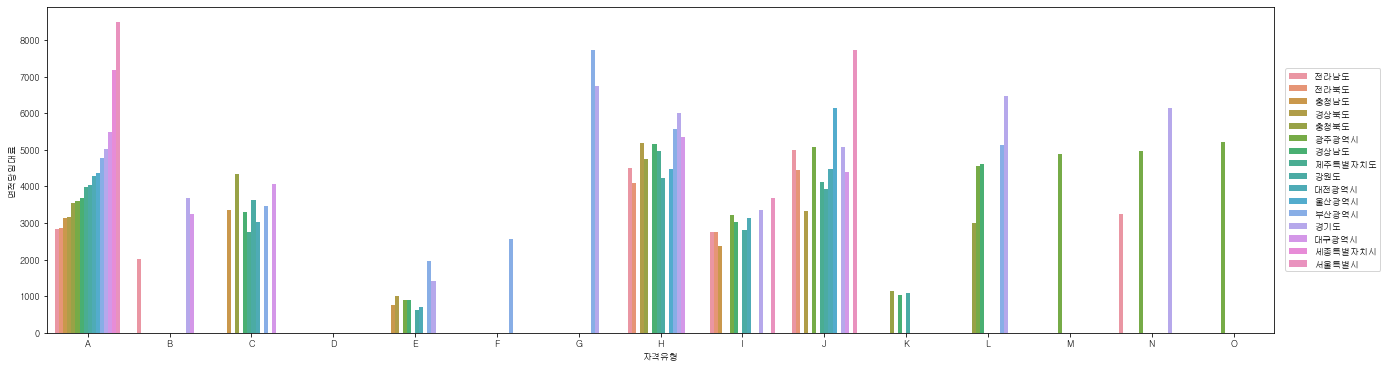

In [227]:
plt.figure(figsize=(22, 6))
sns.barplot(data=mean_rent.sort_values(by=['자격유형', '면적당임대료']),
            x='자격유형', y='면적당임대료', hue='지역')
plt.legend(loc='right', bbox_to_anchor=(1.09, 0.5))
plt.show()

- A, J, G 는 꽤나 높게 형성됩니다.
- 그러나 E, K 는 꽤나 낮게 형성됩니다.

In [228]:
kookmin_A = (
    train
    .loc[(train['공급유형'] == '국민임대') & (train['자격유형'] == 'A')]
    .groupby(['지역'])['면적당임대료']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)
kookmin_A

면적당임대료
지역                  
서울특별시    7487.593573
세종특별자치시  5321.380731
경기도      4856.416305
부산광역시    4641.213217
대구광역시    4272.213051
대전광역시    4084.761630
강원도      3940.679162
제주특별자치도  3787.516145
울산광역시    3574.029464
경상남도     3354.302561
충청북도     3103.855208
광주광역시    3058.832986
충청남도     3032.201320
경상북도     3028.435011
전라북도     2688.863480
전라남도     2534.966167

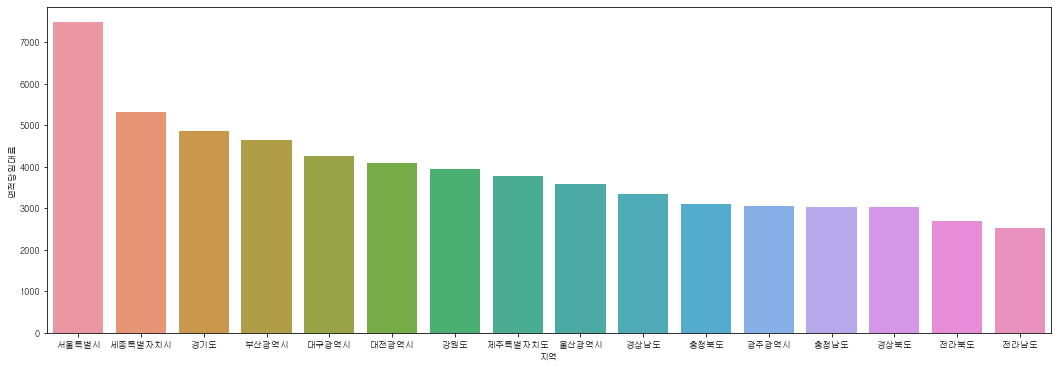

In [229]:
plt.figure(figsize=(18, 6))
sns.barplot(data=kookmin_A, x=kookmin_A.index, y='면적당임대료')
plt.show()

- 국민임대일반지수를 만들어줄 수도 있을 것 같습니다. 표준화를 통해서..
- 지역별 국민임대, A 의 평균 면적당 임대료를 수치로 넣어주면, 해당 지역의 보통의 지가의 수치를 대변할 수 있을 것도 같습니다.
- 문제는 강원도가 상당히 높은 게 이상합니다.

In [230]:
mean_ = kookmin_A['면적당임대료'].mean()
std_ = kookmin_A['면적당임대료'].std()
kookmin_A['국민임대일반지수'] = (kookmin_A['면적당임대료'] - mean_) / std_

In [231]:
kookmin_A

면적당임대료  국민임대일반지수
지역                            
서울특별시    7487.593573  2.871092
세종특별자치시  5321.380731  1.126345
경기도      4856.416305  0.751845
부산광역시    4641.213217  0.578513
대구광역시    4272.213051  0.281306
대전광역시    4084.761630  0.130326
강원도      3940.679162  0.014277
제주특별자치도  3787.516145 -0.109086
울산광역시    3574.029464 -0.281036
경상남도     3354.302561 -0.458013
충청북도     3103.855208 -0.659732
광주광역시    3058.832986 -0.695995
충청남도     3032.201320 -0.717445
경상북도     3028.435011 -0.720478
전라북도     2688.863480 -0.993982
전라남도     2534.966167 -1.117936

In [232]:
mean_rent = train.groupby(['지역', '자격유형'])[['면적당임대료']].mean().reset_index()

In [233]:
# 자격유형이 존재하지 않는 지역이 있는데, 0 으로 동일하게 넣어주겠습니다. 원활한 시각화를 위해.
for region in list(mean_rent['지역'].unique()):
    for qual in list(mean_rent['자격유형'].unique()):
        if len(mean_rent.loc[(mean_rent['지역'] == region) & (mean_rent['자격유형'] == qual)]) == 0:
            mean_rent = mean_rent.append({'지역': region, '자격유형': qual, '면적당임대료': 0}, ignore_index=True)
        else:
            pass

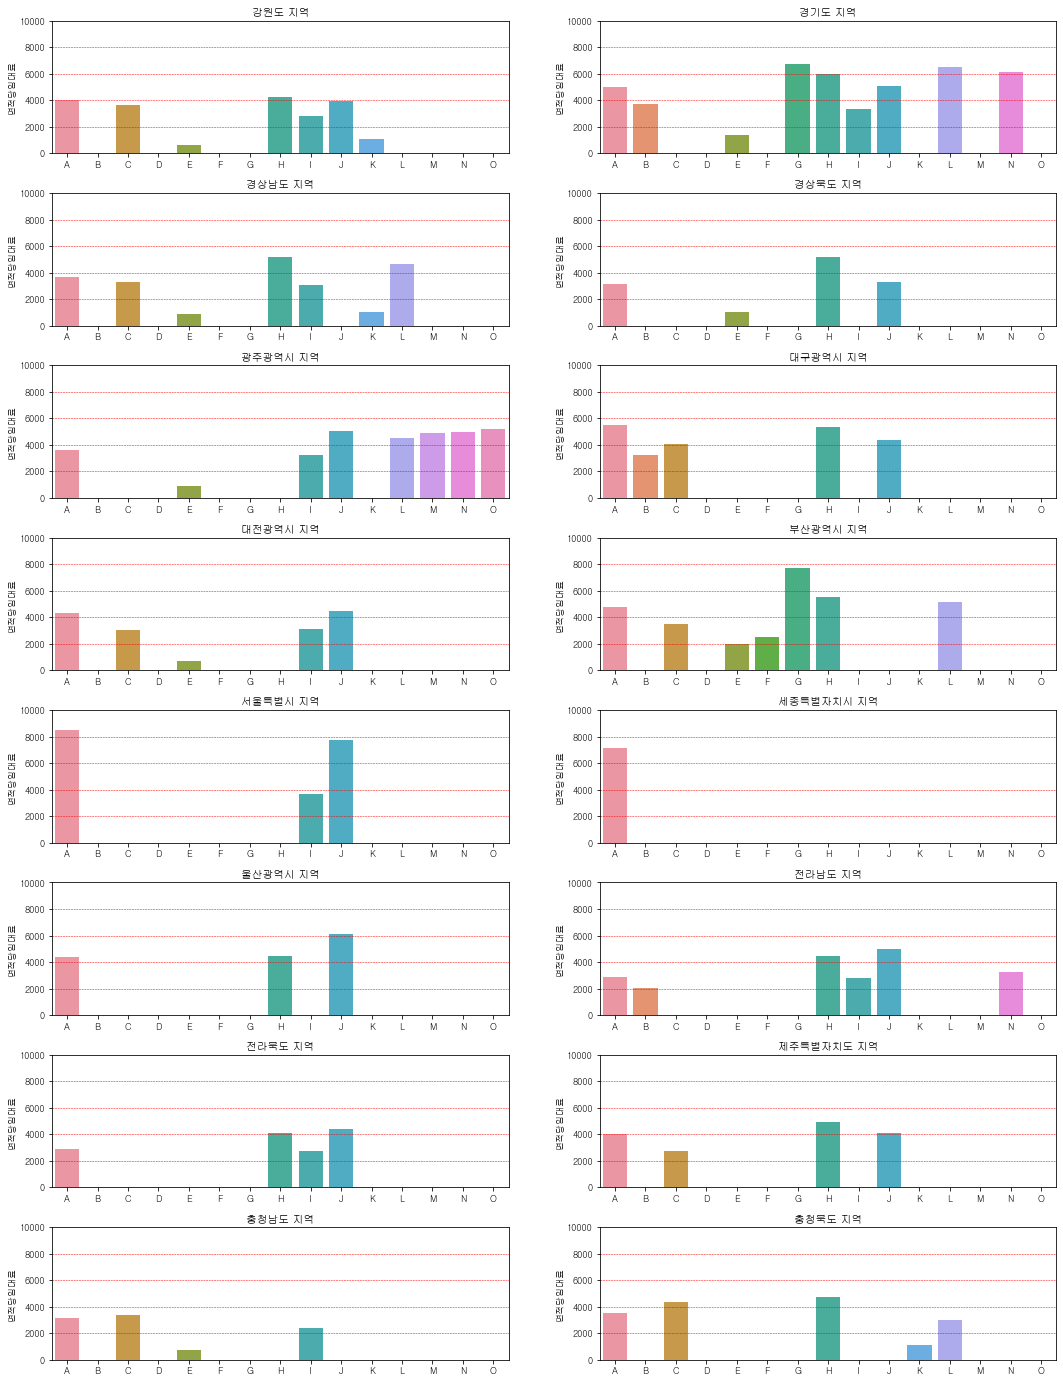

In [234]:
# 지역별로 임대료를 자격유형을 기준, 상대적으로 살펴보기 위함입니다.

fig = plt.figure(figsize=(18, 50))
for i, n in enumerate(list(mean_rent['지역'].unique())):
    plt.subplot(16, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.barplot(data=mean_rent.loc[mean_rent['지역'] == n].sort_values('자격유형'), x='자격유형', y='면적당임대료')
    plt.ylim(top = 10000)
    plt.axhline(y = 2000, color = 'r', linestyle = '--', linewidth = 0.5)
    plt.axhline(y = 4000, color = 'r', linestyle = '--', linewidth = 0.5)
    plt.axhline(y = 6000, color = 'r', linestyle = '--', linewidth = 0.5)
    plt.axhline(y = 8000, color = 'r', linestyle = '--', linewidth = 0.5)
    plt.xlabel('')
    plt.title('{} 지역'.format(n))

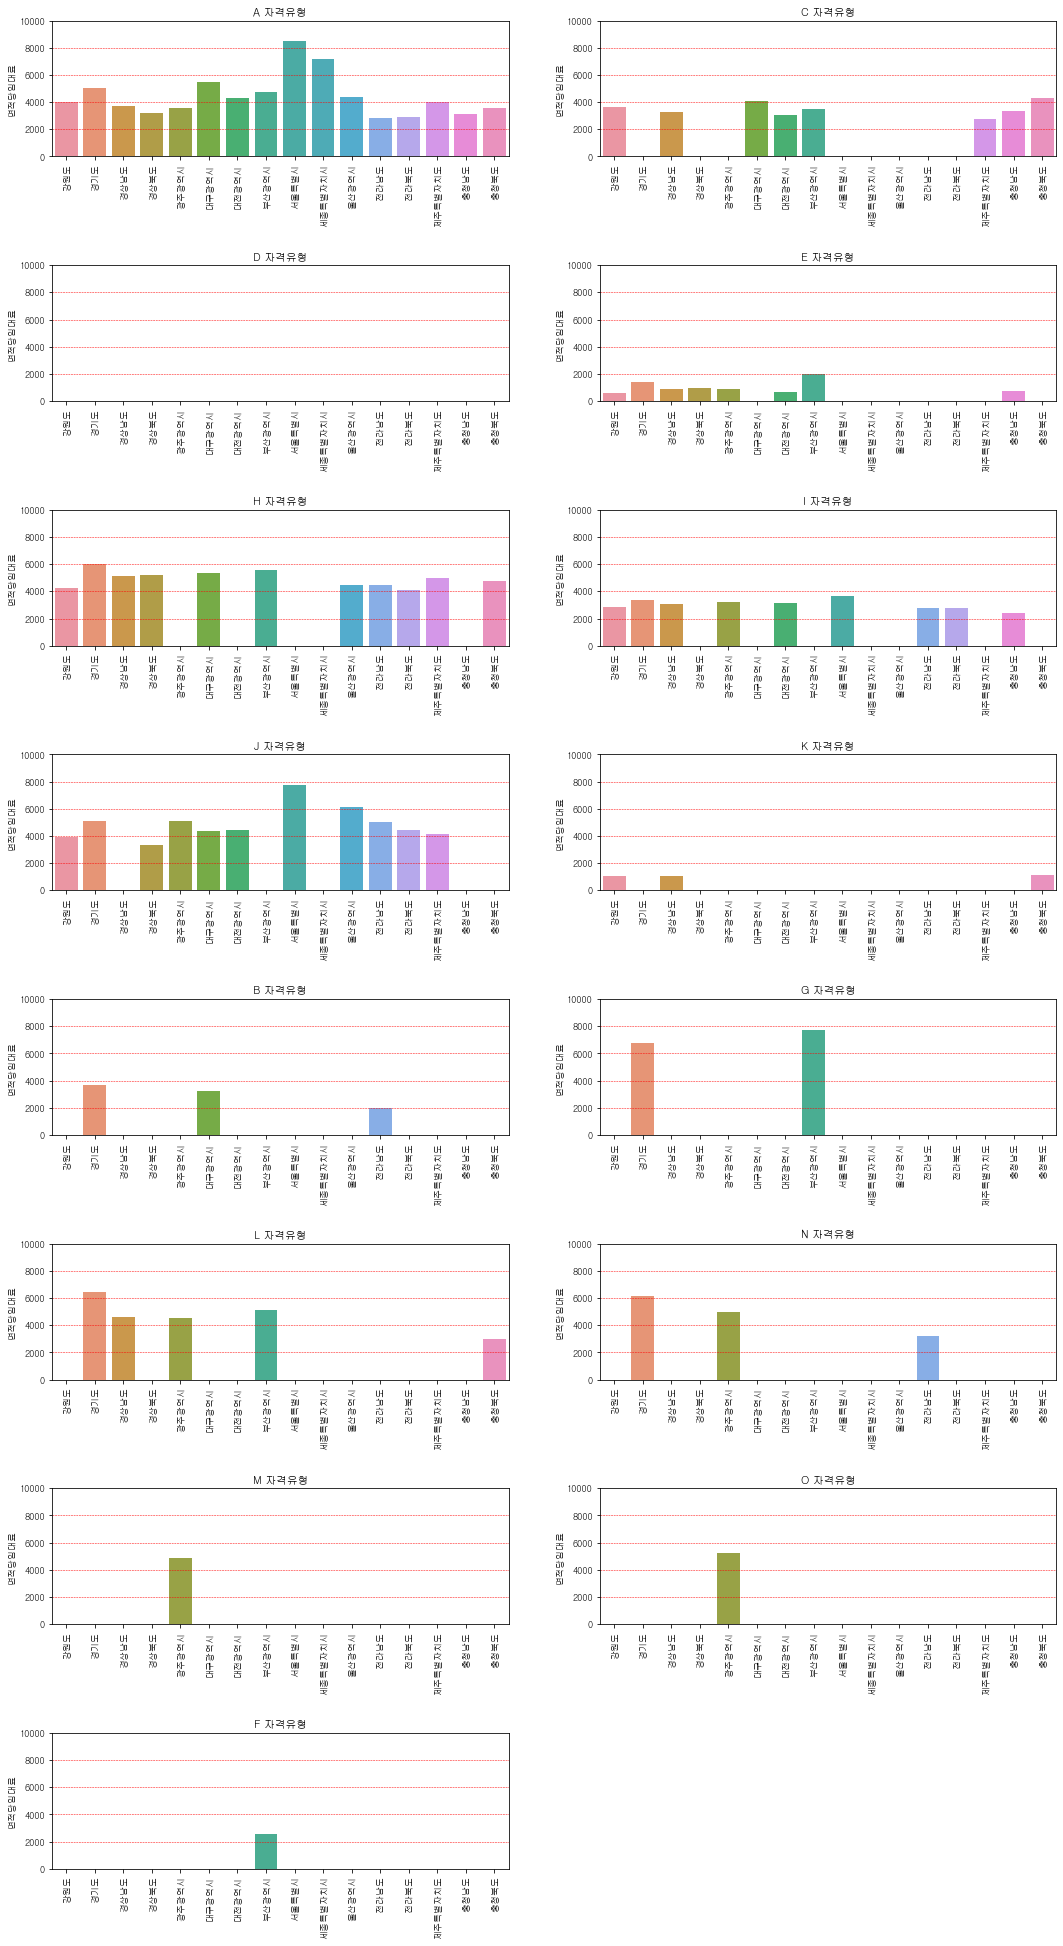

In [235]:
# 지역별로 임대료를 자격유형을 기준, 상대적으로 살펴보기 위함입니다.

fig = plt.figure(figsize=(18, 70))
for i, n in enumerate(list(mean_rent['자격유형'].unique())):
    plt.subplot(16, 2, i+1)
    plt.subplots_adjust(hspace=0.8)
    plots = sns.barplot(data=mean_rent.loc[mean_rent['자격유형'] == n].sort_values('지역'),
                        x='지역', y='면적당임대료')
    plt.ylim(top = 10000)
    plt.axhline(y = 2000, color = 'r', linestyle = '--', linewidth = 0.5)
    plt.axhline(y = 4000, color = 'r', linestyle = '--', linewidth = 0.5)
    plt.axhline(y = 6000, color = 'r', linestyle = '--', linewidth = 0.5)
    plt.axhline(y = 8000, color = 'r', linestyle = '--', linewidth = 0.5)
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.title('{} 자격유형'.format(n))

- E, K 는 도대체 무엇이길래 모든 지역에서 낮게 형성되는가?
- I도 상대적으로 낮다. 왜 그럴까?

- 확실히 보면, 자격유형이 임대료에 상당히 많은 영향을 미치며, 공급유형이 대체로 자격유형과 연관이 있습니다.
- 동일 단지라고 해서 임대료가 비슷하지가 않습니다.
- 차라리 해당 자격유형의 임대료를 평균으로 산정하고, 국민임대일반지수를 곱해주는 것이 더 나을 수도 있을 것 같습니다.

### 단지의 총 환산보증금이 단지의 특성을 대변할 수 있을까?

In [354]:
train['세대수X환산보증금'] = train['전용면적별세대수'] * train['환산보증금']
test['세대수X환산보증금'] = test['전용면적별세대수'] * test['환산보증금']

In [237]:
train_depot = pd.merge(train_danji, train.groupby(['단지코드'])['세대수X환산보증금'].sum().reset_index(),
                       how='inner', on='단지코드')

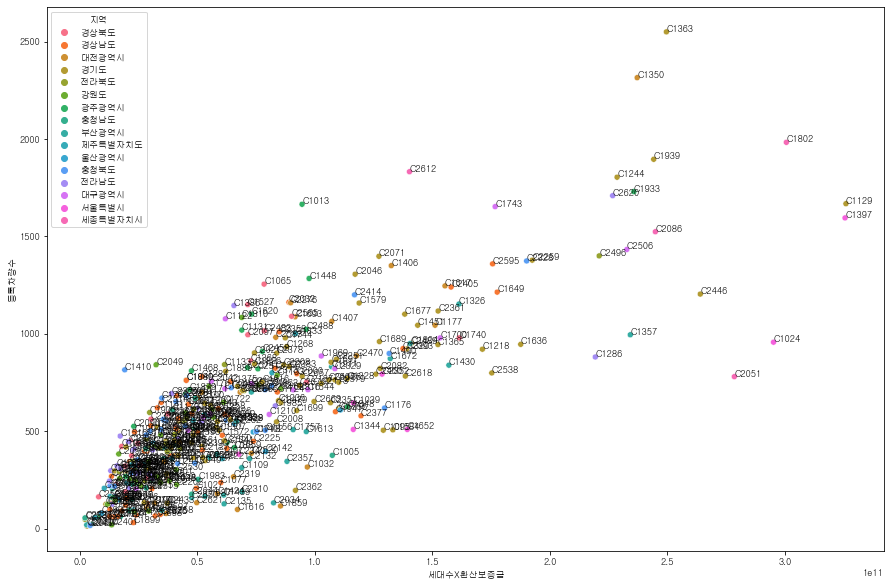

In [238]:
plt.figure(figsize=(15, 10))
plots = sns.scatterplot(data=train_depot, x='세대수X환산보증금', y='등록차량수', hue='지역')
for i, code in enumerate(train_depot['단지코드']):
    plots.annotate(code, (train_depot['세대수X환산보증금'][i], train_depot['등록차량수'][i]))
plt.show()

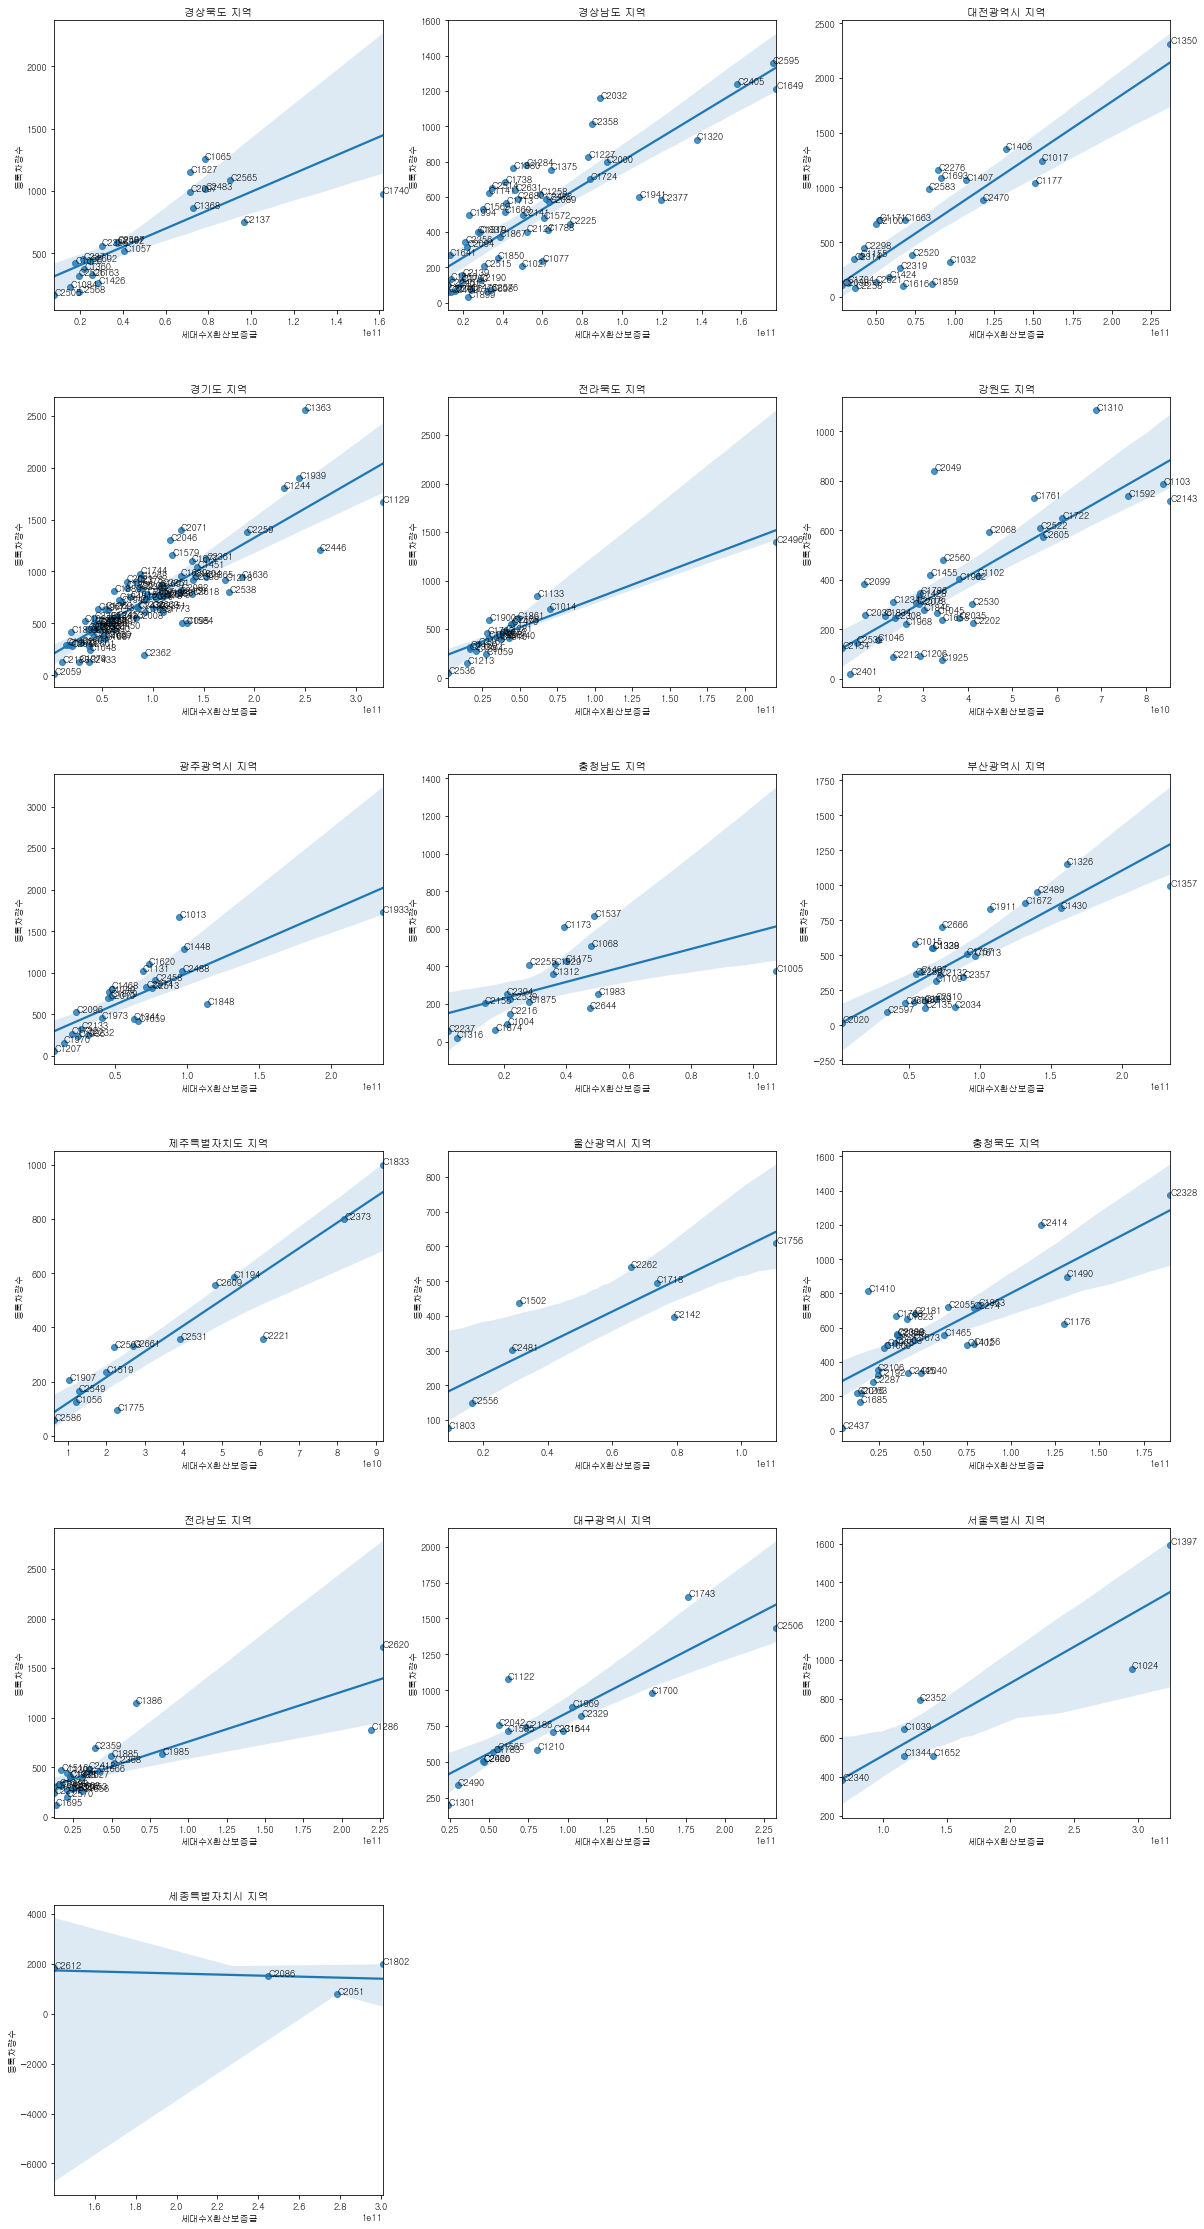

In [239]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(list(train_depot['지역'].unique())):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=train_depot.loc[train_depot['지역'] == n], x='세대수X환산보증금', y='등록차량수')
    for i, code in enumerate(train_depot.loc[train_depot['지역'] == n].reset_index(drop=True)['단지코드']):
        plots.annotate(code, (train_depot.loc[train_depot['지역'] == n].reset_index(drop=True)['세대수X환산보증금'][i],
                              train_depot.loc[train_depot['지역'] == n].reset_index(drop=True)['등록차량수'][i]))
    plt.title('{} 지역'.format(n))

- 확실히 총세대수, 주차면수, 건축연면적보다는 휘귀선이 조금 더 정확한 것을 알 수 있습니다.

### 대중교통은 차량보유에 영향을 미칠까?

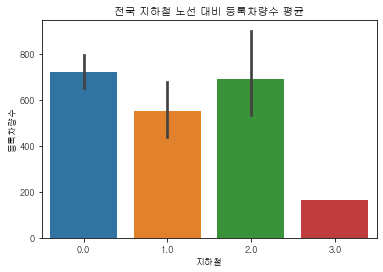

In [240]:
sns.barplot(data=train_danji.loc[train_danji['지역'].isin(['대전광역시', '경기도', '부산광역시', '대구광역시', '서울특별시'])],
            x='지하철', y='등록차량수')
plt.title('전국 지하철 노선 대비 등록차량수 평균')
plt.show()

별다른 정보를 주지 못하고 있다.

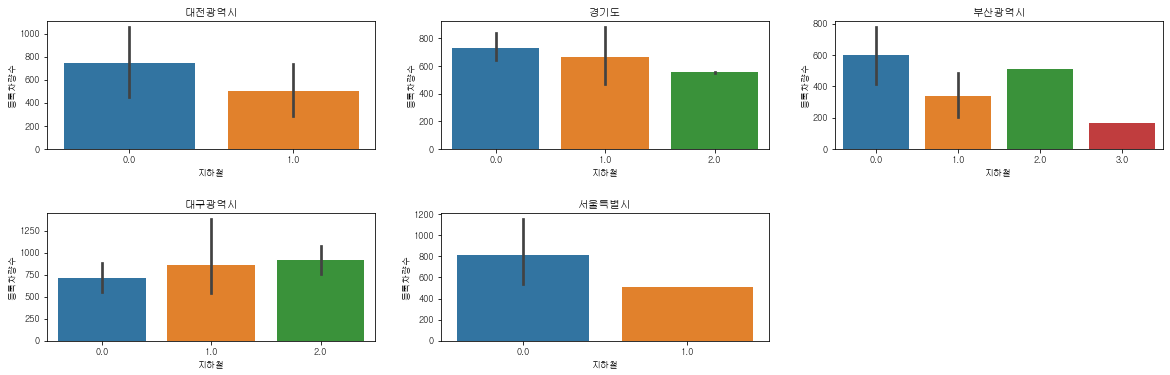

In [241]:
fig = plt.figure(figsize=(20, 20))
for i, n in enumerate(['대전광역시', '경기도', '부산광역시', '대구광역시', '서울특별시']):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(data=train_danji.loc[train_danji['지역'] == n], x='지하철', y='등록차량수')
    plt.title(n)

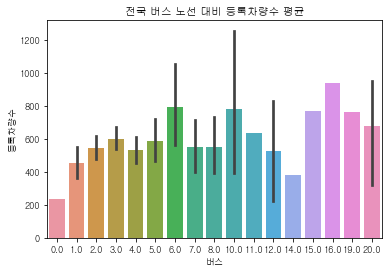

In [242]:
sns.barplot(data=train_danji, x='버스', y='등록차량수')
plt.title('전국 버스 노선 대비 등록차량수 평균')
plt.show()

오히려 버스 정류장이 많을수록 등록차량수가 늘어나는 패턴을 보인다.

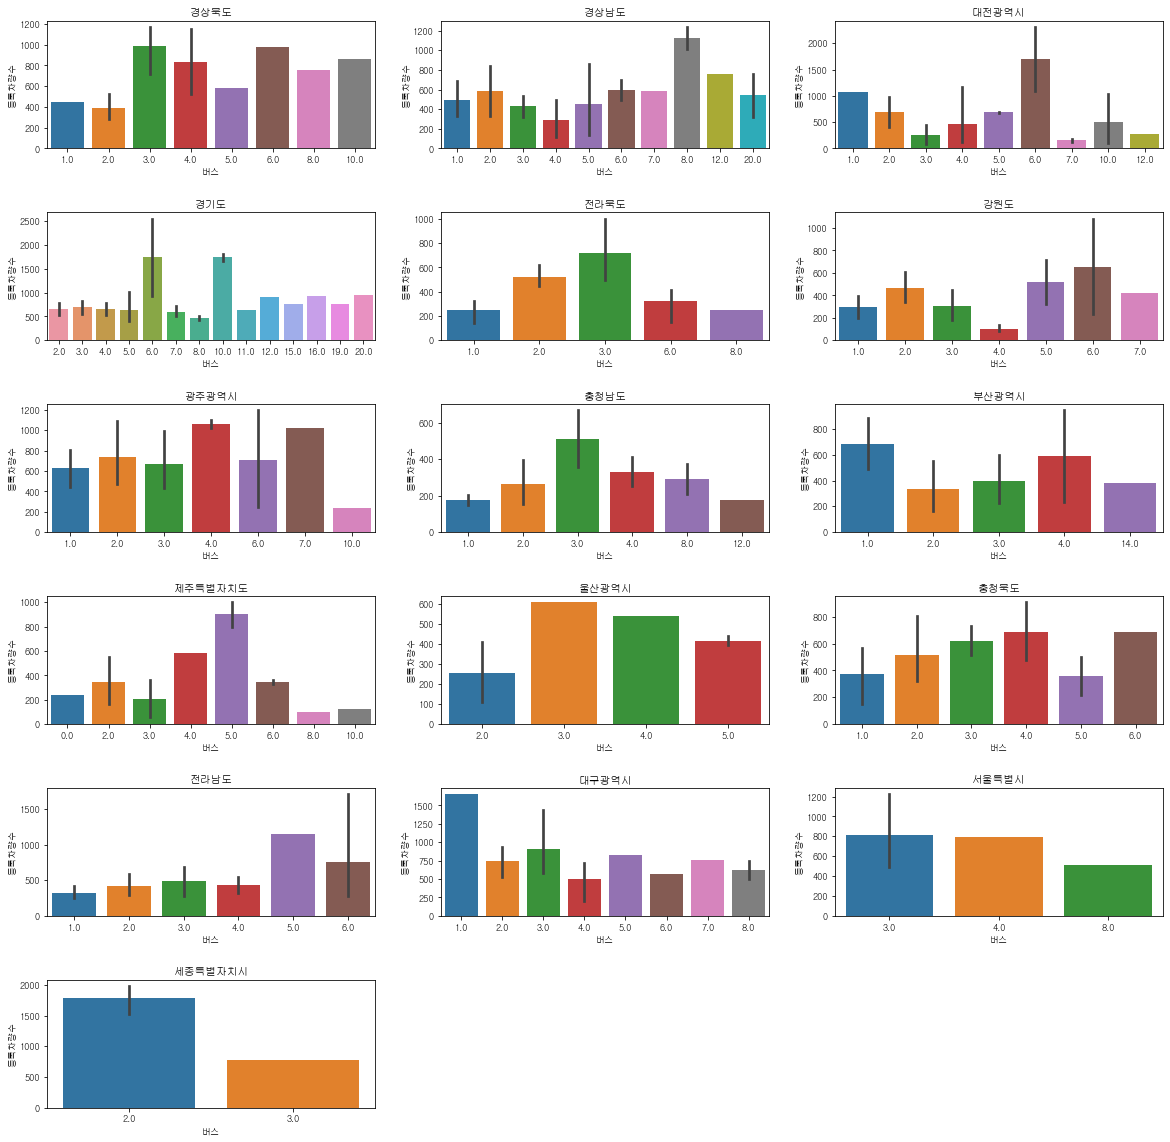

In [243]:
fig = plt.figure(figsize=(20, 20))
for i, n in enumerate(list(train_danji['지역'].unique())):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.barplot(data=train_danji.loc[train_danji['지역'] == n], x='버스', y='등록차량수')
    plt.title(n)

지하철 하나가 버스 3개 수준이라면?

In [244]:
train_danji['대중교통'] = (train_danji['지하철'] * 3) + train_danji['버스']

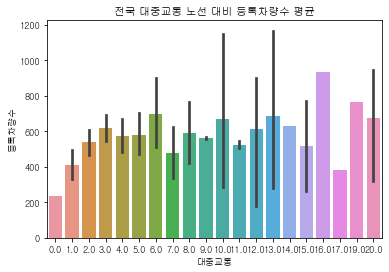

In [245]:
sns.barplot(data=train_danji, x='대중교통', y='등록차량수')
plt.title('전국 대중교통 노선 대비 등록차량수 평균')
plt.show()

# TESTING

### 1. 방의 개수가 차량 보유에 영향을 미치는가?

In [420]:
train.loc[train['전용면적'] < 35, '방개수'] = '1룸'
train.loc[train['전용면적'] >= 35, '방개수'] = '2룸'
train.loc[train['전용면적'] >= 45, '방개수'] = '3룸'
train.loc[train['전용면적'] >= 56, '방개수'] = '4룸'
train.loc[train['전용면적'] >= 77, '방개수'] = '5룸'

In [421]:
test.loc[test['전용면적'] < 35, '방개수'] = '1룸'
test.loc[test['전용면적'] >= 35, '방개수'] = '2룸'
test.loc[test['전용면적'] >= 45, '방개수'] = '3룸'
test.loc[test['전용면적'] >= 56, '방개수'] = '4룸'
test.loc[test['전용면적'] >= 77, '방개수'] = '5룸'

In [248]:
rooms = pd.pivot_table(train.loc[train['임대건물구분'] != '상가'],
                       index='단지코드', columns='방개수', values='전용면적별세대수',
                       aggfunc='sum')

In [249]:
temp = train.groupby(['단지코드'])[['총세대수', '지역', '단지내주차면수', '등록차량수']].max()

In [250]:
rooms_danji = pd.concat([rooms, temp], axis=1)

In [251]:
rooms_danji['1룸비율'] = rooms_danji['1룸'] / rooms_danji['총세대수']
rooms_danji['2룸비율'] = rooms_danji['2룸'] / rooms_danji['총세대수']
rooms_danji['3룸비율'] = rooms_danji['3룸'] / rooms_danji['총세대수']
rooms_danji['4룸비율'] = rooms_danji['4룸'] / rooms_danji['총세대수']
rooms_danji['5룸비율'] = rooms_danji['5룸'] / rooms_danji['총세대수']

rooms_danji['단지내주차면수/총세대수'] = rooms_danji['단지내주차면수'] / rooms_danji['총세대수']
rooms_danji['등록차량수/총세대수'] = rooms_danji['등록차량수'] / rooms_danji['총세대수']
rooms_danji['등록차량수/단지내주차면수'] = rooms_danji['등록차량수'] / rooms_danji['단지내주차면수']

In [252]:
rooms_cols = ['1룸비율', '2룸비율', '3룸비율', '4룸비율', '5룸비율']

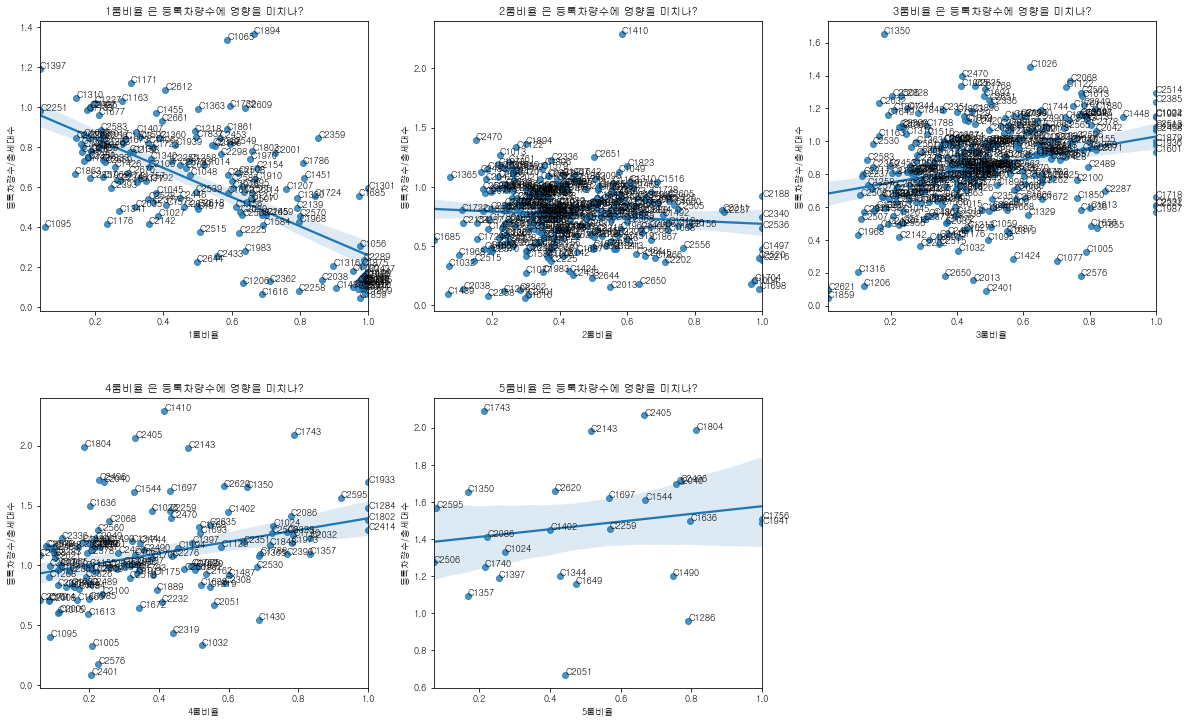

In [253]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(rooms_cols):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=rooms_danji, x=n, y='등록차량수/총세대수')
    for i, code in enumerate(rooms_danji.reset_index(drop=False)['단지코드']):
        plots.annotate(code, (rooms_danji.reset_index(drop=False)[n][i],
                              rooms_danji.reset_index(drop=False)['등록차량수/총세대수'][i]))
    plt.title('{} 은 등록차량수에 영향을 미치나?'.format(n))

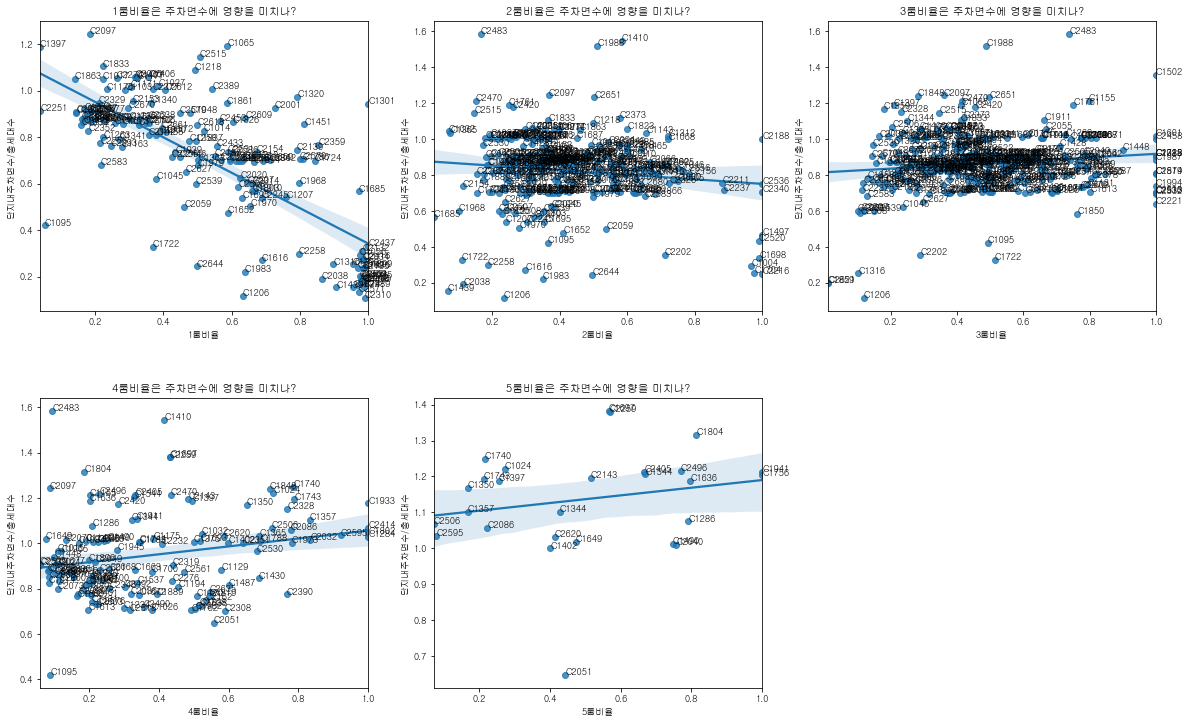

In [254]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(rooms_cols):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=rooms_danji, x=n, y='단지내주차면수/총세대수')
    for i, code in enumerate(rooms_danji.reset_index(drop=False)['단지코드']):
        plots.annotate(code, (rooms_danji.reset_index(drop=False)[n][i],
                              rooms_danji.reset_index(drop=False)['단지내주차면수/총세대수'][i]))
    plt.title('{}은 주차면수에 영향을 미치나?'.format(n))

### 2. 크기 분류가 차량 보유에 영향을 미치는가?

In [422]:
# 80 ~ 은 대형
# 40 ~ 80 은 중형
# ~ 40 은 소형

train.loc[train['전용면적'] < 40, '전용면적구분'] = '소형'
train.loc[train['전용면적'] >= 40, '전용면적구분'] = '중형'
train.loc[train['전용면적'] >= 80, '전용면적구분'] = '대형'

test.loc[test['전용면적'] < 40, '전용면적구분'] = '소형'
test.loc[test['전용면적'] >= 40, '전용면적구분'] = '중형'
test.loc[test['전용면적'] >= 80, '전용면적구분'] = '대형'

In [256]:
size = pd.pivot_table(train.loc[train['임대건물구분'] != '상가'],
                       index='단지코드', columns='전용면적구분', values='전용면적별세대수',
                       aggfunc='sum')

In [257]:
temp = train.groupby(['단지코드'])[['총세대수', '지역', '단지내주차면수', '등록차량수']].max()

In [258]:
size_danji = pd.concat([size, temp], axis=1)

In [259]:
size_danji['소형비율'] = size_danji['소형'] / size_danji['총세대수']
size_danji['중형비율'] = size_danji['중형'] / size_danji['총세대수']
size_danji['대형비율'] = size_danji['대형'] / size_danji['총세대수']

size_danji['단지내주차면수/총세대수'] = size_danji['단지내주차면수'] / size_danji['총세대수']
size_danji['등록차량수/총세대수'] = size_danji['등록차량수'] / size_danji['총세대수']
size_danji['등록차량수/단지내주차면수'] = size_danji['등록차량수'] / size_danji['단지내주차면수']

In [260]:
size_cols = ['소형비율', '중형비율', '대형비율']

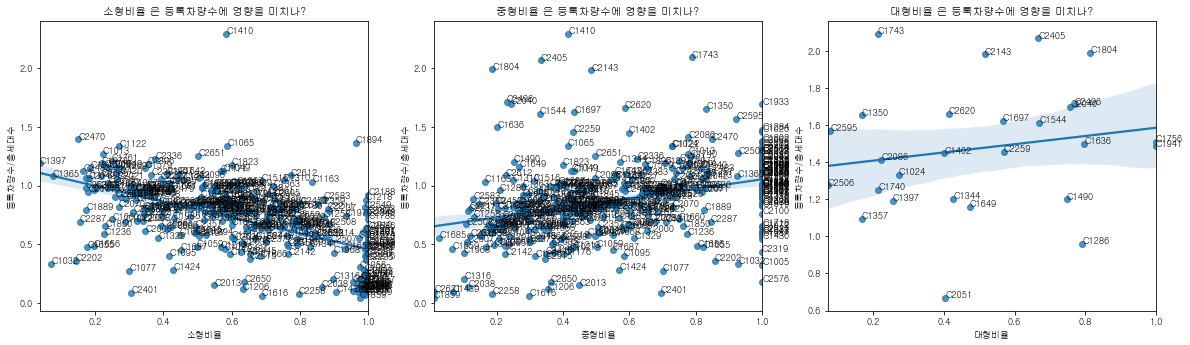

In [261]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(size_cols):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=size_danji, x=n, y='등록차량수/총세대수')
    for i, code in enumerate(size_danji.reset_index(drop=False)['단지코드']):
        plots.annotate(code, (size_danji.reset_index(drop=False)[n][i],
                              size_danji.reset_index(drop=False)['등록차량수/총세대수'][i]))
    plt.title('{} 은 등록차량수에 영향을 미치나?'.format(n))

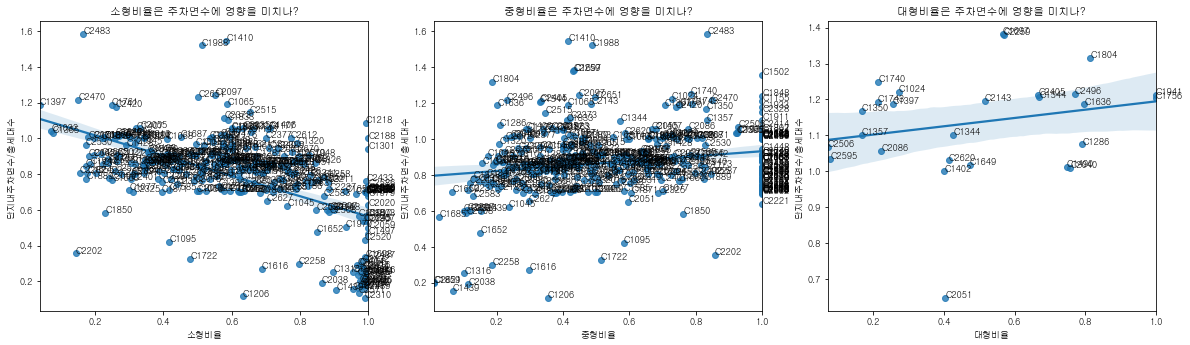

In [262]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(size_cols):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=size_danji, x=n, y='단지내주차면수/총세대수')
    for i, code in enumerate(size_danji.reset_index(drop=False)['단지코드']):
        plots.annotate(code, (size_danji.reset_index(drop=False)[n][i],
                              size_danji.reset_index(drop=False)['단지내주차면수/총세대수'][i]))
    plt.title('{}은 주차면수에 영향을 미치나?'.format(n))

### 3. 땅값이 중요할까?

단지코드별 평균 면적당환산보증금이 그나마 지가에 가깝지 않을까 합니다

In [263]:
train_land = pd.merge(train_danji, train.groupby(['단지코드'])['면적당환산보증금'].mean().reset_index(),
                      how='inner', on='단지코드')

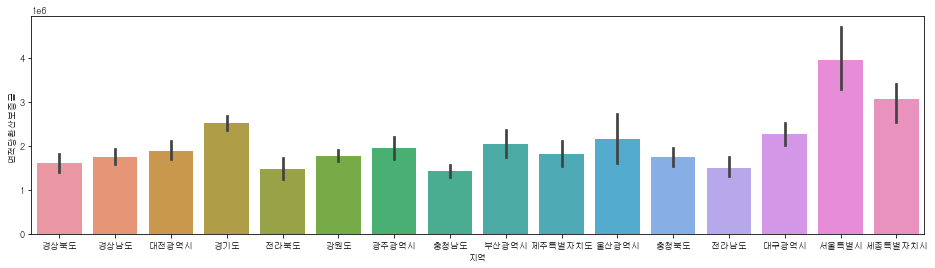

In [264]:
plt.figure(figsize=(16, 4))
sns.barplot(data=train_land, x='지역', y='면적당환산보증금')
plt.show()

In [265]:
train_land['세대당등록차량수'] = train_land['등록차량수'] / train_land['총세대수']

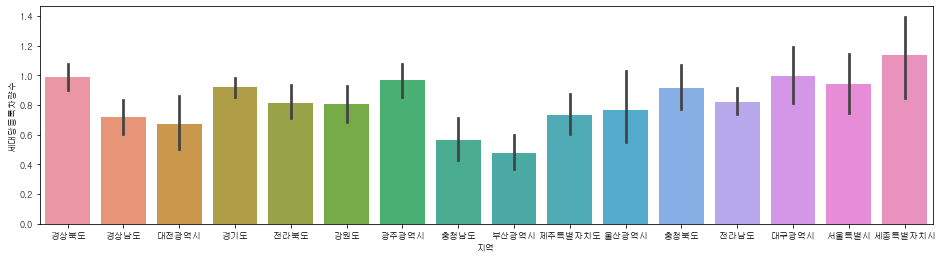

In [266]:
plt.figure(figsize=(16, 4))
sns.barplot(data=train_land, x='지역', y='세대당등록차량수')
plt.show()

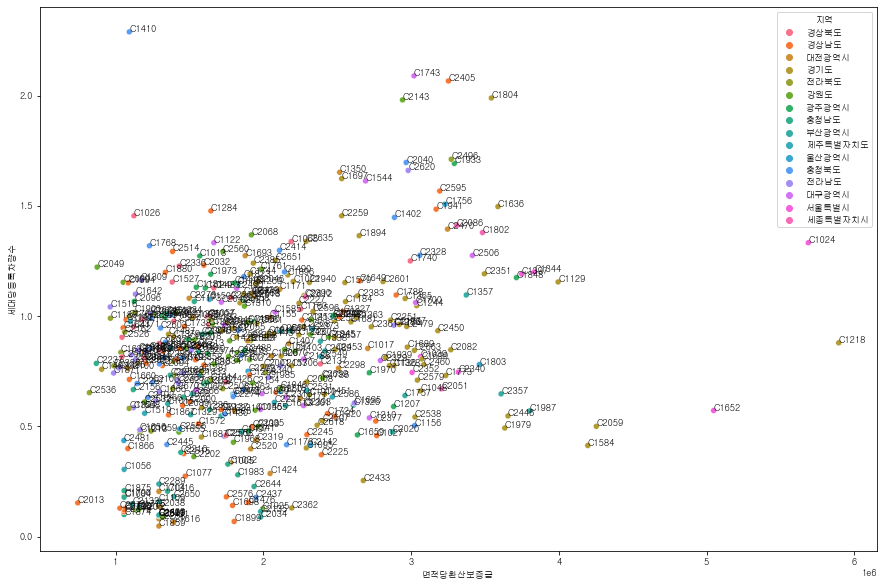

In [267]:
plt.figure(figsize=(15, 10))
plots = sns.scatterplot(data=train_land, x='면적당환산보증금', y='세대당등록차량수', hue='지역')
for i, code in enumerate(train_land['단지코드']):
    plots.annotate(code, (train_land['면적당환산보증금'][i], train_land['세대당등록차량수'][i]))
#plt.xlim(right=4000)
plt.show()

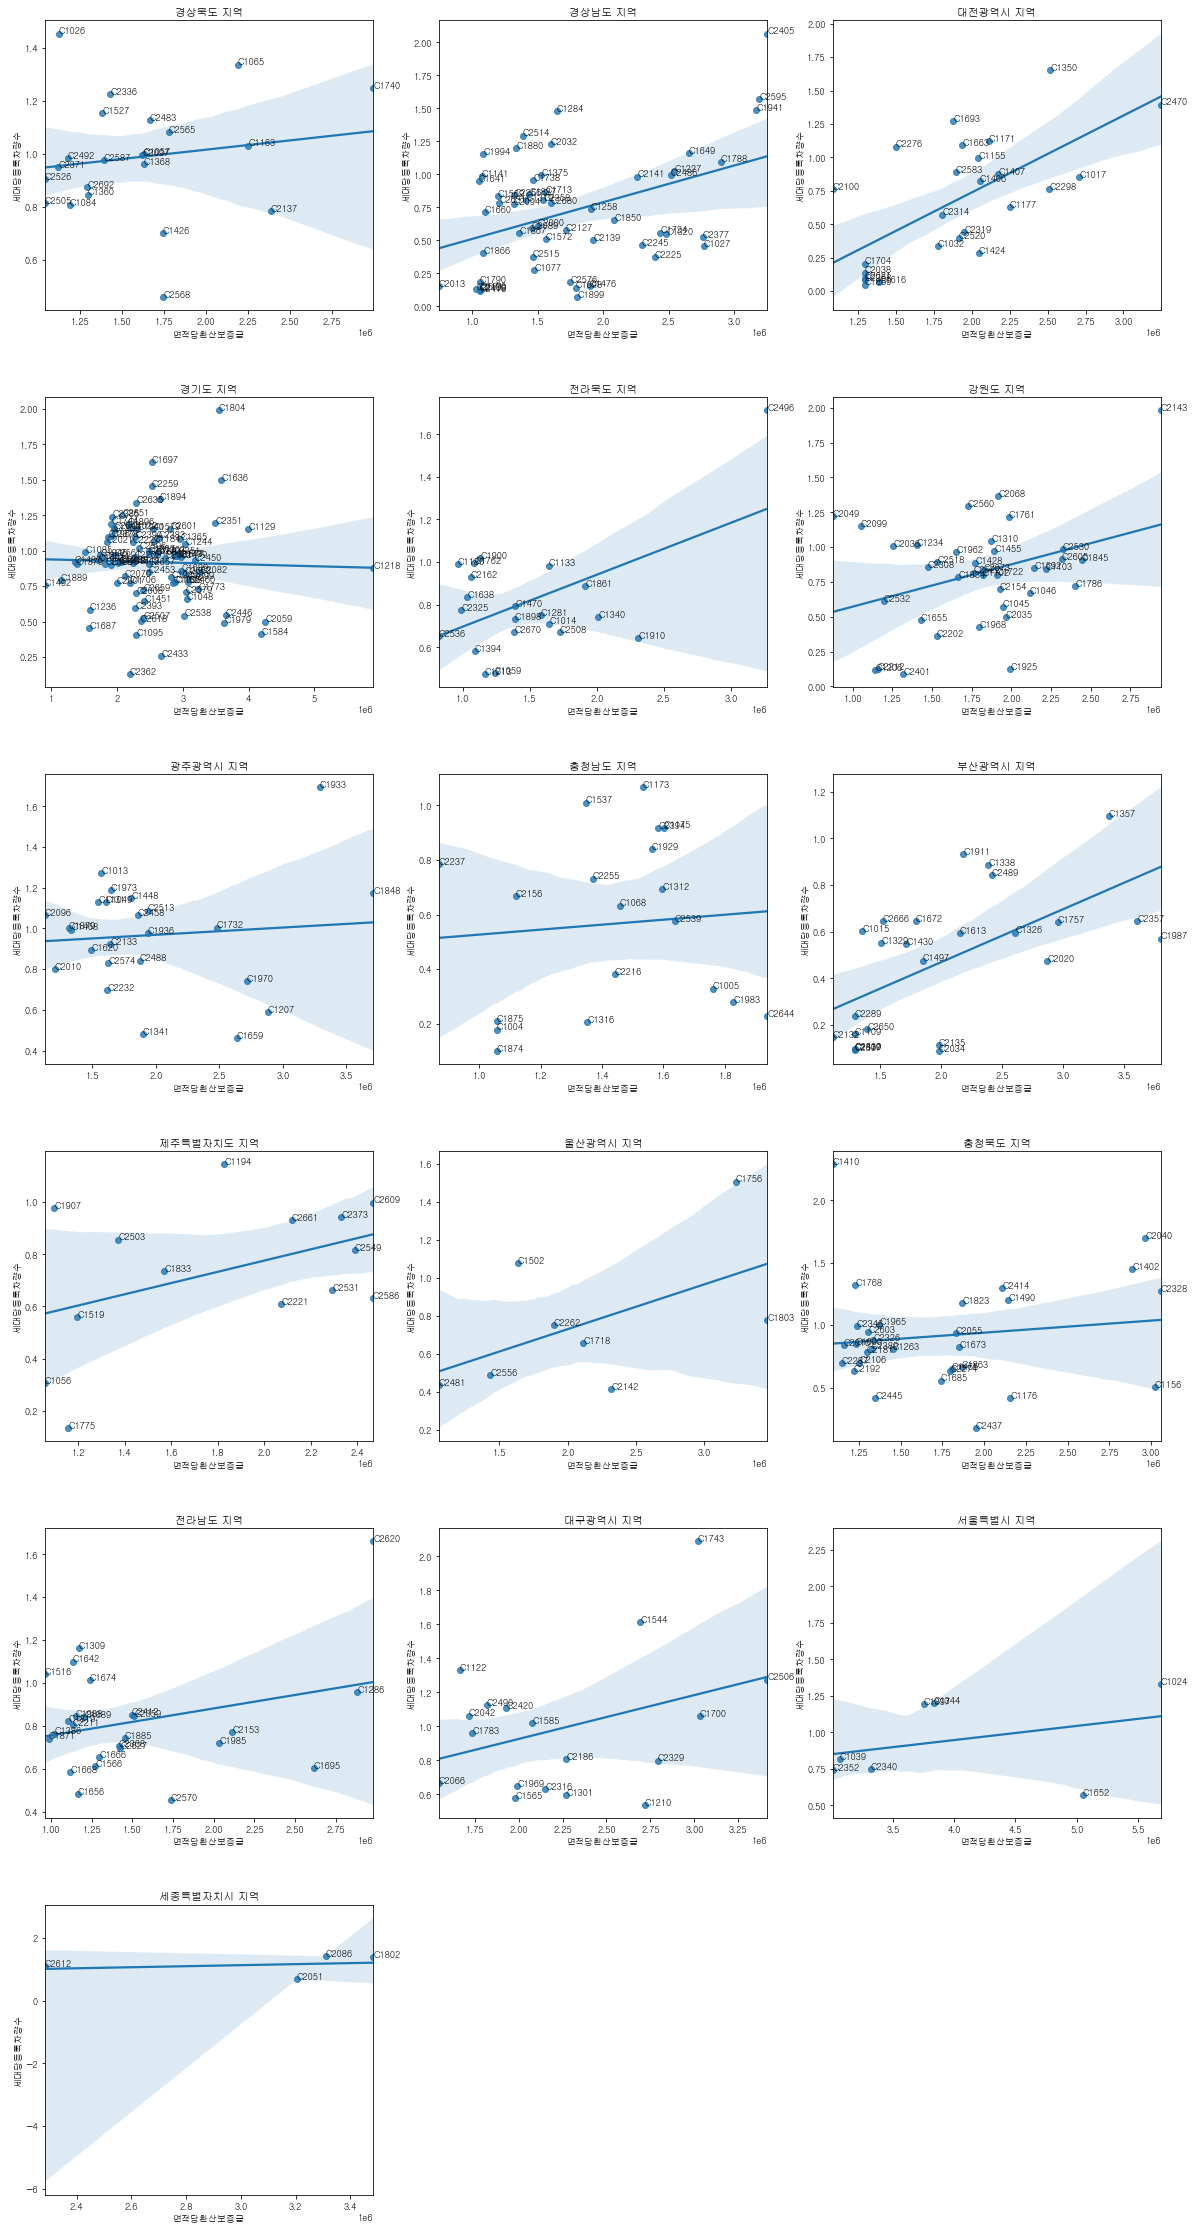

In [268]:
fig = plt.figure(figsize=(20, 40))
for i, n in enumerate(list(train_land['지역'].unique())):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace=0.3)
    plots = sns.regplot(data=train_land.loc[train_land['지역'] == n], x='면적당환산보증금', y='세대당등록차량수')
    for i, code in enumerate(train_land.loc[train_land['지역'] == n].reset_index(drop=True)['단지코드']):
        plots.annotate(code, (train_land.loc[train_land['지역'] == n].reset_index(drop=True)['면적당환산보증금'][i],
                              train_land.loc[train_land['지역'] == n].reset_index(drop=True)['세대당등록차량수'][i]))
    plt.title('{} 지역'.format(n))

### 4. hypothesis

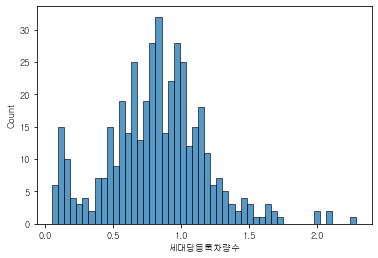

In [269]:
sns.histplot(data=train_land, x='세대당등록차량수', bins=50)
plt.show()

In [270]:
train.head()

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형       임대보증금  \
0  C2483   900    아파트  경상북도  국민임대  39.72       134  38.0    A  15667000.0   
1  C2483   900    아파트  경상북도  국민임대  39.72        15  38.0    A  15667000.0   
2  C2483   900    아파트  경상북도  국민임대  51.93       385  38.0    A  27304000.0   
3  C2483   900    아파트  경상북도  국민임대  51.93        15  38.0    A  27304000.0   
4  C2483   900    아파트  경상북도  국민임대  51.93        41  38.0    A  27304000.0   

        임대료  지하철   버스  단지내주차면수   등록차량수         면적당보증금       면적당임대료  \
0  103680.0  0.0  3.0   1425.0  1015.0  394436.052367  2610.271903   
1  103680.0  0.0  3.0   1425.0  1015.0  394436.052367  2610.271903   
2  184330.0  0.0  3.0   1425.0  1015.0  525784.710187  3549.585981   
3  184330.0  0.0  3.0   1425.0  1015.0  525784.710187  3549.585981   
4  184330.0  0.0  3.0   1425.0  1015.0  525784.710187  3549.585981   

        환산보증금      면적당환산보증금     건축연면적     세대수X환산보증금 방개수 전용면적구분  
0  52369720.0  1.318472e+06   5322.48  7.017542e+09  2룸     소형  
1  52369720.0  1.318472e+06    595.80  7.855458e+08  2룸     소형  
2  92556820.0  1.782338e+06  19993.05  3.563438e+10  3룸     중형  
3  92556820.0  1.782338e+06    778.95  1.388352e+09  3룸     중형  
4  92556820.0  1.782338e+06   2129.13  3.794830e+09  3룸     중형

### 4. 지역별 세대, 성별 분포는 어떤 영향을 미칠까?

In [429]:
ag = age_gender.set_index('지역')

In [430]:
# 성인(20대~60대)비중합
ag.loc[:, '청년비중'] = ag.loc[:, (ag.columns.str.contains('20대')) | (ag.columns.str.contains('30대')) | (ag.columns.str.contains('40대')) | (ag.columns.str.contains('50대')) | (ag.columns.str.contains('60대'))].sum(axis=1)
# 미성년자(10대이하)비중
ag.loc[:, '미성년자비중'] = ag.loc[:, (ag.columns.str.contains('10대'))].sum(axis=1)
# 노인비중(70대~)비중합
ag.loc[:, '노년비중'] = ag.loc[:, (ag.columns.str.contains('70대')) | (ag.columns.str.contains('80대')) | (ag.columns.str.contains('90대')) | (ag.columns.str.contains('100대'))].sum(axis=1)
# 성인여성비중
ag.loc[:, '청년여성비중'] = ag.loc[:, ['20대(여자)', '30대(여자)', '40대(여자)', '50대(여자)', '60대(여자)']].sum(axis=1)
# 성인남성비중
ag.loc[:, '청년남성비중'] = ag.loc[:, ['20대(남자)', '30대(남자)', '40대(남자)', '50대(남자)', '60대(남자)']].sum(axis=1)

# Modeling

In [431]:
train.head()

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수   공가수 자격유형       임대보증금  \
0  C2483   900    아파트  경상북도  국민임대  39.72       134  38.0    A  15667000.0   
1  C2483   900    아파트  경상북도  국민임대  39.72        15  38.0    A  15667000.0   
2  C2483   900    아파트  경상북도  국민임대  51.93       385  38.0    A  27304000.0   
3  C2483   900    아파트  경상북도  국민임대  51.93        15  38.0    A  27304000.0   
4  C2483   900    아파트  경상북도  국민임대  51.93        41  38.0    A  27304000.0   

        임대료  지하철   버스  단지내주차면수   등록차량수         면적당보증금       면적당임대료  \
0  103680.0  0.0  3.0   1425.0  1015.0  394436.052367  2610.271903   
1  103680.0  0.0  3.0   1425.0  1015.0  394436.052367  2610.271903   
2  184330.0  0.0  3.0   1425.0  1015.0  525784.710187  3549.585981   
3  184330.0  0.0  3.0   1425.0  1015.0  525784.710187  3549.585981   
4  184330.0  0.0  3.0   1425.0  1015.0  525784.710187  3549.585981   

        환산보증금      면적당환산보증금     건축연면적     세대수X환산보증금 방개수 전용면적구분  
0  52369720.0  1.318472e+06   5322.48  7.017542e+09  2룸     소형  
1  52369720.0  1.318472e+06    595.80  7.855458e+08  2룸     소형  
2  92556820.0  1.782338e+06  19993.05  3.563438e+10  3룸     중형  
3  92556820.0  1.782338e+06    778.95  1.388352e+09  3룸     중형  
4  92556820.0  1.782338e+06   2129.13  3.794830e+09  3룸     중형

In [432]:
# 공급유형 unstack
temp = train.groupby(['단지코드', '공급유형'])['전용면적별세대수'].sum().unstack().fillna(0)
train = pd.merge(train.loc[:, ~train.columns.isin(['공급유형'])], temp, on='단지코드')
temp = test.groupby(['단지코드', '공급유형'])['전용면적별세대수'].sum().unstack().fillna(0)
test = pd.merge(test.loc[:, ~test.columns.isin(['공급유형'])], temp, on='단지코드')

In [433]:
# 자격유형 unstack
temp = train.groupby(['단지코드', '자격유형'])['전용면적별세대수'].sum().unstack().fillna(0)
train = pd.merge(train.loc[:, ~train.columns.isin(['자격유형'])], temp, on='단지코드')
temp = test.groupby(['단지코드', '자격유형'])['전용면적별세대수'].sum().unstack().fillna(0)
test = pd.merge(test.loc[:, ~test.columns.isin(['자격유형'])], temp, on='단지코드')

In [434]:
# 면적당환산보증금세대수 합계로 산출
temp = train.groupby(['단지코드'])['세대수X환산보증금'].sum().reset_index()
train = pd.merge(train.loc[:, ~train.columns.isin(['세대수X환산보증금'])], temp, on='단지코드')
temp = test.groupby(['단지코드'])['세대수X환산보증금'].sum().reset_index()
test = pd.merge(test.loc[:, ~test.columns.isin(['세대수X환산보증금'])], temp, on='단지코드')

In [435]:
# 단지평균면적당환산보증금 산출
temp = train.groupby(['단지코드'])['면적당환산보증금'].mean().reset_index()
train = pd.merge(train.loc[:, ~train.columns.isin(['면적당환산보증금'])], temp, on='단지코드')
temp = test.groupby(['단지코드'])['면적당환산보증금'].mean().reset_index()
test = pd.merge(test.loc[:, ~test.columns.isin(['면적당환산보증금'])], temp, on='단지코드')

In [436]:
# 방개수 unstack
temp = train.groupby(['단지코드', '방개수'])['전용면적별세대수'].sum().unstack().fillna(0)
train = pd.merge(train.loc[:, ~train.columns.isin(['방개수'])], temp, on='단지코드')
temp = test.groupby(['단지코드', '방개수'])['전용면적별세대수'].sum().unstack().fillna(0)
test = pd.merge(test.loc[:, ~test.columns.isin(['방개수'])], temp, on='단지코드')

In [437]:
# 전용면적구분 unstack
temp = train.groupby(['단지코드', '전용면적구분'])['전용면적별세대수'].sum().unstack().fillna(0)
train = pd.merge(train.loc[:, ~train.columns.isin(['전용면적구분'])], temp, on='단지코드')
temp = test.groupby(['단지코드', '전용면적구분'])['전용면적별세대수'].sum().unstack().fillna(0)
test = pd.merge(test.loc[:, ~test.columns.isin(['전용면적구분'])], temp, on='단지코드')

In [438]:
# 건축연면적 합계로 산출
temp = train.groupby(['단지코드'])['건축연면적'].sum().reset_index()
train = pd.merge(train.loc[:, ~train.columns.isin(['건축연면적'])], temp, on='단지코드')
temp = test.groupby(['단지코드'])['건축연면적'].sum().reset_index()
test = pd.merge(test.loc[:, ~test.columns.isin(['건축연면적'])], temp, on='단지코드')

In [439]:
# 실거주세대 대비 차량수의 지역 평균으로 오름차순 정렬
# Order를 주었습니다.
region_dict = {'서울특별시': 0,
               '경기도':1,
               '세종특별자치시':2,
               '경상북도':3,
               '대구광역시':4,
               '광주광역시':5,
               '충청북도':6,
               '전라남도':7,
               '전라북도':8,
               '강원도':9,
               '경상남도':10,
               '울산광역시':11,
               '제주특별자치도':12,
               '대전광역시':13,
               '충청남도':14,
               '부산광역시':15}

train['지역'] = train['지역'].map(region_dict)
test['지역'] = test['지역'].map(region_dict)

In [440]:
# 전처리가 끝나서 필요없는 변수 삭제
train.drop(['임대건물구분', '전용면적', '전용면적별세대수', '임대보증금',
            '임대료', '환산보증금', '면적당보증금', '면적당임대료'], axis=1, inplace=True)
test.drop(['임대건물구분', '전용면적', '전용면적별세대수', '임대보증금',
           '임대료', '환산보증금', '면적당보증금', '면적당임대료'], axis=1, inplace=True)

In [441]:
# 단지고유의 레코드만 남겨줍니다.
train = train.drop_duplicates().reset_index(drop=True)
test = test.drop_duplicates().reset_index(drop=True)

In [442]:
train.shape, test.shape

((420, 44), (147, 37))

In [443]:
set(train.columns).difference(test.columns)

{'B', 'F', 'O', '공공분양', '공공임대(5년)', '등록차량수', '장기전세'}

In [444]:
train.drop(['B', 'F', 'O', '공공분양','공공임대(5년)', '장기전세'], axis=1, inplace=True)

In [445]:
# test['B'] = 0
# test['F'] = 0
# test['O'] = 0
# test['공공분양'] = 0
# test['공공임대(5년)'] = 0
# test['장기전세'] = 0

In [446]:
train.shape, test.shape

((420, 38), (147, 37))

In [447]:
ag = ag.reset_index()
ag['지역'] = ag['지역'].map(region_dict)

In [448]:
train = pd.merge(train, ag, how='left', on='지역')
test = pd.merge(test, ag, how='left', on='지역')

In [449]:
train.shape, test.shape

((420, 65), (147, 64))

In [450]:
x_train = train.loc[:, ~train.columns.isin(['단지코드', '등록차량수'])]
y_train = train['등록차량수']
x_test = test.loc[:, ~test.columns.isin(['단지코드'])]
x_code = test['단지코드']

In [451]:
x_train.shape, y_train.shape, x_test.shape, x_code.shape

((420, 63), (420,), (147, 63), (147,))

In [452]:
rf = RandomForestRegressor(random_state=42, oob_score=True, criterion='mse', n_estimators=200)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [453]:
rf.oob_score_

0.7790085122241279

In [376]:
rf.oob_score_

0.7791594798378964

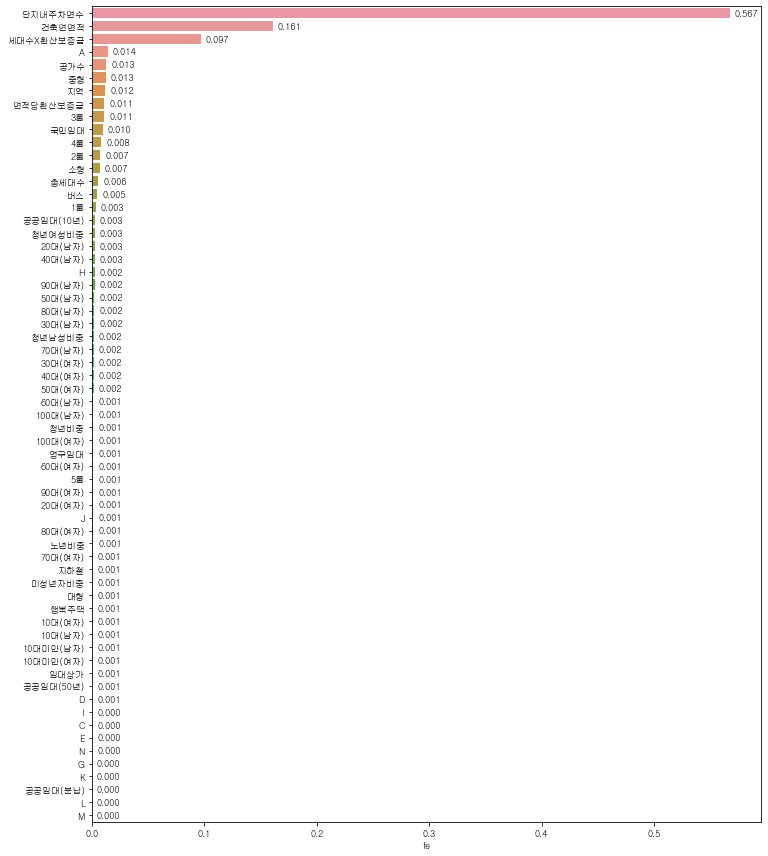

In [455]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams["font.size"] = "9"

fe_avg = pd.DataFrame(rf.feature_importances_,
                      index=x_train.columns, columns=['fe']).sort_values(by=['fe'], ascending=False)

plt.figure(figsize=(12, 15))
plots = sns.barplot(fe_avg.fe, y=fe_avg.index)

# Annotate every single Bar with its value, based on it's width           
for bar in plots.patches:
    width = bar.get_width()
    plt.text(0.015+ bar.get_width(),
             bar.get_y() + 0.5 * bar.get_height(),
             '{:.3f}'.format(width),
             ha='center', va='center')

plt.show()

In [456]:
sub = pd.merge(sub, pd.DataFrame(pred, index=x_code, columns=['pred']).reset_index(),
               how='left', left_on='code', right_on='단지코드').fillna(0)[['code', 'pred']]

In [457]:
sub.rename({'pred':'num'}, axis=1, inplace=True)

In [458]:
sub.head()

code       num
0  C1072   800.585
1  C1128  1244.345
2  C1456   487.415
3  C1840   518.795
4  C1332  1236.250

In [459]:
sub.to_csv('submission/parking_210713_allnew_remainAllError+ag.csv', index=False)

## FEATURE SELECTION

In [467]:
# RFE는 Recursive Feature Elimination이라고 하여, 반복하여 변수를 제거해나가는 방식입니다.
from sklearn.feature_selection import RFE

In [471]:
model = RandomForestRegressor(random_state=42)
rfe = RFE(model,
          5) # feature의 개수를 지정할 수 있습니다. 3개로 해봅니다.
rfe_fit = rfe.fit(x_train, y_train)

In [472]:
print("Num Features: %s" % (rfe_fit.n_features_))
print("Selected Features: %s" % (rfe_fit.support_))
print("Feature Ranking: %s" % (rfe_fit.ranking_))

Num Features: 5
Selected Features: [False  True False False False  True False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
Feature Ranking: [10  1  3 40 13  1 20 48 58  9 27 44 38  2 51 52 53 54 43 50 49 57 55 59
 56  1  6 15 11  5  8 29 47  4  1  1 30 45 35 46 33 12 24 25 28 14 19 36
 31 41 37 22 34 16 21 23 32 26 39 42 17  7 18]


In [473]:
# rank를 확인할 수도 있습니다.
rfe_select = pd.DataFrame(rfe_fit.support_.tolist(), index=x_train.columns, columns=['true'])
rfe_select['rank'] = rfe_fit.ranking_.tolist()
rfe_select.sort_values('rank')

true  rank
건축연면적       True     1
중형          True     1
단지내주차면수     True     1
세대수X환산보증금   True     1
지역          True     1
A          False     2
공가수        False     3
소형         False     4
3룸         False     5
면적당환산보증금   False     6
청년여성비중     False     7
4룸         False     8
국민임대       False     9
총세대수       False    10
2룸         False    11
20대(남자)    False    12
버스         False    13
40대(남자)    False    14
1룸         False    15
80대(남자)    False    16
노년비중       False    17
청년남성비중     False    18
50대(여자)    False    19
공공임대(10년)  False    20
90대(여자)    False    21
70대(남자)    False    22
90대(남자)    False    23
30대(여자)    False    24
30대(남자)    False    25
100대(남자)   False    26
영구임대       False    27
40대(여자)    False    28
5룸         False    29
10대미만(여자)  False    30
60대(여자)    False    31
100대(여자)   False    32
20대(여자)    False    33
80대(여자)    False    34
10대(여자)    False    35
50대(남자)    False    36
70대(여자)    False    37
행복주택       False    38
청년비중       False    39
지하철        False    40
60대(남자)    False    41
미성년자비중     False    42
H          False    43
임대상가       False    44
10대미만(남자)  False    45
10대(남자)    False    46
대형         False    47
공공임대(50년)  False    48
J          False    49
I          False    50
C          False    51
D          False    52
E          False    53
G          False    54
L          False    55
N          False    56
K          False    57
공공임대(분납)   False    58
M          False    59

### llar

In [460]:
llar = LassoLars(alpha=0.01)

In [461]:
llar.fit(x_train, y_train)

LassoLars(alpha=0.01)

In [462]:
pred = llar.predict(x_test)

In [463]:
sub = pd.merge(sub, pd.DataFrame(pred, index=x_code, columns=['pred']).reset_index(),
               how='left', left_on='code', right_on='단지코드').fillna(0)[['code', 'pred']]

In [464]:
sub.rename({'pred':'num'}, axis=1, inplace=True)

In [465]:
sub.head()

code          num
0  C1072   745.163474
1  C1128  1222.707537
2  C1456   443.006864
3  C1840   475.121488
4  C1332  1161.901155

In [466]:
sub.to_csv('submission/parking_210713_allnew+ag-withllar.csv', index=False)

## pycaret

In [388]:
params = {'train_size' : 0.8,
          #'categorical_features' : None,
          #'categorical_imputation' : ‘constant’,
          #'ordinal_features' : None,
          #'high_cardinality_features' : None,
          #'high_cardinality_method' : ‘frequency’,
          #'numeric_features' : None,
          #'numeric_imputation' : ‘mean’,
          #'date_features' : None,
          'ignore_features' : ['단지코드'],
          'normalize' : True,
          'normalize_method' : 'minmax',
          #'transformation' : False,
          #'transformation_method' : ‘yeo-johnson’,
          #'handle_unknown_categorical' : True,
          #'unknown_categorical_method' : ‘least_frequent’,
          #'pca' : False,
          #'pca_method' : ‘linear’,
          #'pca_components' : None,
          'ignore_low_variance' : True,
          'combine_rare_levels' : False,
          'rare_level_threshold' : 0.10,
          'bin_numeric_features' : None,
          #'remove_outliers' : False,
          #'outliers_threshold' : 0.05,
          'remove_multicollinearity' : True,
          'multicollinearity_threshold' : 0.9,
          'remove_perfect_collinearity' : True,
          #'create_clusters' : False,
          #'cluster_iter' : 20,
          #'polynomial_features' : False,
          #'polynomial_degree' : 2,
          #'trigonometry_features' : False,
          #'polynomial_threshold' : 0.1,
          #'group_features' : None,
          #'group_names' : None,
          'feature_selection' : True,
          'feature_selection_threshold' : 0.8,
          'feature_interaction' : False,
          'feature_ratio' : False,
          'interaction_threshold' : 0.01,
          #'transform_target' : False,
          #'transform_target_method' : ‘box-cox’,
          'data_split_shuffle' : True,
          'n_jobs' : -1,
          'html' : True,
          'session_id' : 42,
          'log_experiment' : False,
          'experiment_name' : None,
          'log_plots' : False,
          'log_profile' : False,
          'log_data' : False,
          'silent': False,
          'verbose' : True,
          'profile' : False}

In [398]:
exp_clf101 = setup(**params,
                   data = train, target = '등록차량수')

In [400]:
best_model = compare_models(sort = 'mse', exclude=['svm','ridge', 'lar'])

In [391]:
params = {'train_size' : 0.8,
          #'categorical_features' : None,
          #'categorical_imputation' : ‘constant’,
          #'ordinal_features' : None,
          #'high_cardinality_features' : None,
          #'high_cardinality_method' : ‘frequency’,
          #'numeric_features' : None,
          #'numeric_imputation' : ‘mean’,
          #'date_features' : None,
          'ignore_features' : ['단지코드'],
          'normalize' : False,
          #'normalize_method' : 'minmax',
          #'transformation' : False,
          #'transformation_method' : ‘yeo-johnson’,
          #'handle_unknown_categorical' : True,
          #'unknown_categorical_method' : ‘least_frequent’,
          #'pca' : False,
          #'pca_method' : ‘linear’,
          #'pca_components' : None,
          #'ignore_low_variance' : True,
          #'combine_rare_levels' : False,
          #'rare_level_threshold' : 0.10,
          #'bin_numeric_features' : None,
          #'remove_outliers' : False,
          #'outliers_threshold' : 0.05,
          #'remove_multicollinearity' : True,
          #'multicollinearity_threshold' : 0.9,
          #'remove_perfect_collinearity' : True,
          #'create_clusters' : False,
          #'cluster_iter' : 20,
          #'polynomial_features' : False,
          #'polynomial_degree' : 2,
          #'trigonometry_features' : False,
          #'polynomial_threshold' : 0.1,
          #'group_features' : None,
          #'group_names' : None,
          #'feature_selection' : True,
          #'feature_selection_threshold' : 0.8,
          #'feature_interaction' : False,
          #'feature_ratio' : False,
          #'interaction_threshold' : 0.01,
          #'transform_target' : False,
          #'transform_target_method' : ‘box-cox’,
          #'data_split_shuffle' : True,
          'n_jobs' : -1,
          #'html' : True,
          'session_id' : 42,
          #'log_experiment' : False,
          #'experiment_name' : None,
          #'log_plots' : False,
          #'log_profile' : False,
          #'log_data' : False,
          #'silent': False,
          #'verbose' : True,
          #'profile' : False
         }

In [392]:
exp_clf101 = setup(**params,
                   data = train, target = '등록차량수')

In [393]:
best_model = compare_models(sort = 'mse', exclude=['svm','ridge', 'lar'])

In [394]:
params = {'train_size' : 0.8,
          #'categorical_features' : None,
          #'categorical_imputation' : ‘constant’,
          #'ordinal_features' : None,
          #'high_cardinality_features' : None,
          #'high_cardinality_method' : ‘frequency’,
          'numeric_features' : ['G', 'M'],
          #'numeric_imputation' : ‘mean’,
          #'date_features' : None,
          'ignore_features' : ['단지코드'],
          'normalize' : False,
          #'normalize_method' : 'minmax',
          #'transformation' : False,
          #'transformation_method' : ‘yeo-johnson’,
          #'handle_unknown_categorical' : True,
          #'unknown_categorical_method' : ‘least_frequent’,
          #'pca' : False,
          #'pca_method' : ‘linear’,
          #'pca_components' : None,
          #'ignore_low_variance' : True,
          #'combine_rare_levels' : False,
          #'rare_level_threshold' : 0.10,
          #'bin_numeric_features' : None,
          #'remove_outliers' : False,
          #'outliers_threshold' : 0.05,
          #'remove_multicollinearity' : True,
          #'multicollinearity_threshold' : 0.9,
          #'remove_perfect_collinearity' : True,
          #'create_clusters' : False,
          #'cluster_iter' : 20,
          #'polynomial_features' : False,
          #'polynomial_degree' : 2,
          #'trigonometry_features' : False,
          #'polynomial_threshold' : 0.1,
          #'group_features' : None,
          #'group_names' : None,
          'feature_selection' : True,
          'feature_selection_threshold' : 0.8,
          #'feature_interaction' : False,
          #'feature_ratio' : False,
          #'interaction_threshold' : 0.01,
          #'transform_target' : False,
          #'transform_target_method' : ‘box-cox’,
          #'data_split_shuffle' : True,
          'n_jobs' : -1,
          #'html' : True,
          'session_id' : 42,
          #'log_experiment' : False,
          #'experiment_name' : None,
          #'log_plots' : False,
          #'log_profile' : False,
          #'log_data' : False,
          #'silent': False,
          #'verbose' : True,
          #'profile' : False
         }

In [395]:
exp_clf101 = setup(**params, data = train, target = '등록차량수')

In [396]:
best_model = compare_models(sort = 'mse', exclude=['svm','ridge', 'lar'])